In [ ]:
!pip install sweetviz
!pip install numpy==1.26.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 47.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 47.3 MB/s eta 0:00:00


# Análisis Exploratório de Datos con Python/Pandas

_Python_ es un lenguaje de programación de alto nivel que se puede utilizar para realizar varias tareas. En este curso utilizaremos _Python_ y algunas de sus librerías para realizar actividades prácticas relacionadas con la Minería de Datos.

Una distribución de _Python_ gratuita (para uso individual) que es fácil de instalar y mantener es [Anaconda](https://www.anaconda.com/products/individual).

Si no puede instalar _Python_ en su máquina, puede usar una versión en línea como [Google Colab](https://colab.research.google.com)

Hoy usaremos la biblioteca [_Pandas_](https://pandas.pydata.org/), que es una biblioteca de análisis y manipulación de datos de código abierto rápida, potente, flexible y fácil de usar.

In [2]:
import pandas as pd # cargar y manipular datos
import sweetviz as sv # herramienta de análisis exploratória
import seaborn as sns # gráficos
import matplotlib.pyplot as plt # gráficos
import numpy as np # procesamiento matemático
from scipy.stats import norm # normal

Comencemos cargando Pandas y la base de datos. Esta es una base para el pago de facturas en un restaurante y cuenta como atributos la factura total (total_bill), la propina (tip), el sexo del cliente que paga (sex), si la mesa estaba en un área de fumadores (smoker), el día de la semana (day) y la cantidad de personas en la mesa (size).

In [3]:
tips = pd.read_csv("https://raw.githubusercontent.com/schloerke/cranvasOLD/master/files/data/tips.csv",index_col=0)

Podemos ver las primeras líneas del archivo usando la función `.head ()`

In [4]:
tips.head(10)

total_bill   tip     sex smoker  day    time  size
1        16.99  1.01  Female     No  Sun  Dinner     2
2        10.34  1.66    Male     No  Sun  Dinner     3
3        21.01  3.50    Male     No  Sun  Dinner     3
4        23.68  3.31    Male     No  Sun  Dinner     2
5        24.59  3.61  Female     No  Sun  Dinner     4
6        25.29  4.71    Male     No  Sun  Dinner     4
7         8.77  2.00    Male     No  Sun  Dinner     2
8        26.88  3.12    Male     No  Sun  Dinner     4
9        15.04  1.96    Male     No  Sun  Dinner     2
10       14.78  3.23    Male     No  Sun  Dinner     2

Los últimos con la función `.tail ()`

In [5]:
tips.tail(10)

total_bill   tip     sex smoker   day    time  size
235       15.53  3.00    Male    Yes   Sat  Dinner     2
236       10.07  1.25    Male     No   Sat  Dinner     2
237       12.60  1.00    Male    Yes   Sat  Dinner     2
238       32.83  1.17    Male    Yes   Sat  Dinner     2
239       35.83  4.67  Female     No   Sat  Dinner     3
240       29.03  5.92    Male     No   Sat  Dinner     3
241       27.18  2.00  Female    Yes   Sat  Dinner     2
242       22.67  2.00    Male    Yes   Sat  Dinner     2
243       17.82  1.75    Male     No   Sat  Dinner     2
244       18.78  3.00  Female     No  Thur  Dinner     2

Y una muestra aleatoria con la función `.sample ()`

In [6]:
tips.sample(10)

total_bill   tip     sex smoker   day    time  size
232       15.69  3.00    Male    Yes   Sat  Dinner     3
48        32.40  6.00    Male     No   Sun  Dinner     4
206       16.47  3.23  Female    Yes  Thur   Lunch     3
86        34.83  5.17  Female     No  Thur   Lunch     4
18        16.29  3.71    Male     No   Sun  Dinner     3
75        14.73  2.20  Female     No   Sat  Dinner     2
190       23.10  4.00    Male    Yes   Sun  Dinner     3
56        19.49  3.51    Male     No   Sun  Dinner     2
183       45.35  3.50    Male    Yes   Sun  Dinner     3
238       32.83  1.17    Male    Yes   Sat  Dinner     2

O comando `.info()` mostra os atributos, e o tipos de cada atributo

In [7]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
Index: 244 entries, 1 to 244
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 15.2+ KB


El comando `.describe ()` devuelve algunas estadísticas descriptivas para atributos numéricos:

In [8]:
tips.describe()

total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000

Echemos un vistazo a la distribución de la columna `total_bill`. Para facilitar la visualización, usaremos algunas bibliotecas de gráficos, como [`matplotlib`](https://matplotlib.org/) y [` seaborn`](https://seaborn.pydata.org/).

<Axes: xlabel='total_bill', ylabel='Density'>

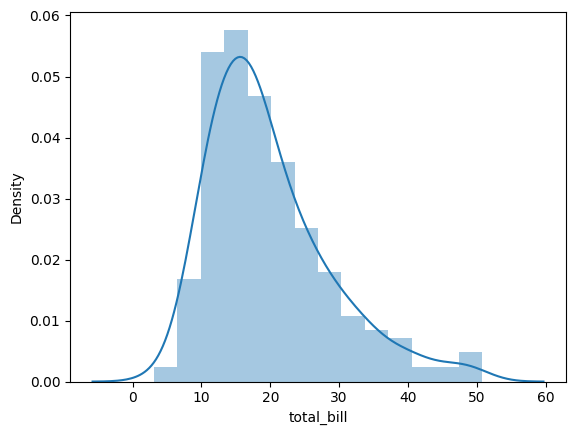

In [9]:
total_bill = tips['total_bill']

sns.distplot(total_bill)

Como se puede ver, la distribución no es uniforme y tiene una cola a la derecha.

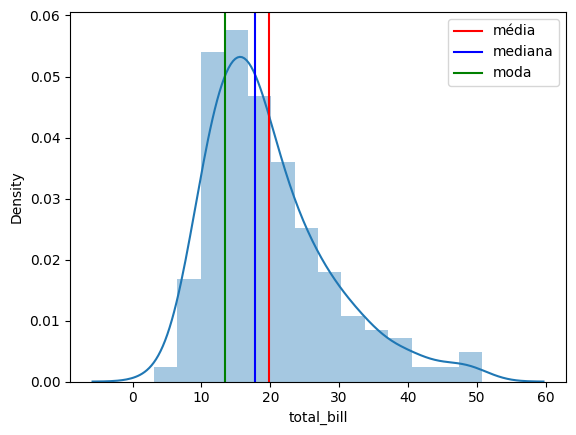

In [10]:
sns.distplot(total_bill)
mean=total_bill.mean()
median=total_bill.median()
mode=total_bill.mode()

plt.axvline(mean,color='r',label='média')
plt.axvline(median,color='b',label='mediana')
plt.axvline(mode[0],color='g',label='moda')
plt.legend()

Comparemos la estimación de densidad no paramétrica (generada por `distplot`) con una distribución paramétrica, asumiendo una distribución normal. Para ello, usaremos la función que calcula la densidad de probabilidad de la clase `norm`, de la biblioteca` scipy`.

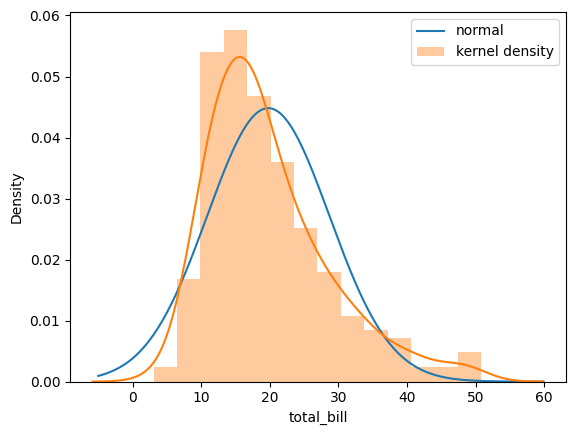

In [11]:
x = np.arange(-5, 60, 0.1) # entire range of x, both in and out of spec

mean = total_bill.mean() # según el principio de máxima verosimilitud, la media muestral es el mejor estimador de la media
stddev = total_bill.std()

y = norm.pdf(x, mean, stddev)

plt.plot(x,y,label='normal')
sns.distplot(total_bill,label='kernel density')
plt.legend()

Otra forma de ver la distribución es crear un `boxplot`.

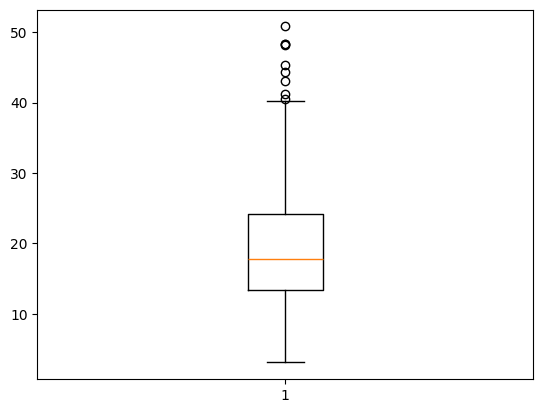

In [12]:
plt.boxplot(total_bill)
plt.show()

El boxplot está asociado con estadísticas descriptivas:

In [13]:
Q1 = total_bill.quantile(q=0.25)
Q2 = total_bill.quantile(q=0.5)
Q3 = total_bill.quantile(q=0.75)
IQR = Q3 - Q1
LI = max(Q1 - 1.5 * IQR, total_bill.min())
LU = min(Q3 + 1.5 * IQR, total_bill.max())

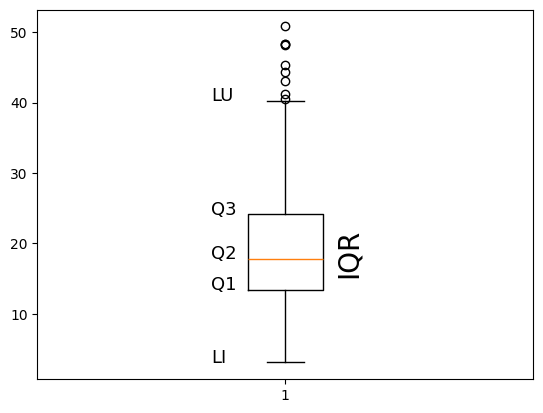

In [14]:
plt.boxplot(total_bill)
plt.text(0.85,Q1,s='Q1',size=13)
plt.text(0.85,Q2,s='Q2',size=13)
plt.text(0.85,Q3,s='Q3',size=13)
plt.text(0.85,LI,s='LI',size=13)
plt.text(0.85,LU,s='LU',size=13)
plt.text(1.1,16,s='IQR',rotation=90,size=20)
plt.show()

## Herramientas para agilizar el proceso

Calcular estadísticas manualmente invocando funciones y creando gráficos puede resultar bastante engorroso. Varias herramientas son capaces de generar informes estandarizados para análisis de datos exploratorios. Uno de ellos es `sweetviz`.

                                             |          | [  0%]   00:00 -> (? left)


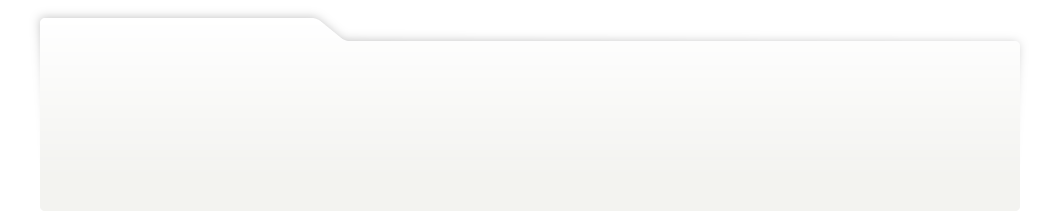
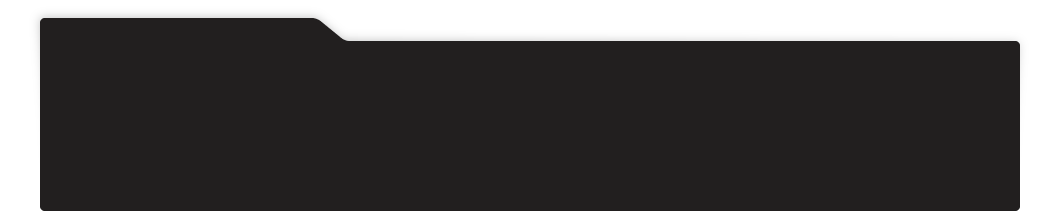
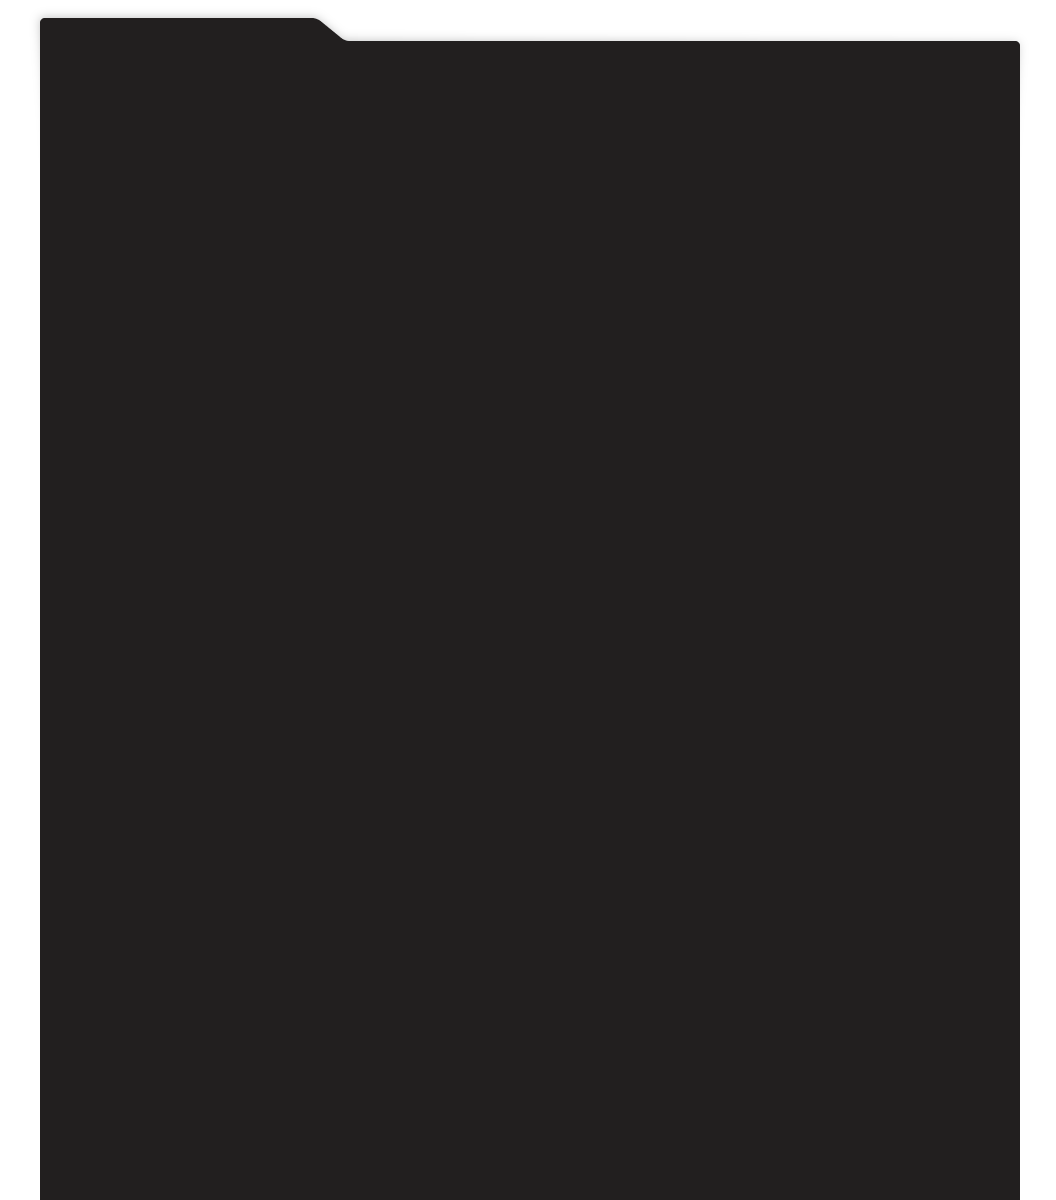
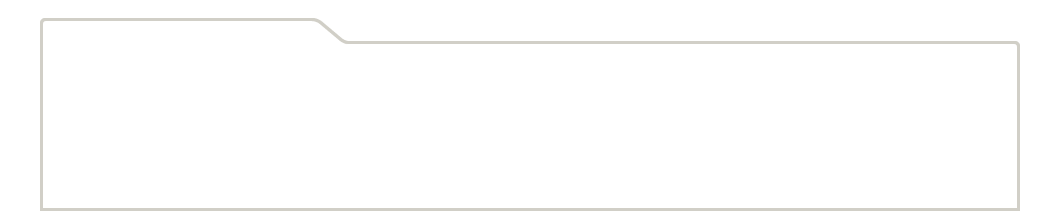
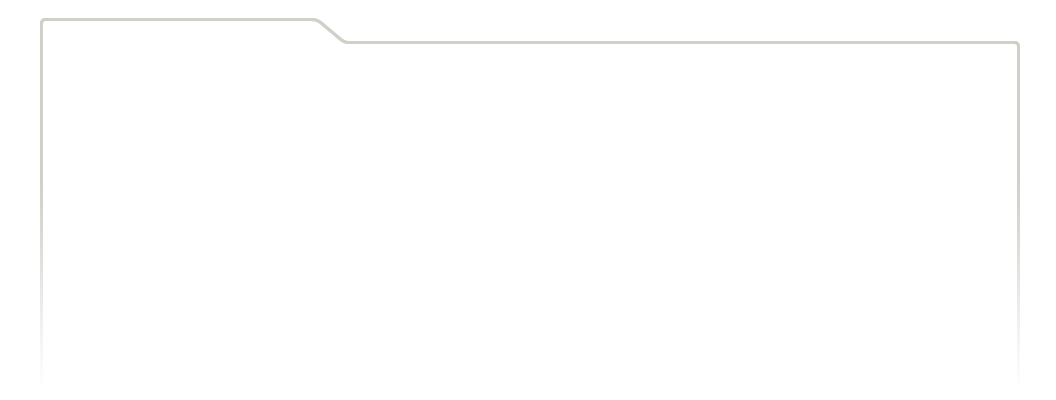
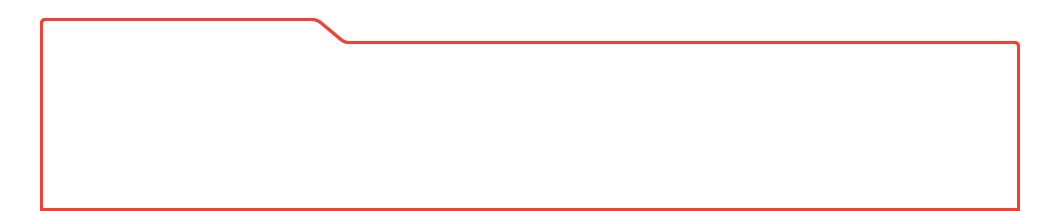
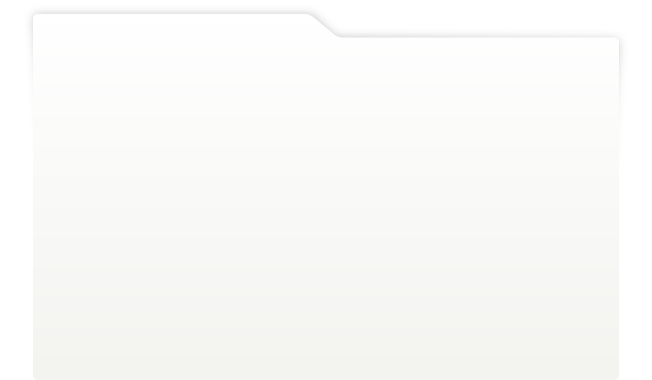
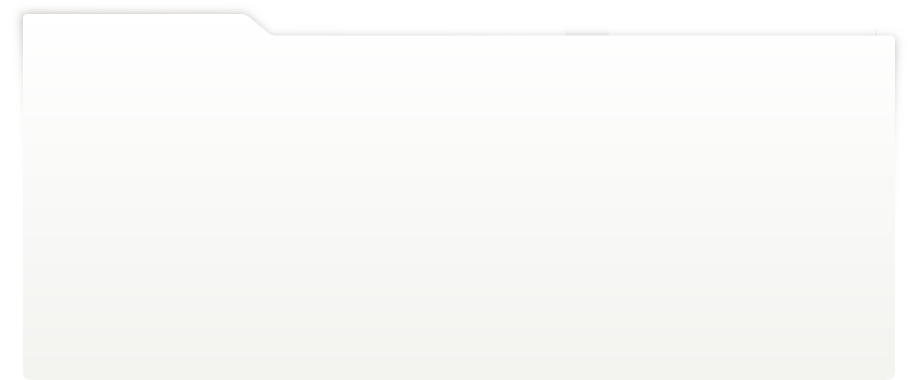
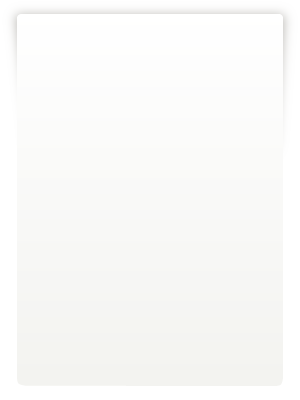
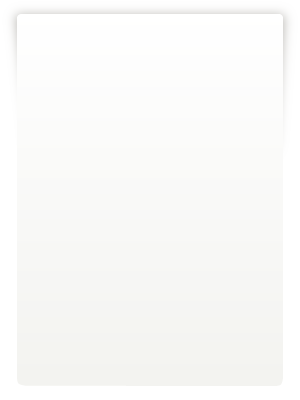
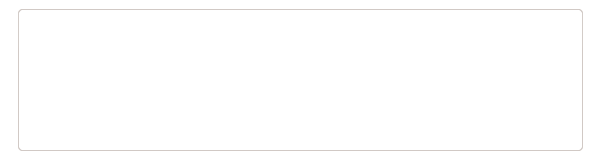
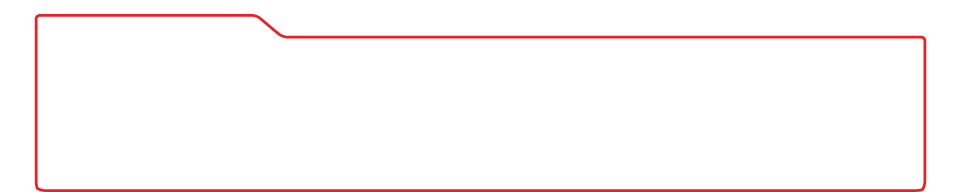
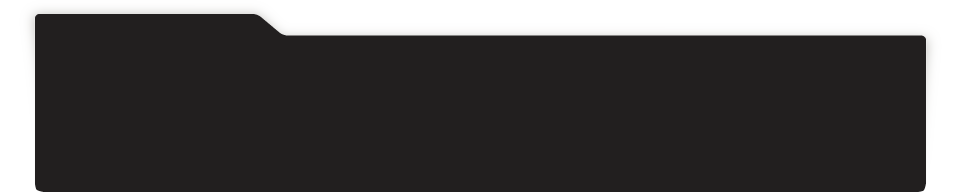
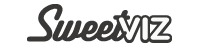
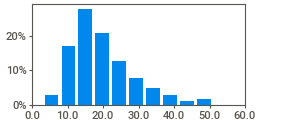
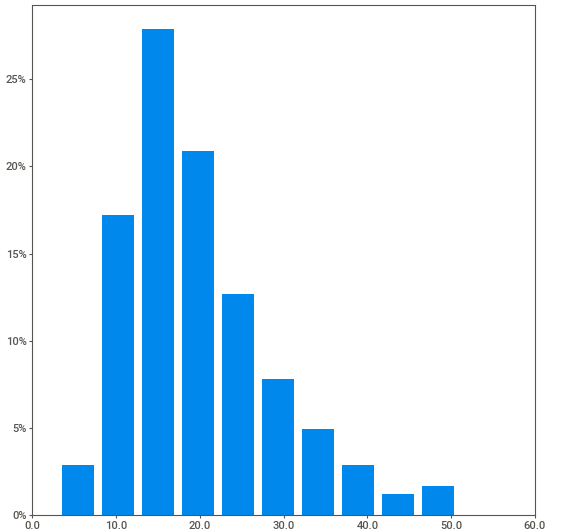
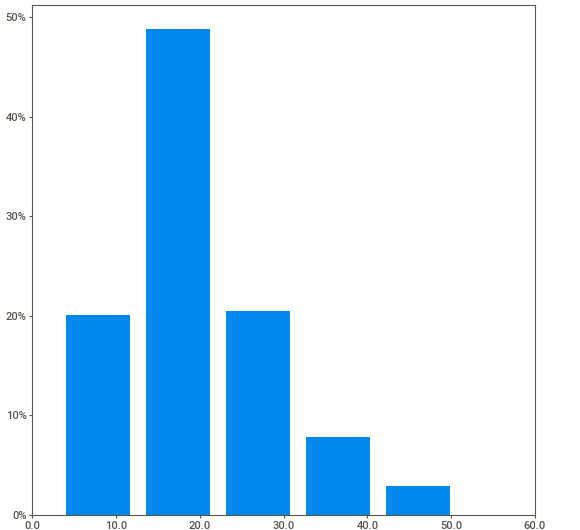
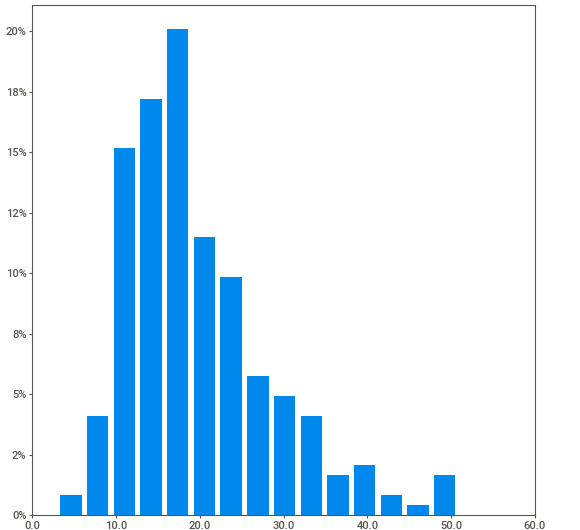
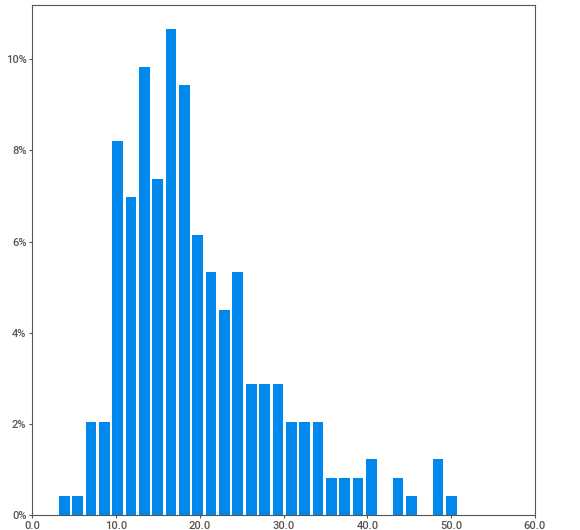
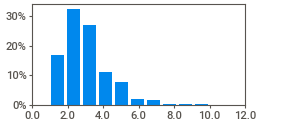
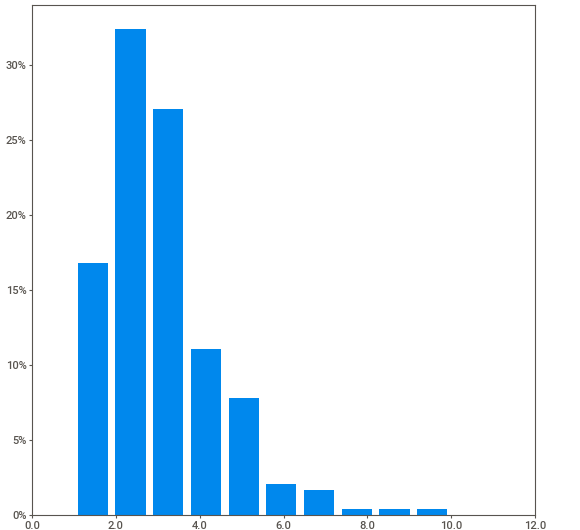
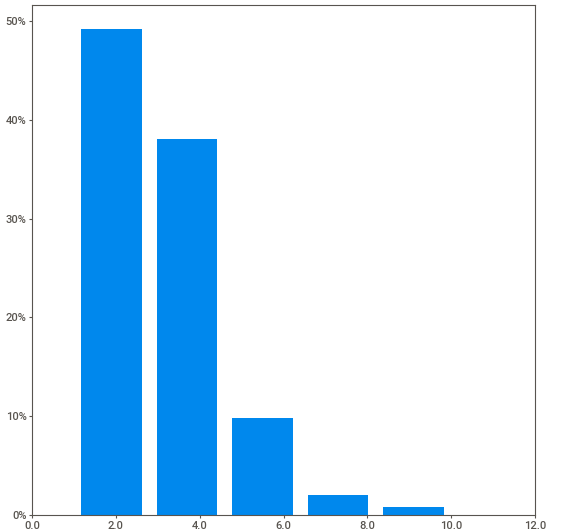
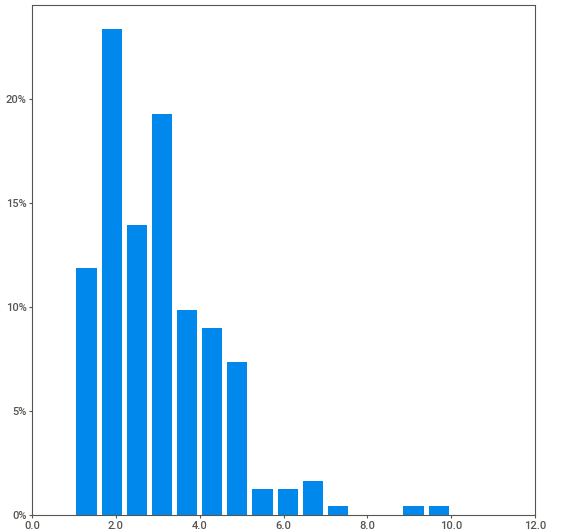
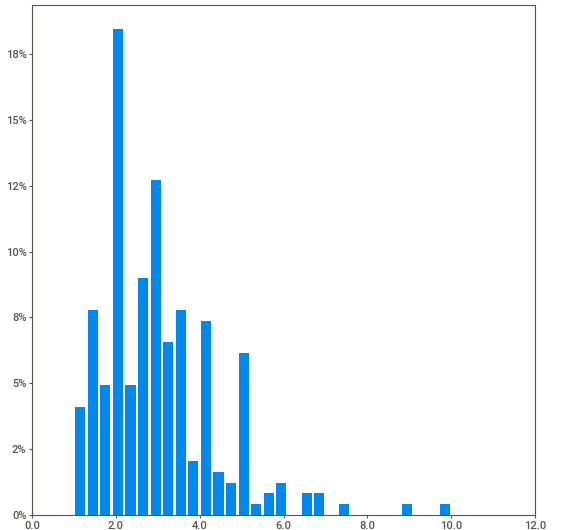
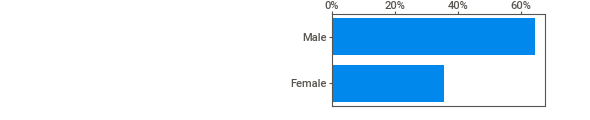
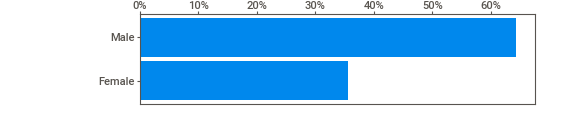
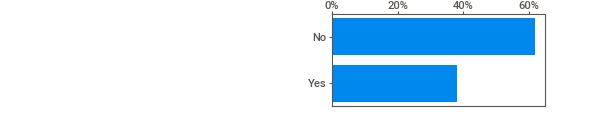
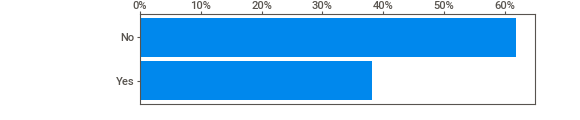
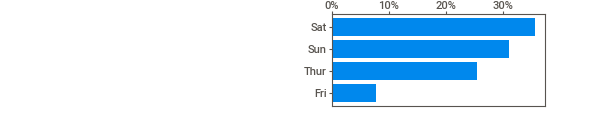
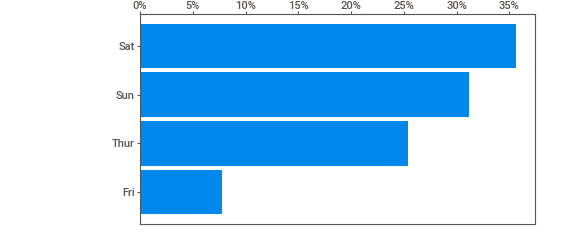
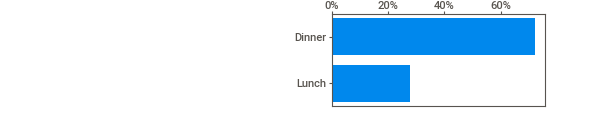
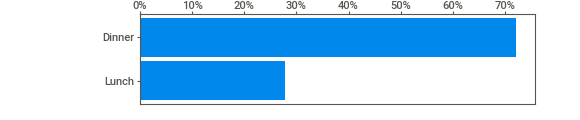
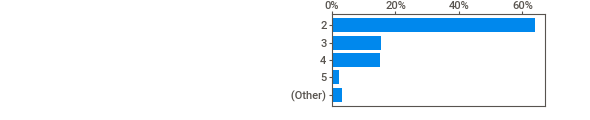
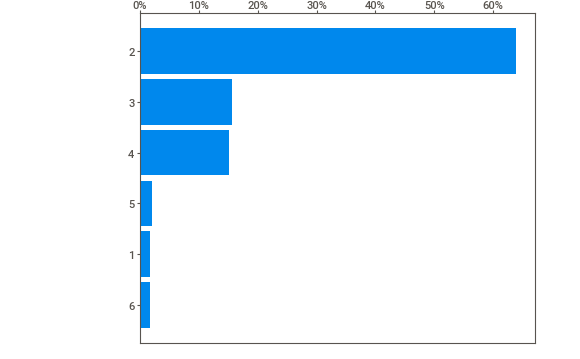
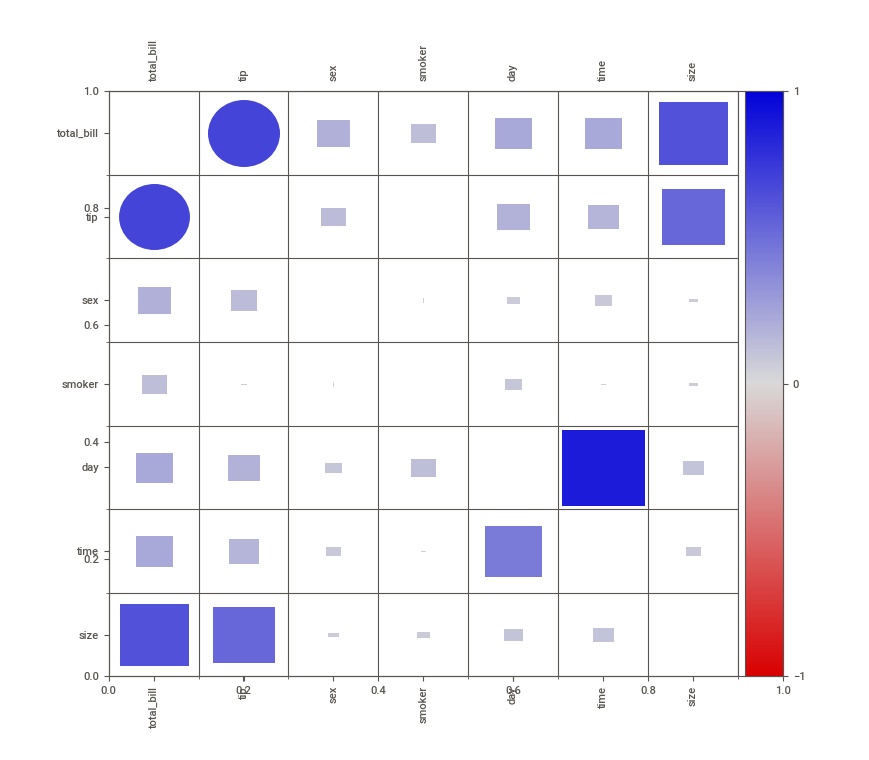
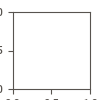

In [15]:
report = sv.analyze(tips)
report.show_notebook()

Es posible comparar diferentes cortes de base. Por ejemplo, compare el subconjunto de fumadores y no fumadores:

                                             |          | [  0%]   00:00 -> (? left)


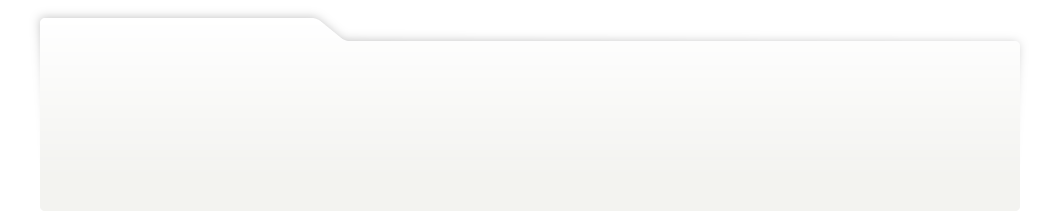
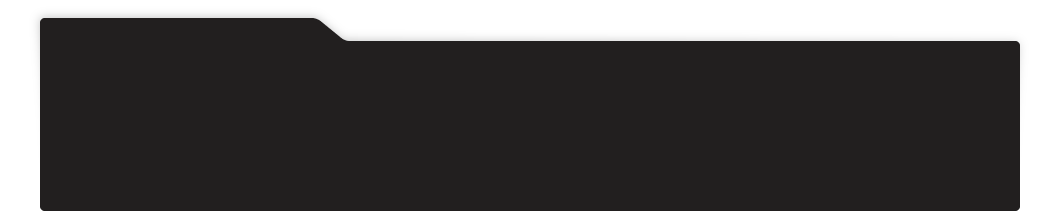
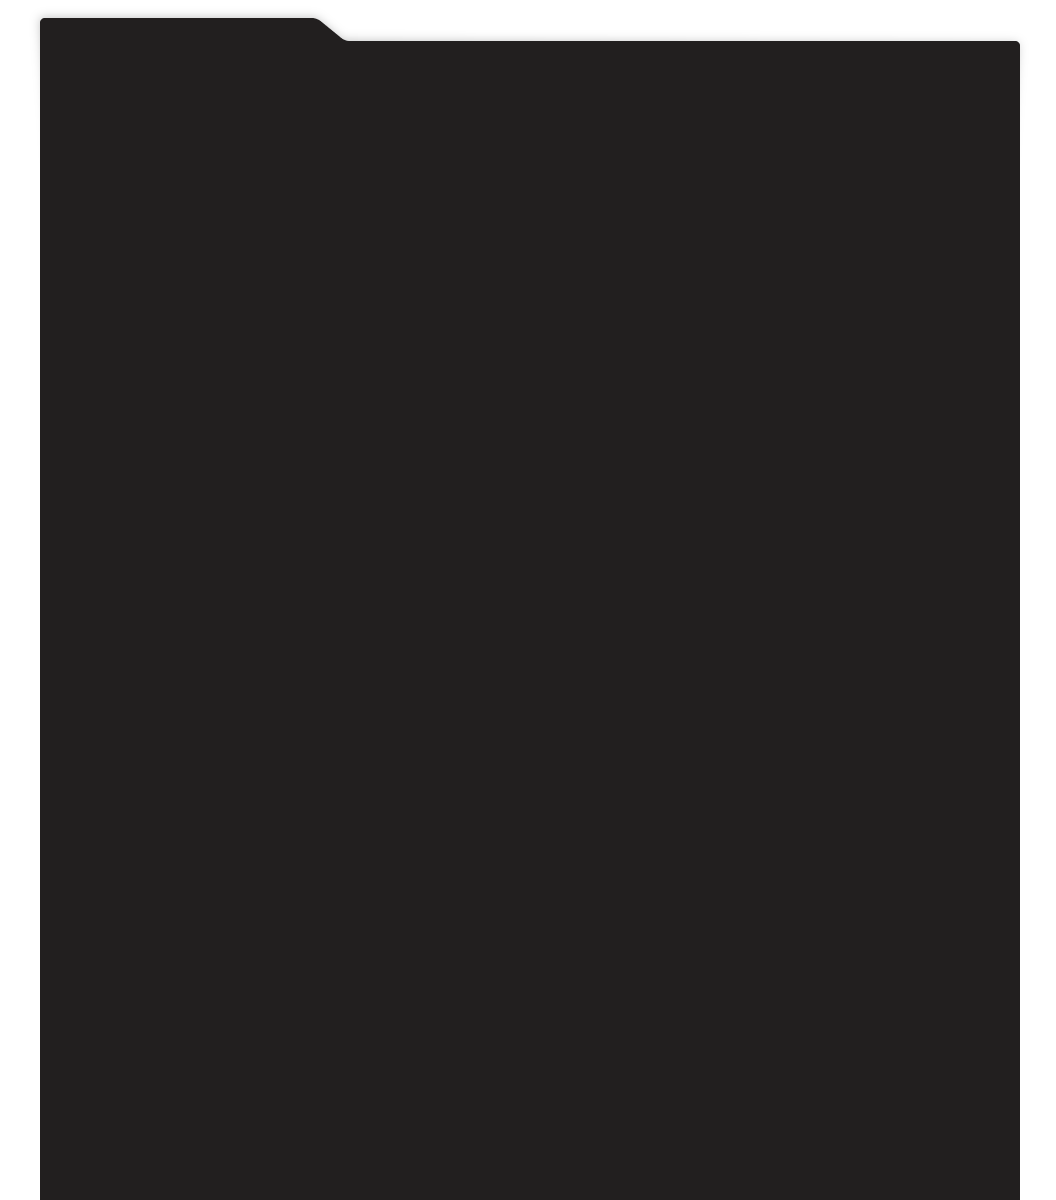
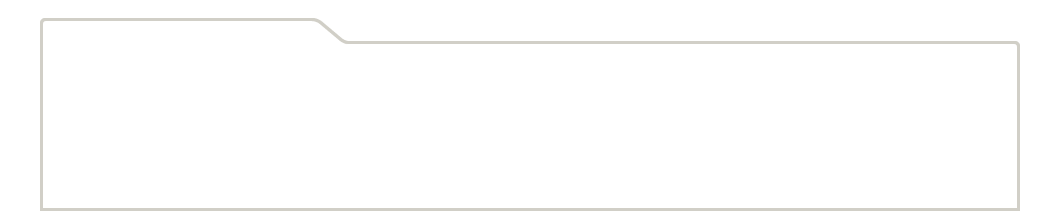
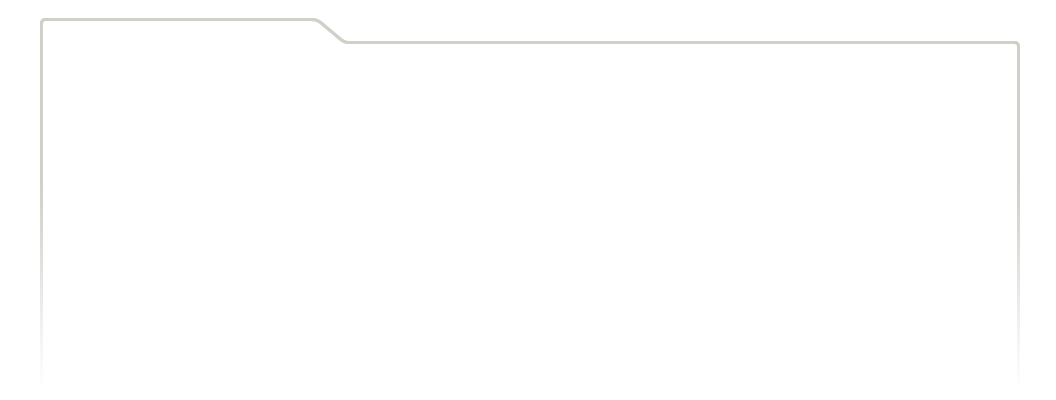
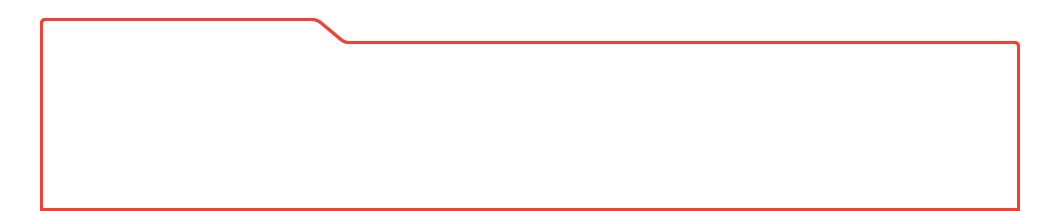
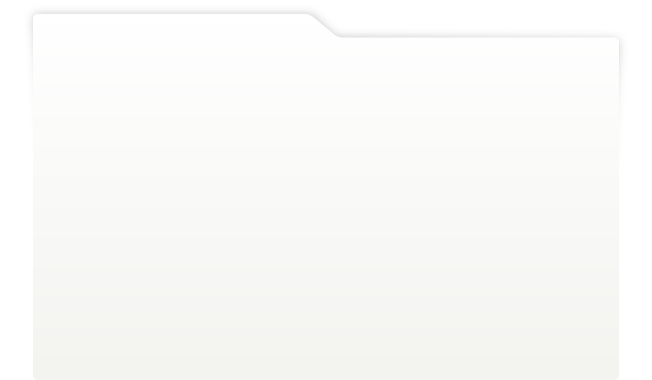
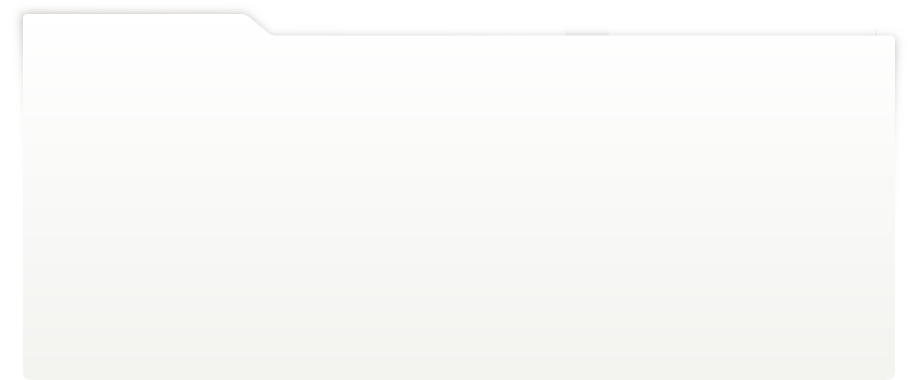
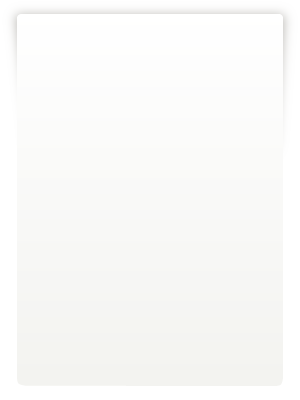
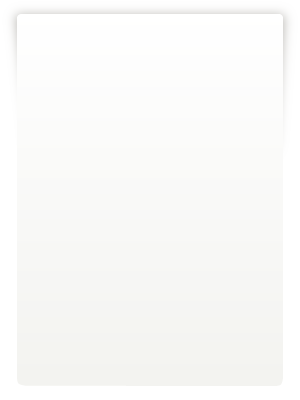
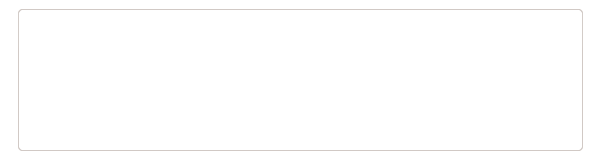
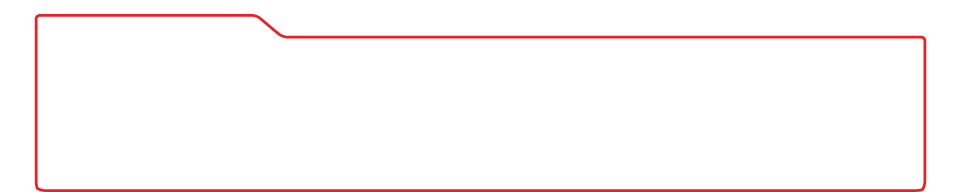
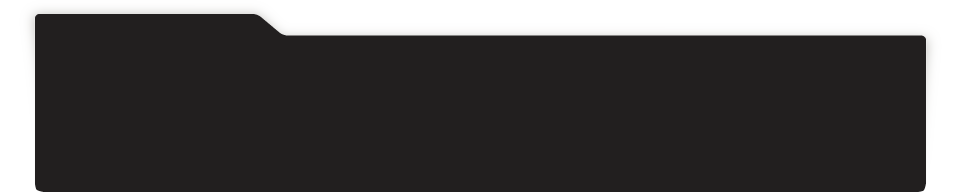
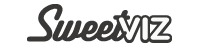
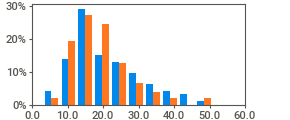
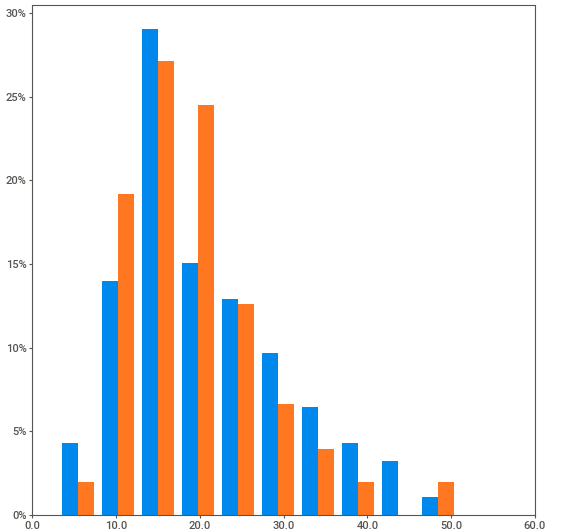
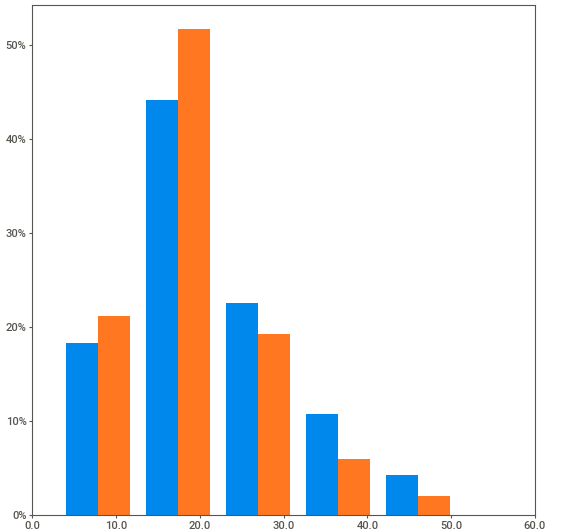
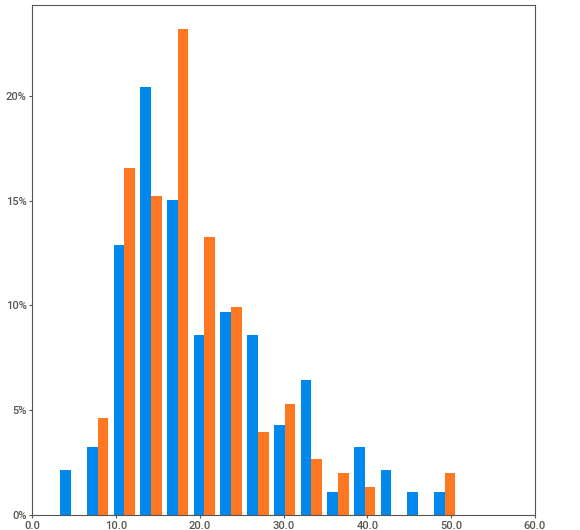
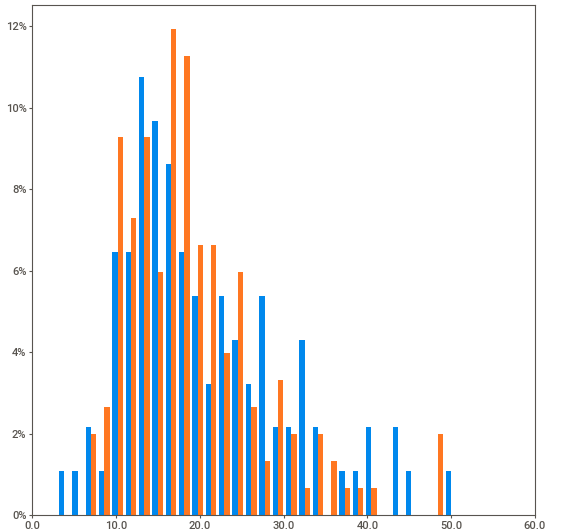
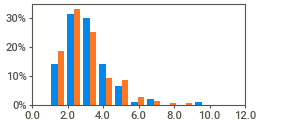
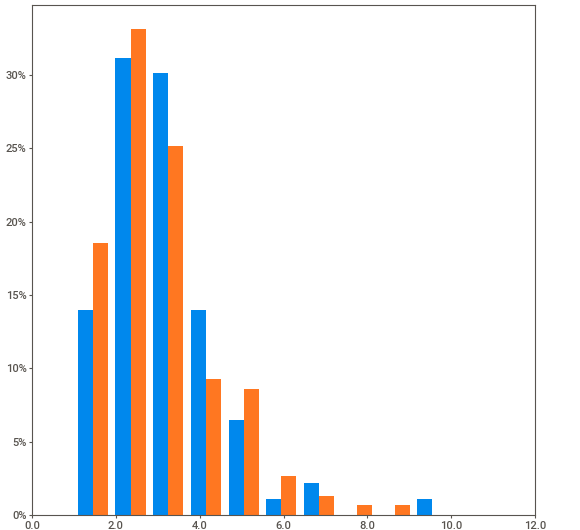
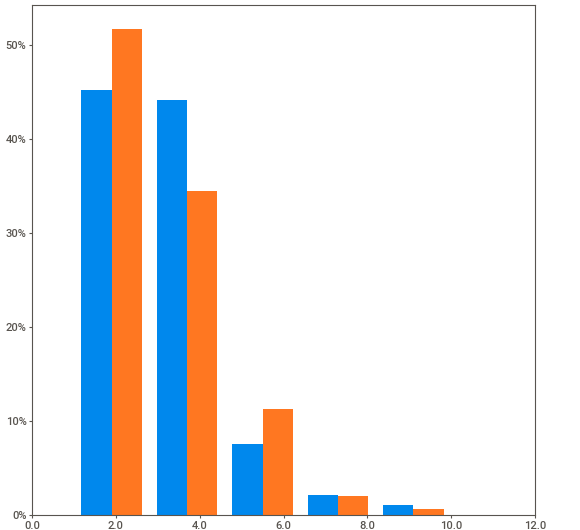
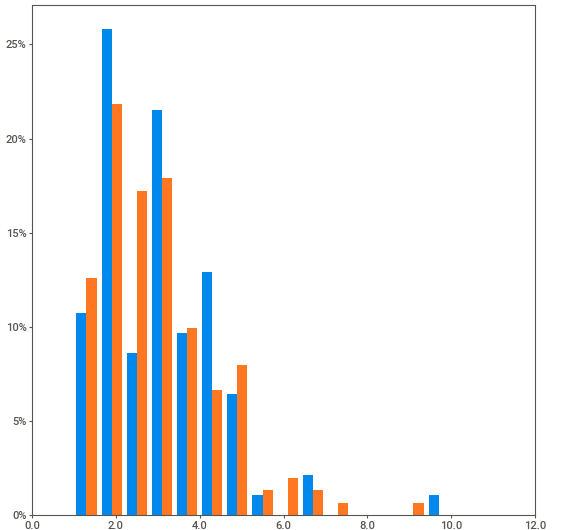
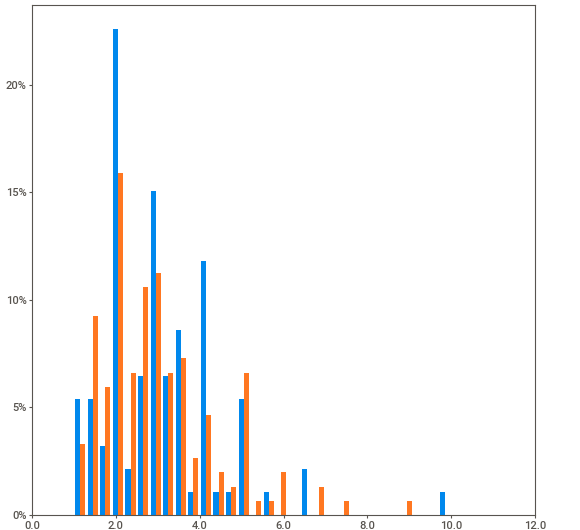
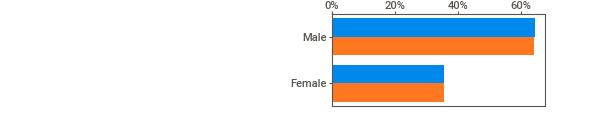
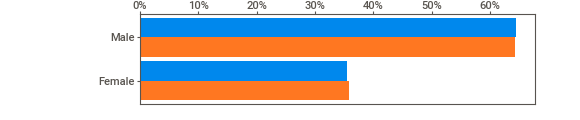
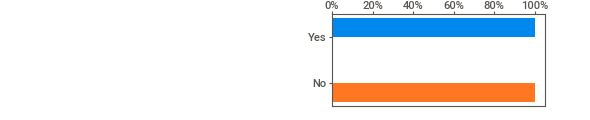
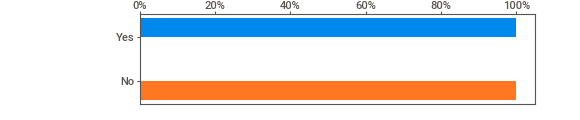
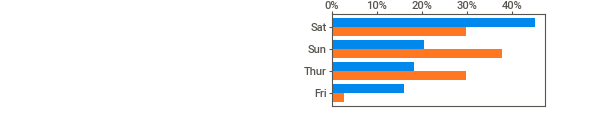
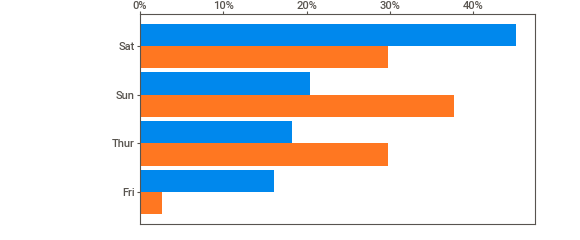
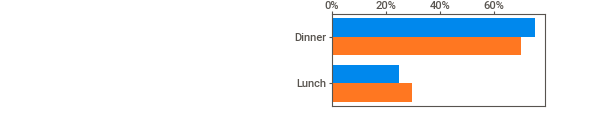
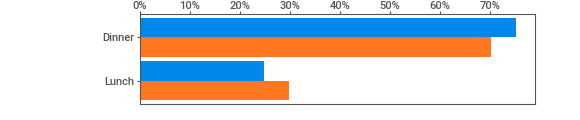
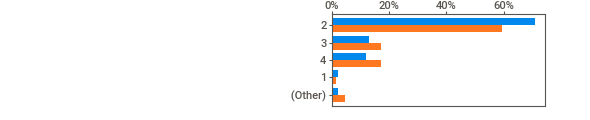
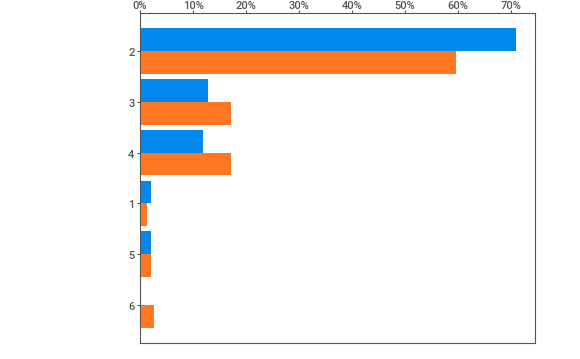
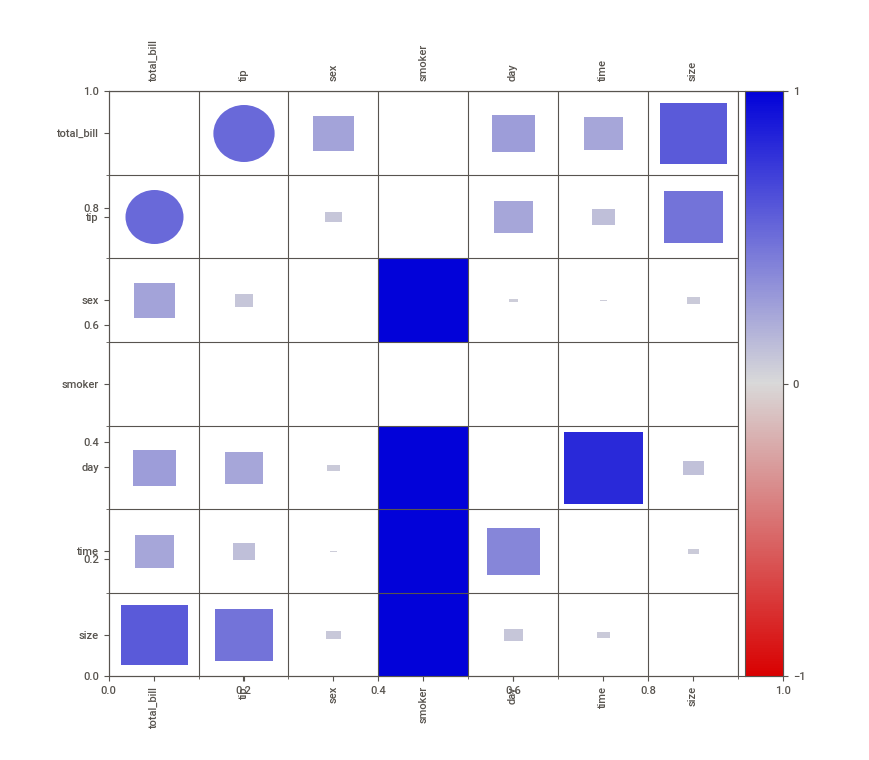
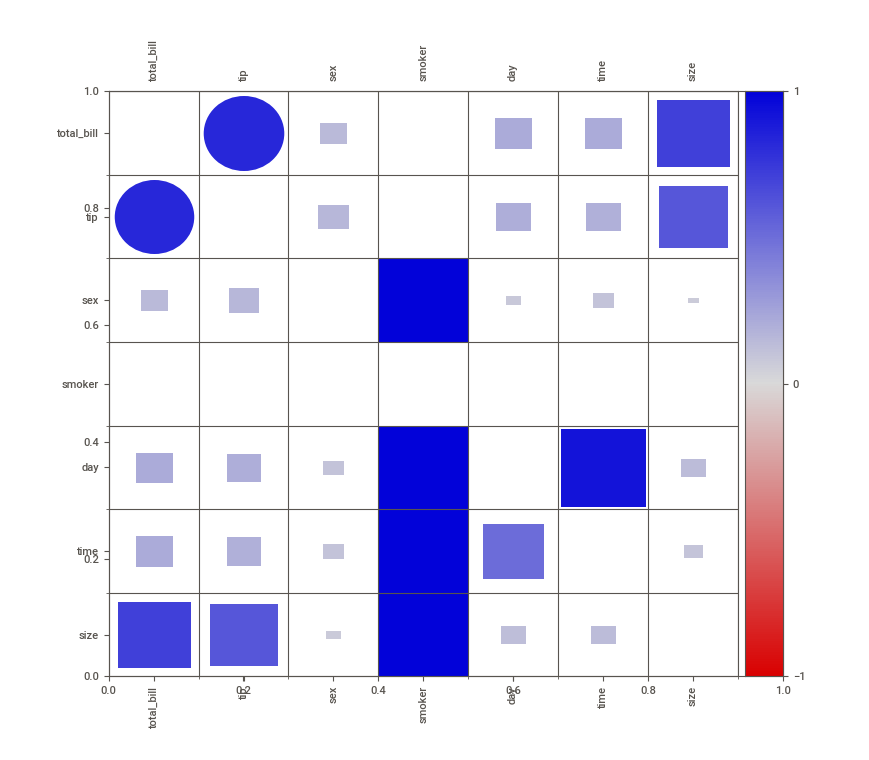

In [16]:
report = sv.compare_intra(tips,tips["smoker"] == "Yes",["Smoker","No Smoker"])
report.show_notebook()

O el subconjunto de clientes masculinos y femeninos:

                                             |          | [  0%]   00:00 -> (? left)


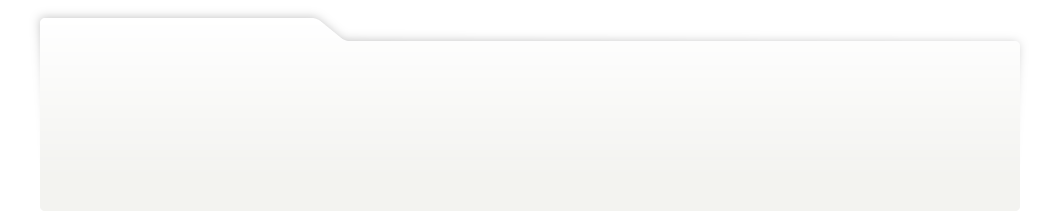
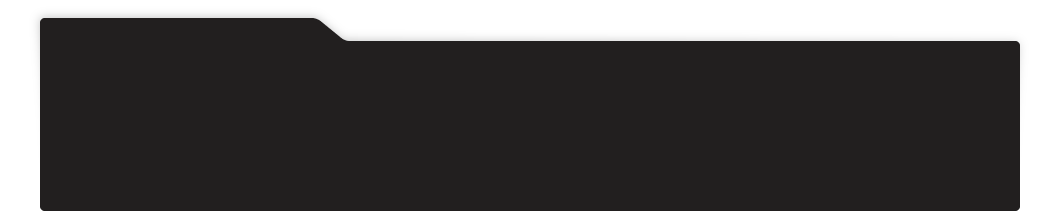
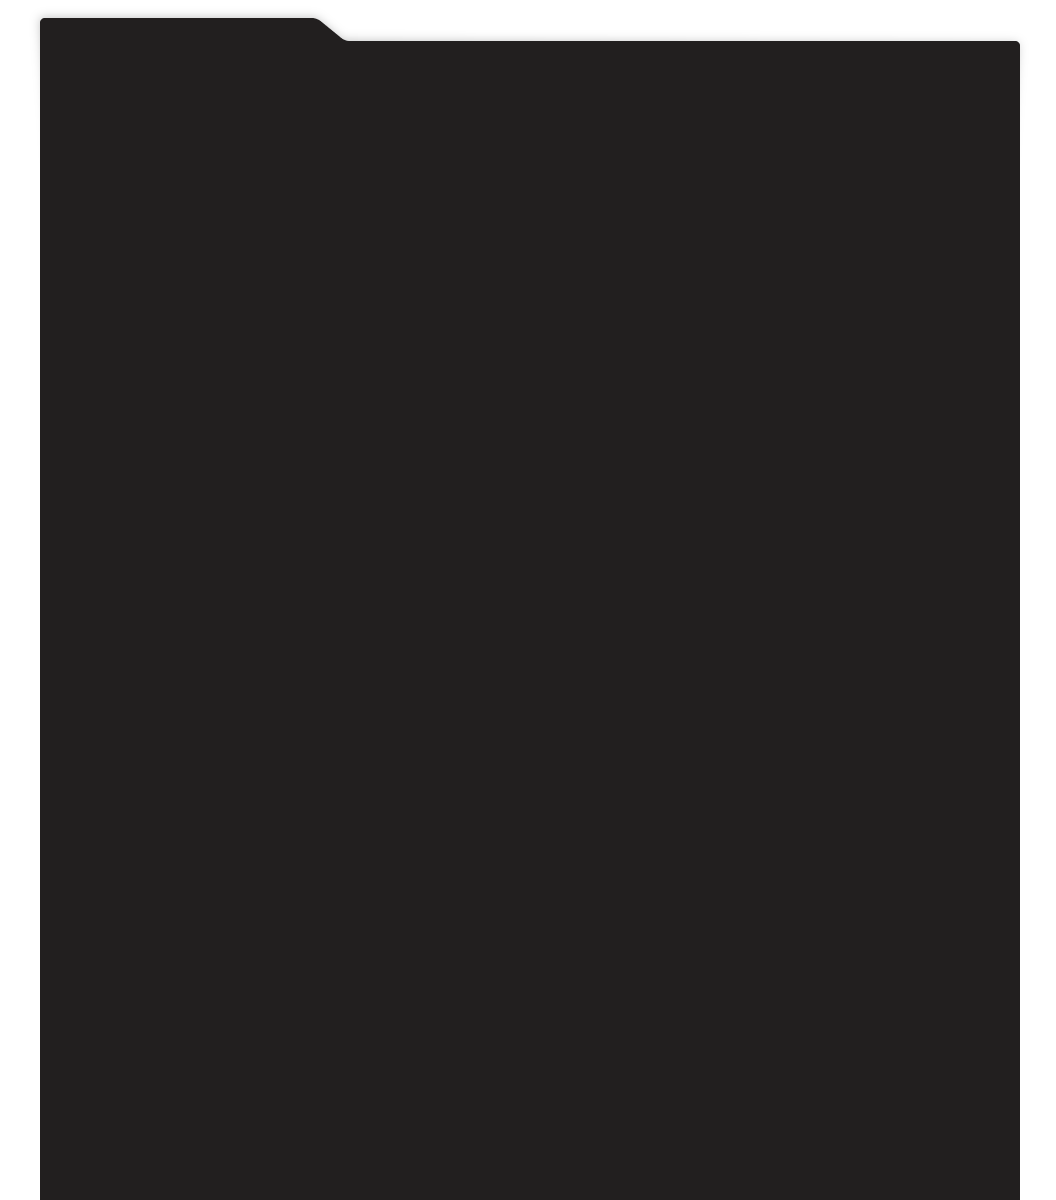
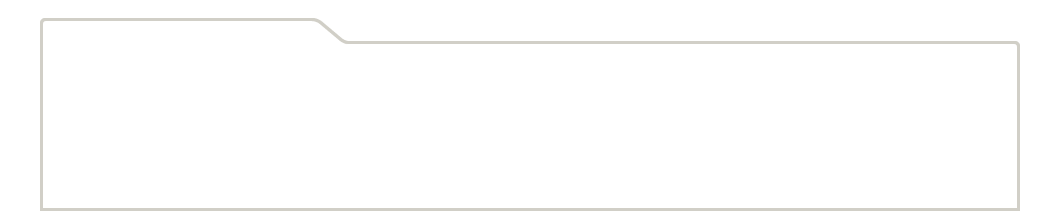
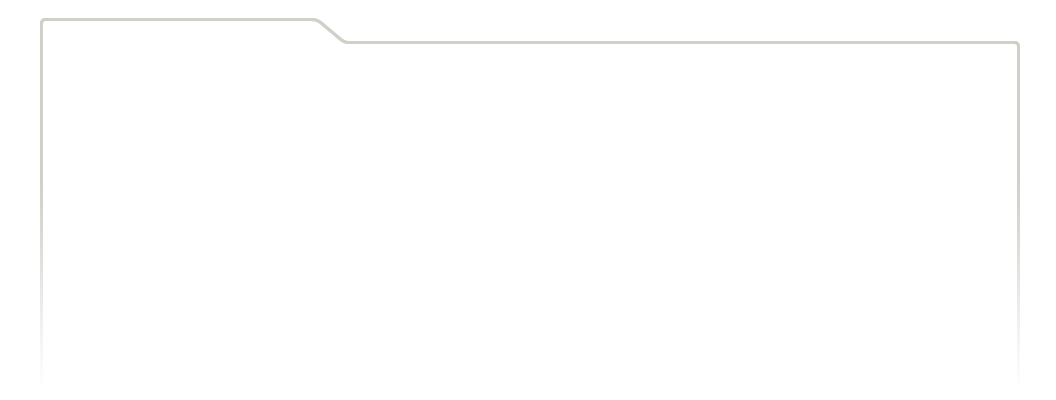
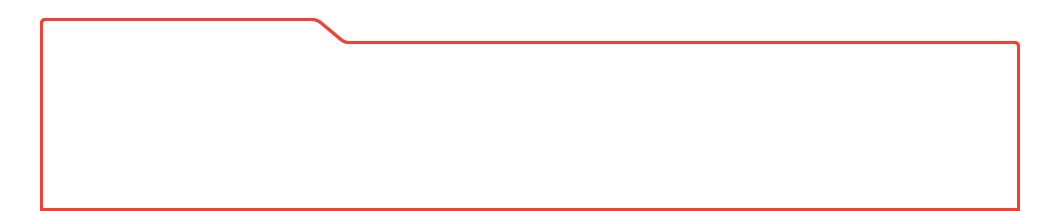
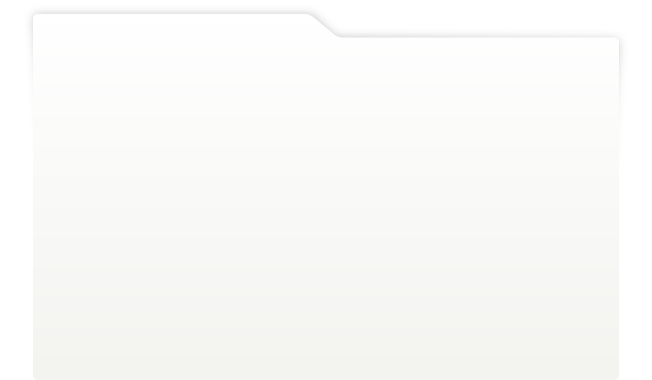
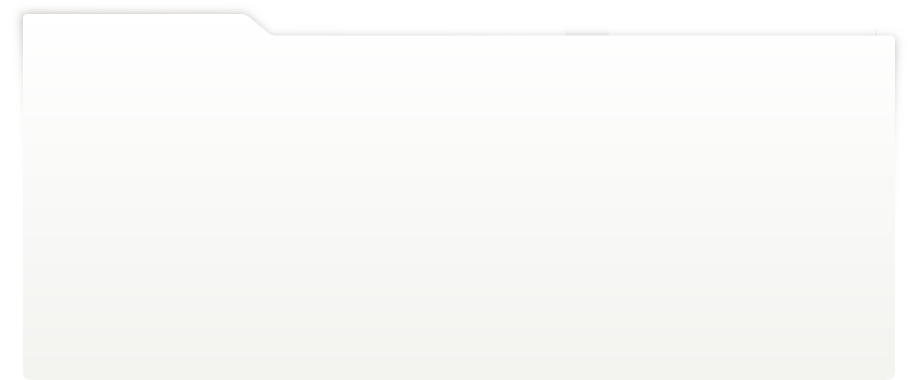
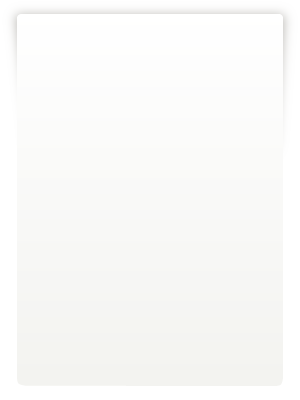
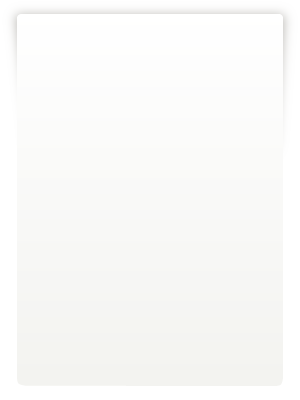
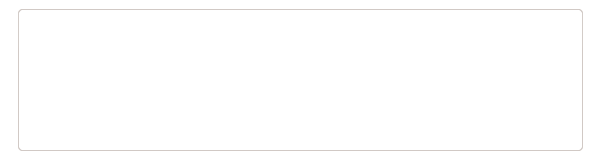
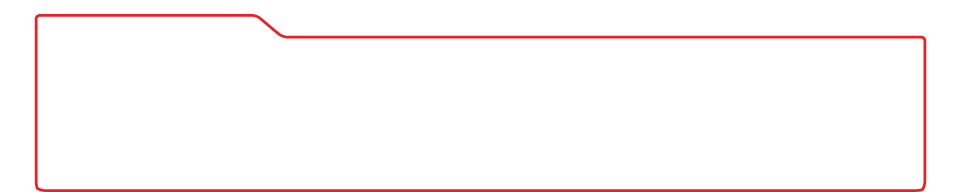
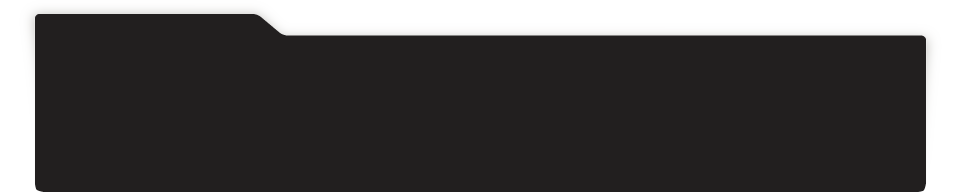
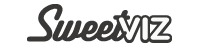
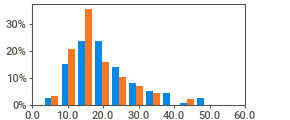
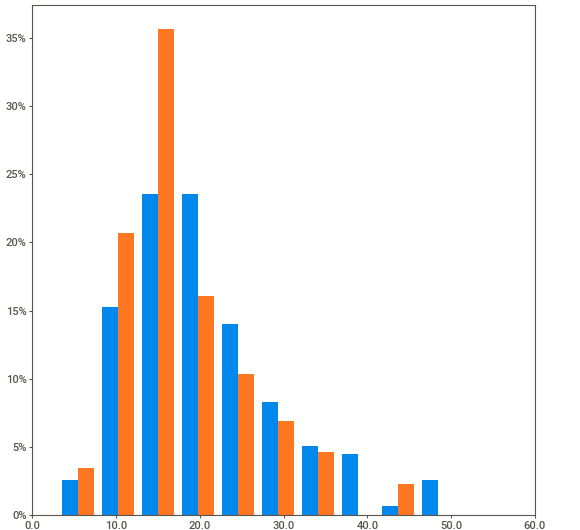
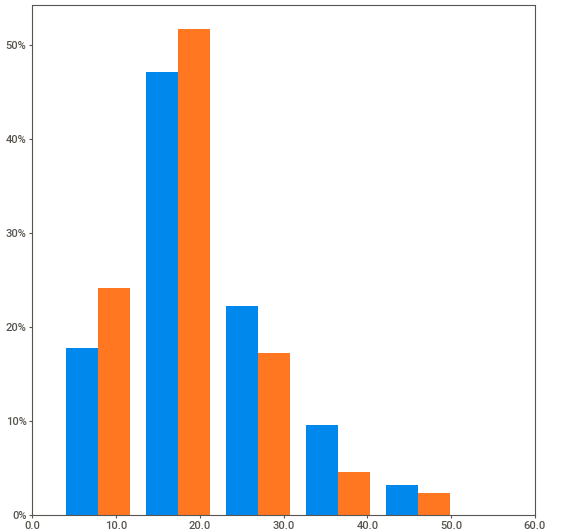
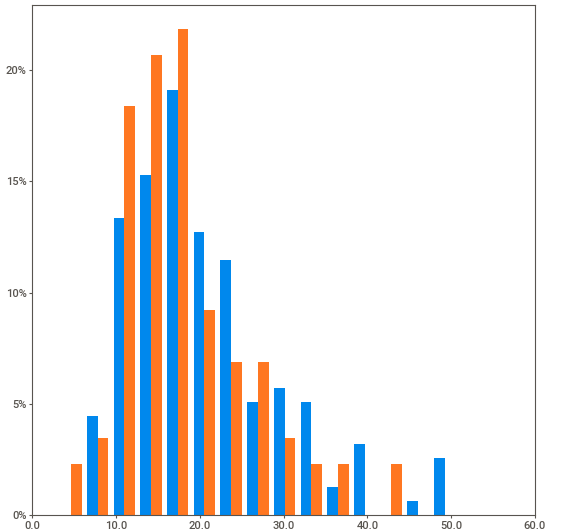
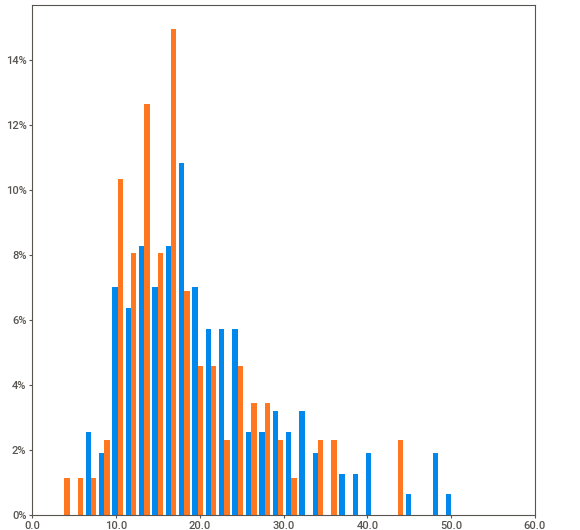
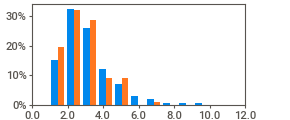
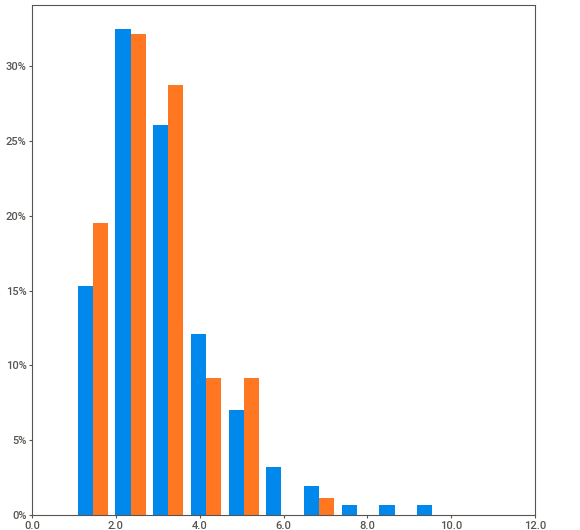
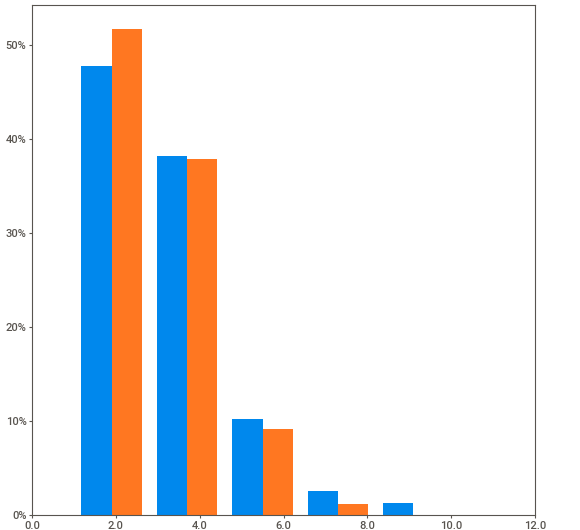
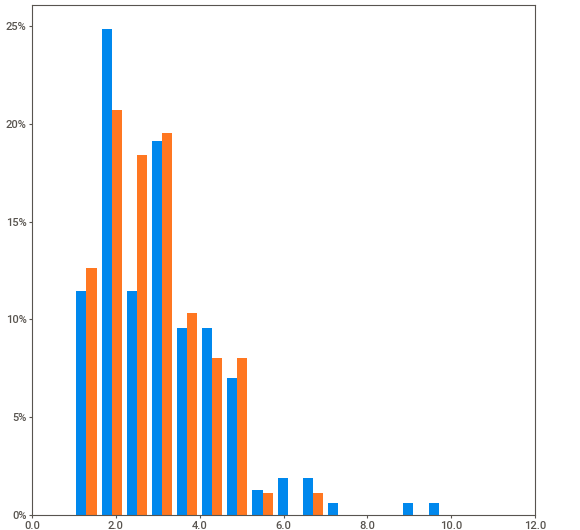
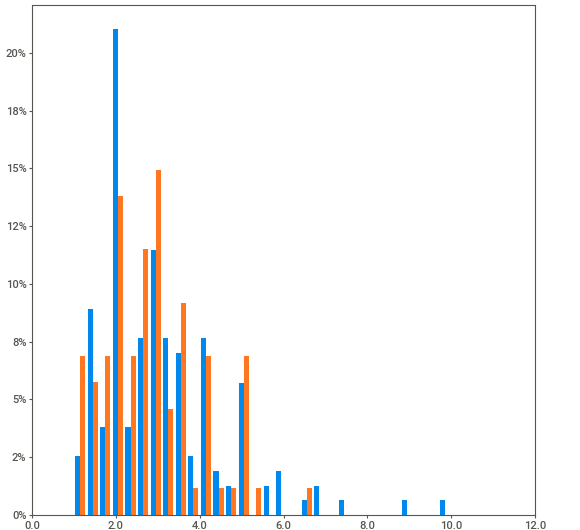
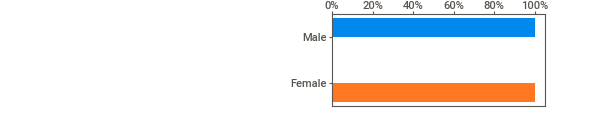
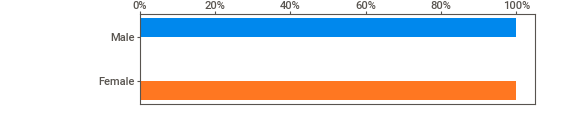
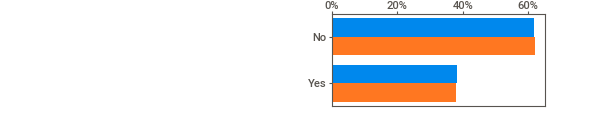
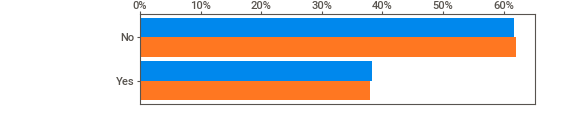
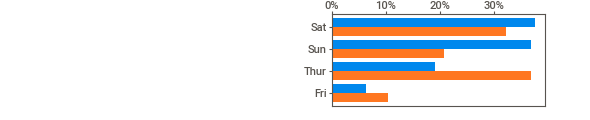
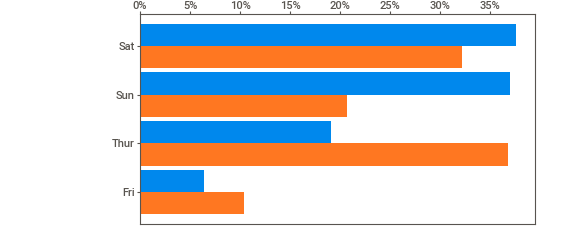
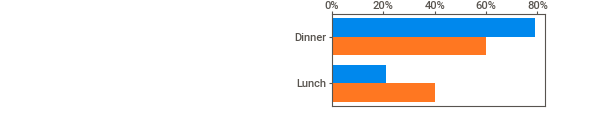
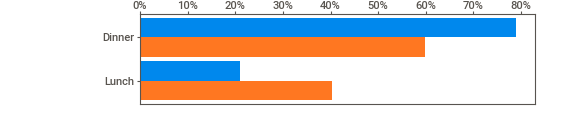
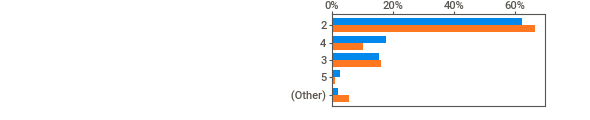
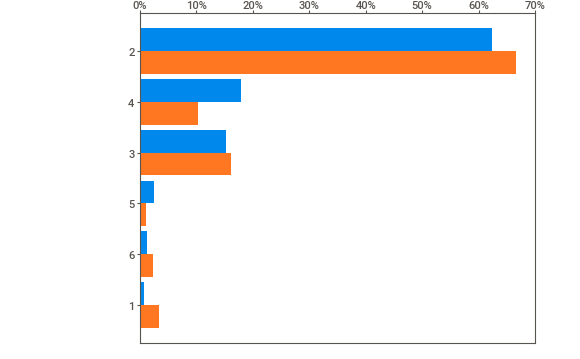
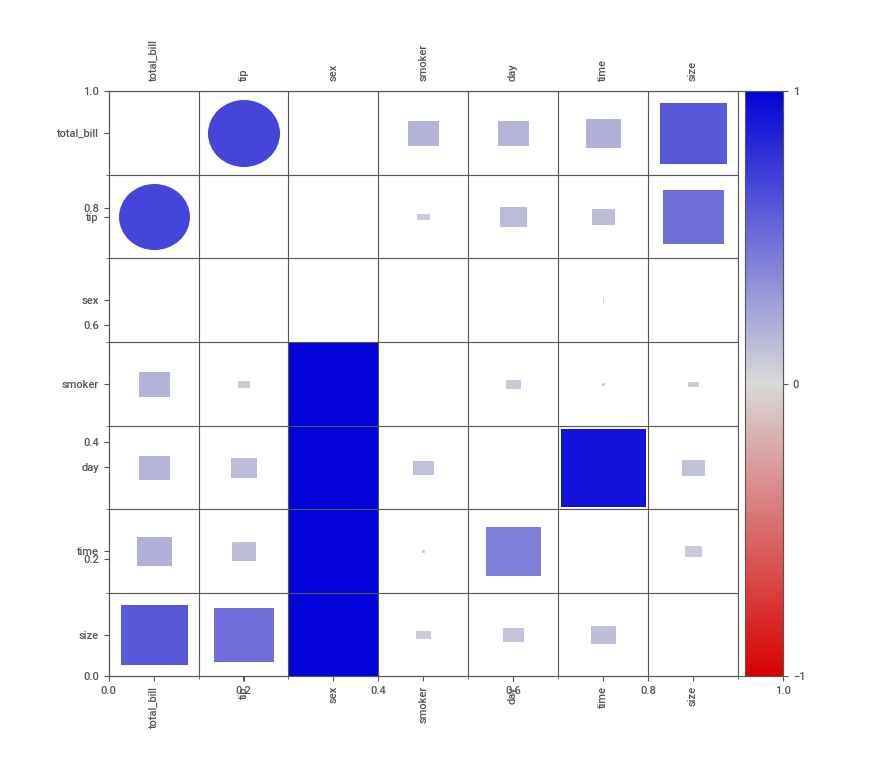
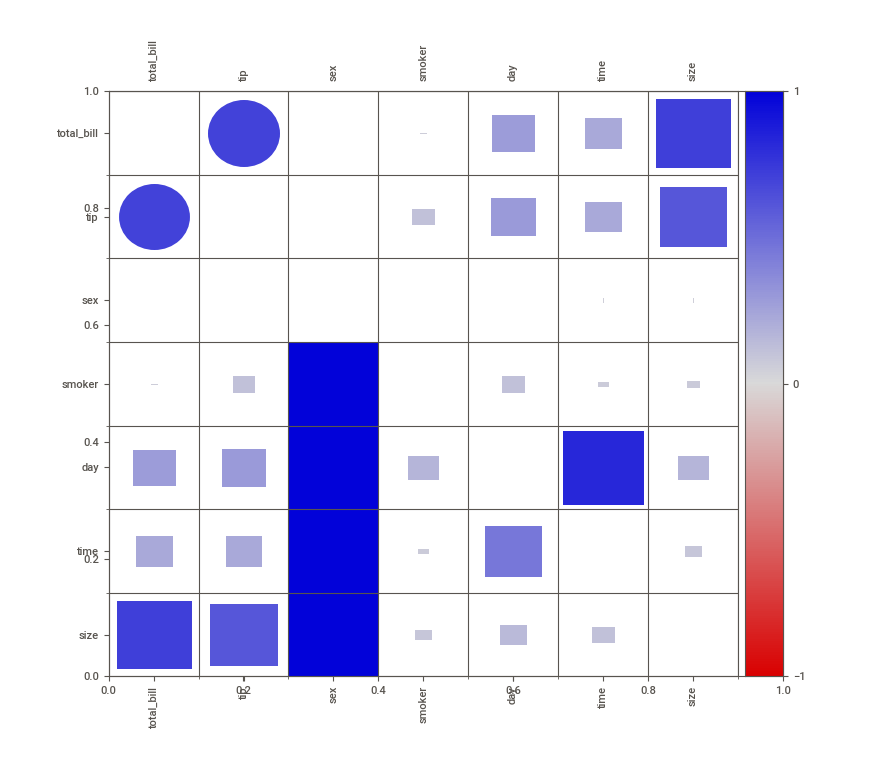

In [17]:
report = sv.compare_intra(tips,tips["sex"] == "Male",["Male","Female"])
report.show_notebook()

O los subgrupos de almuerzo y cena:

                                             |          | [  0%]   00:00 -> (? left)


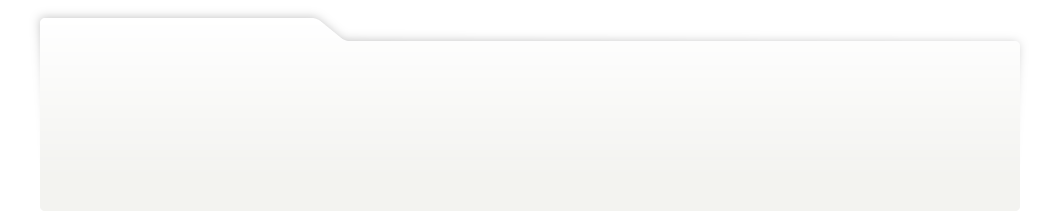
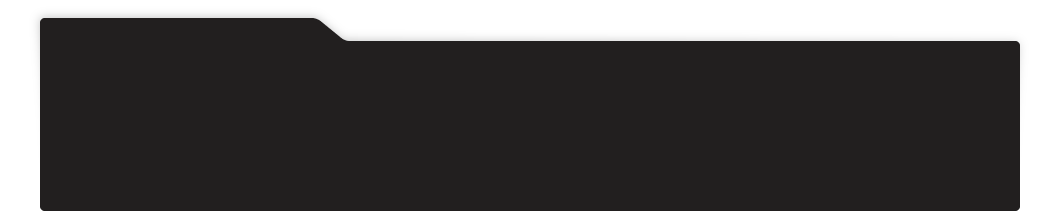
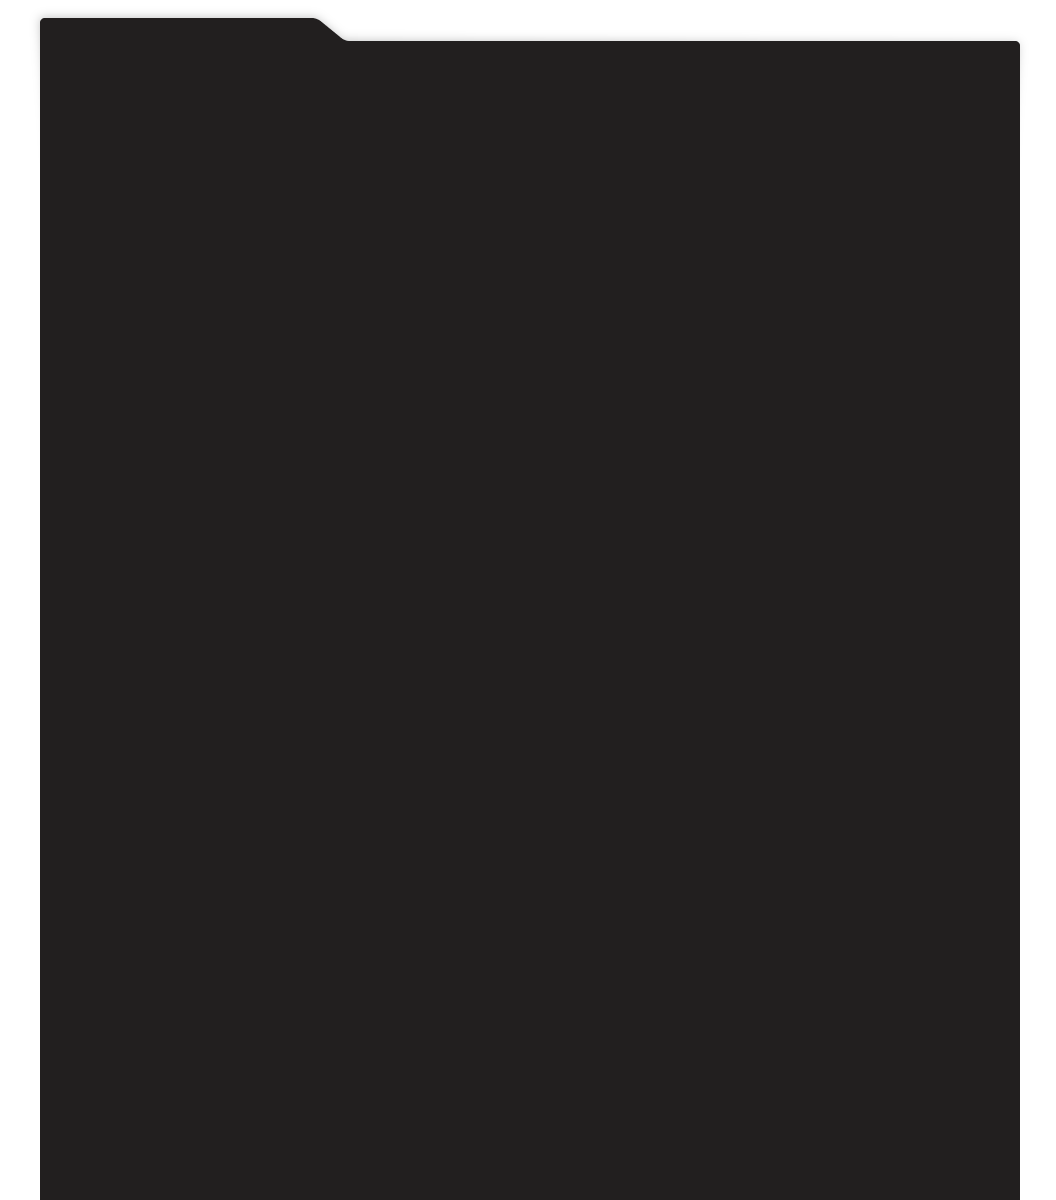
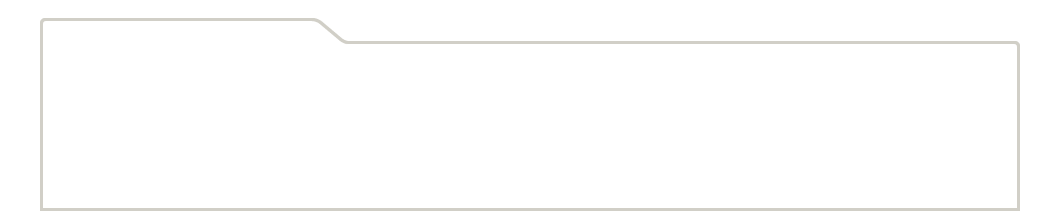
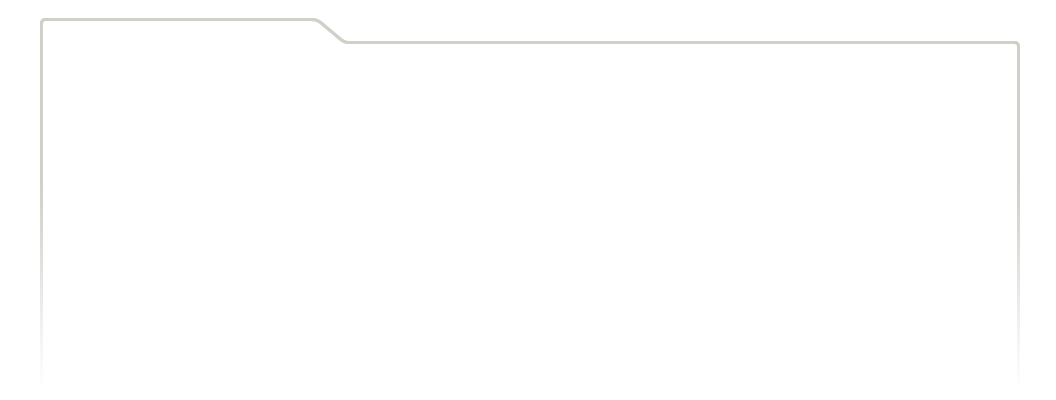
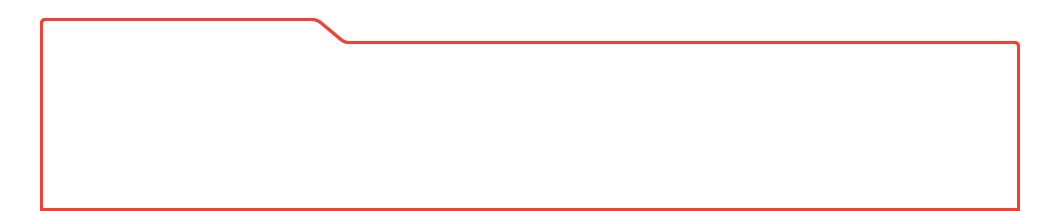
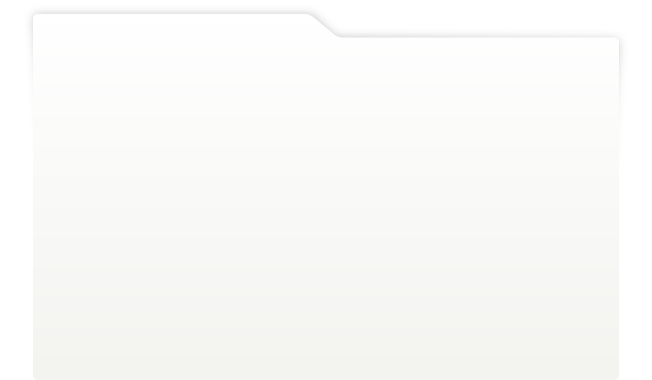
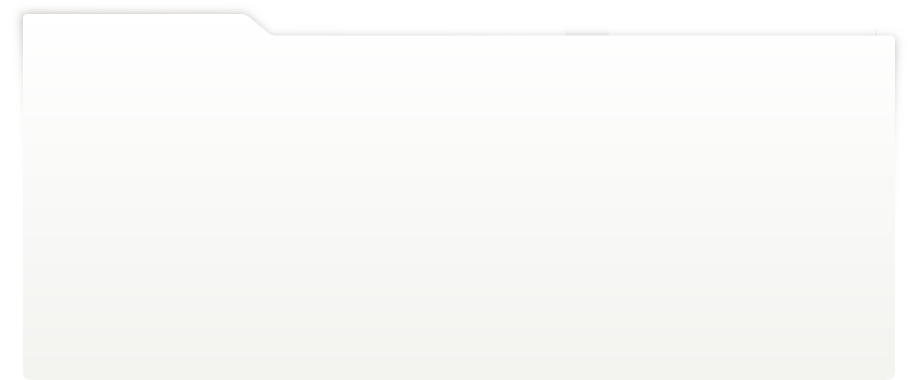
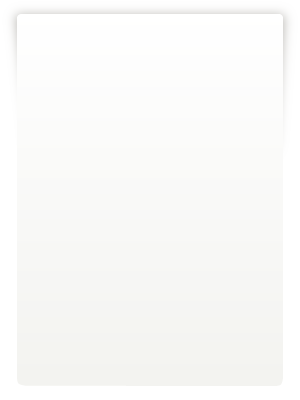
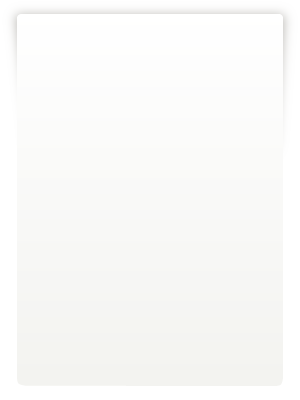
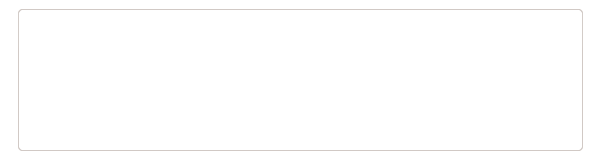
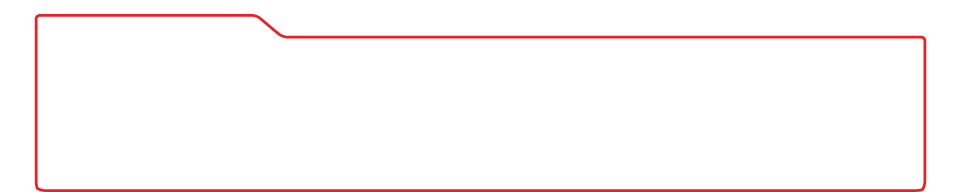
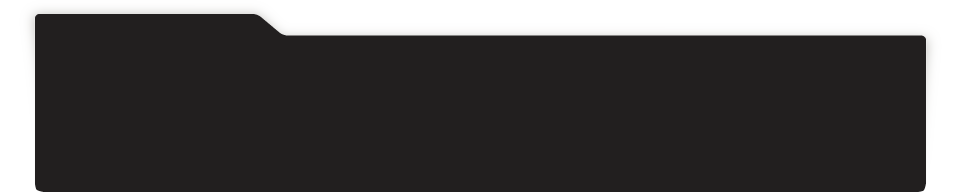
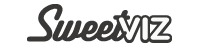
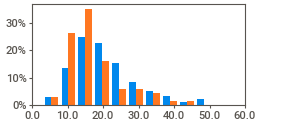
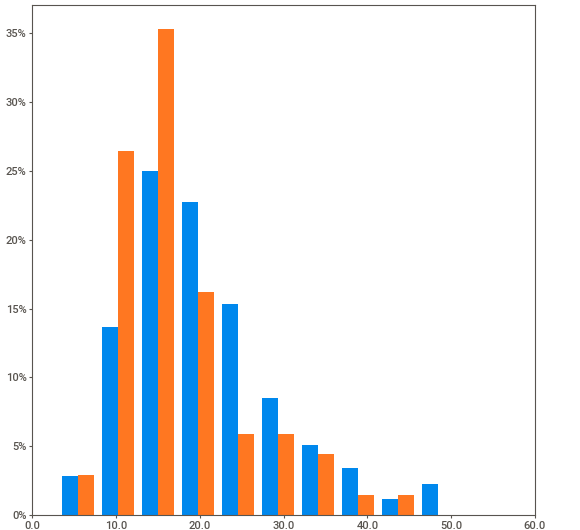
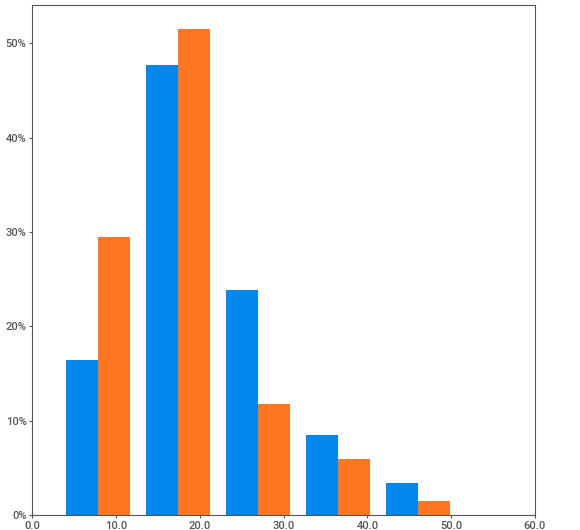
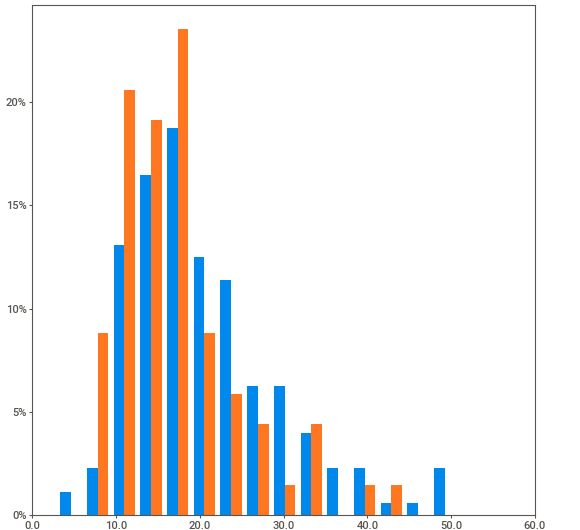
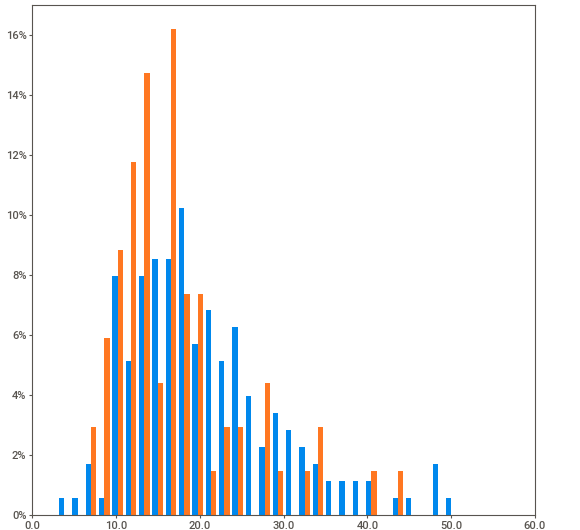
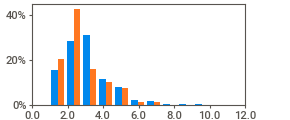
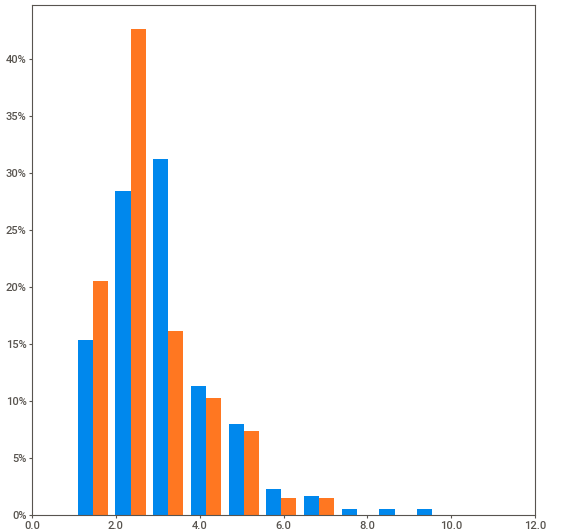
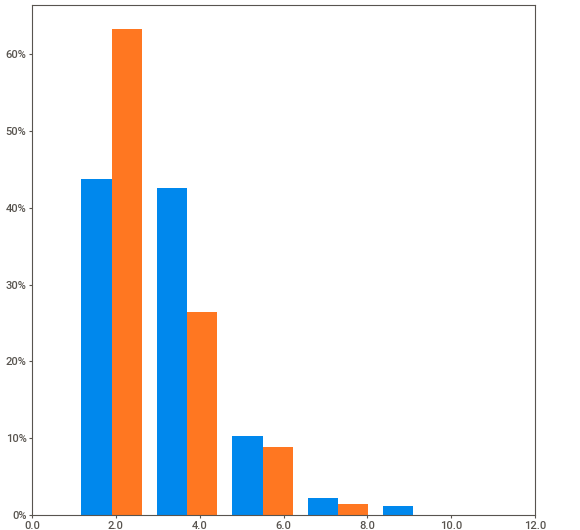
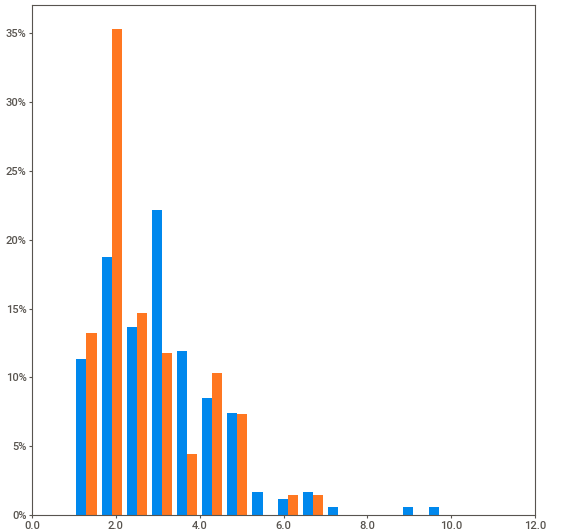
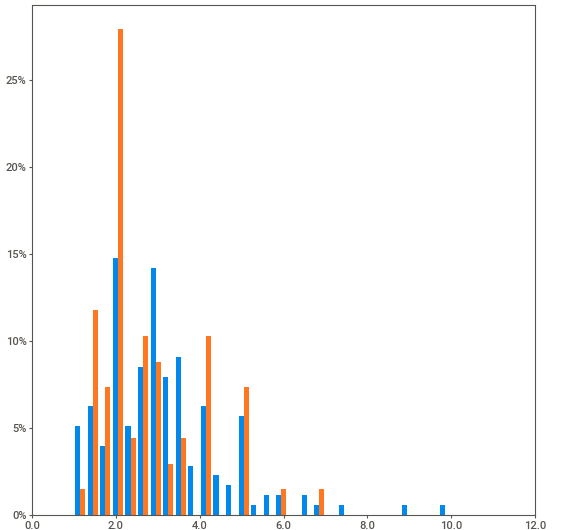
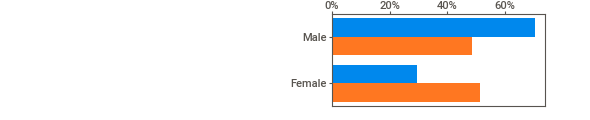
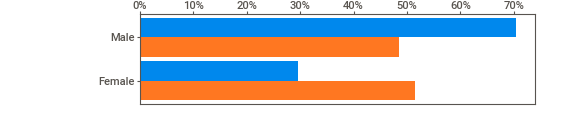
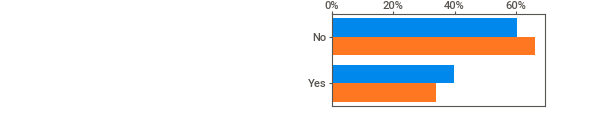
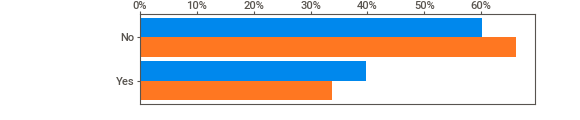
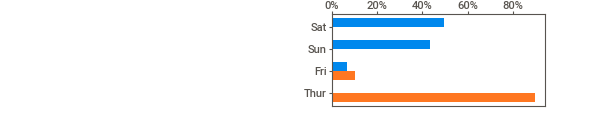
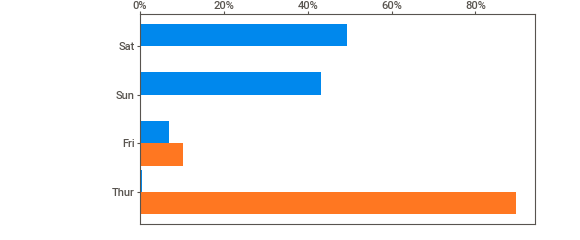
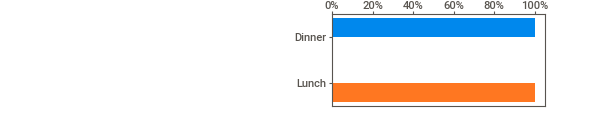
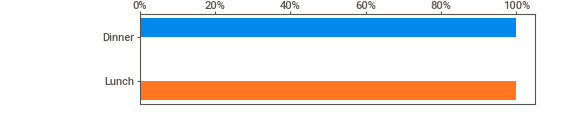
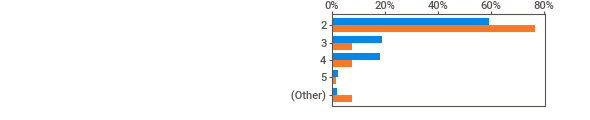
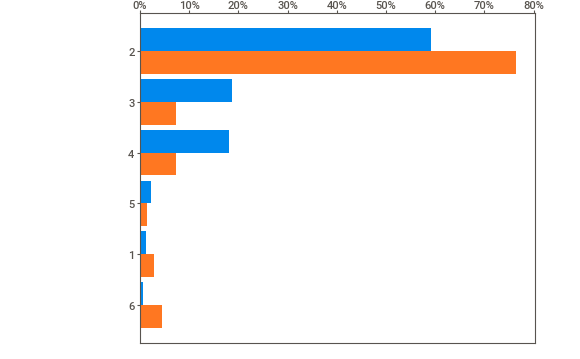
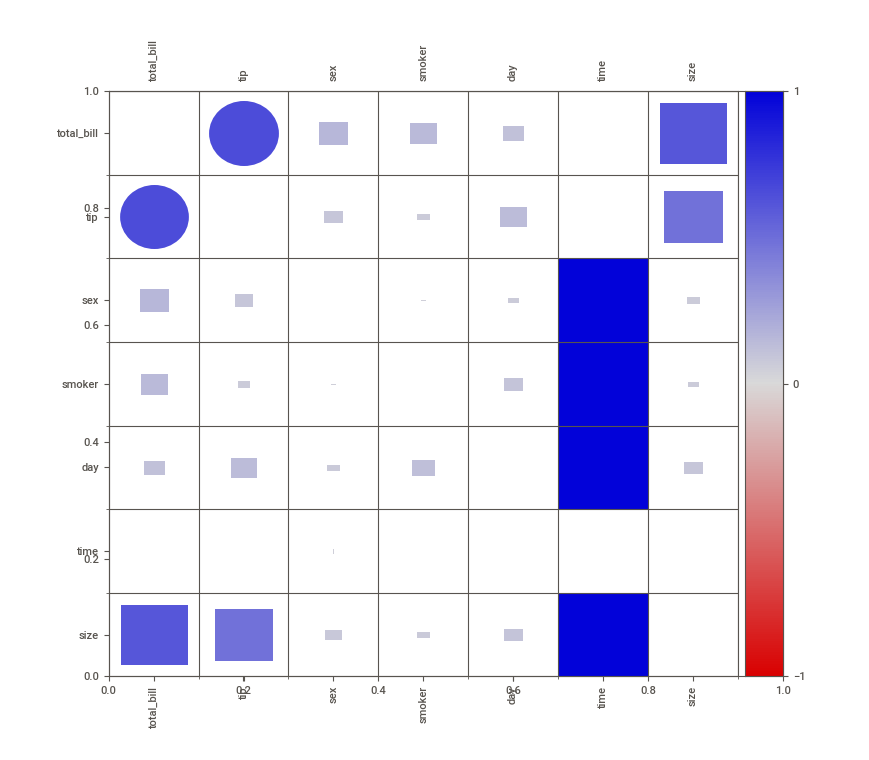
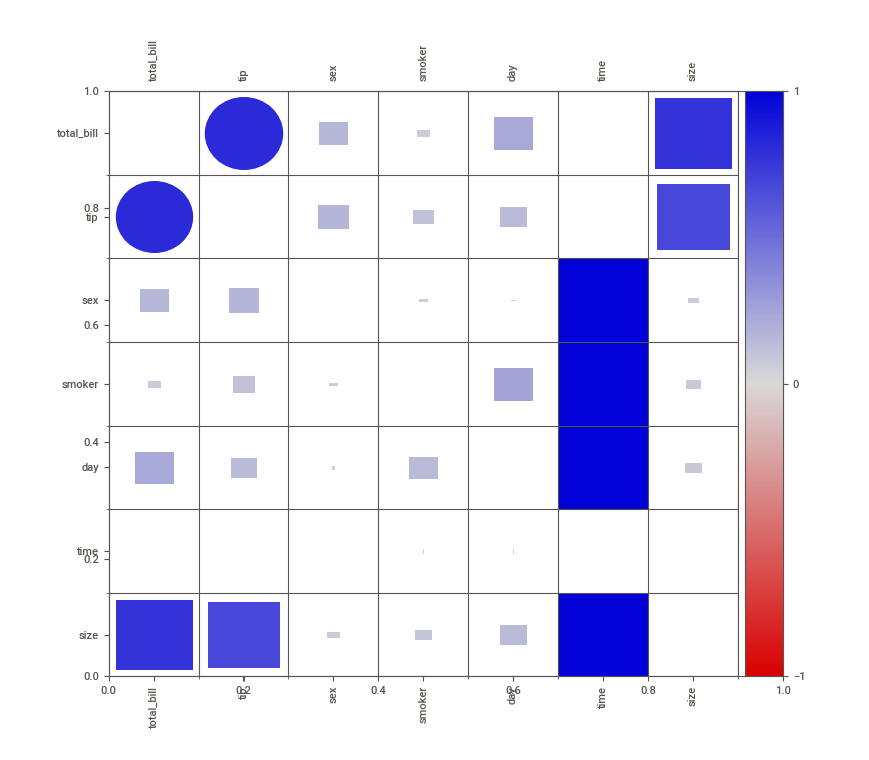

In [18]:
report = sv.compare_intra(tips,tips["time"] == "Dinner",["Dinner","Lunch"])
report.show_notebook()

## Impacto de los valores perdidos

Para ilustrar la diferencia entre los mecanismos de valor perdido, simulemos diferentes mecanismos de valor perdido y comparemos bases de datos. Inicialmente haremos una copia de la base de datos:

In [19]:
tips_NA = tips.copy()

Y luego seleccionamos una muestra aleatoria del 20%,

In [20]:
sample = np.random.choice(list(tips_NA.index),int(len(tips)*0.2))
tips_NA.loc[sample,['total_bill','tip']] = np.nan

Comparemos los dos conjuntos de datos:

                                             |          | [  0%]   00:00 -> (? left)


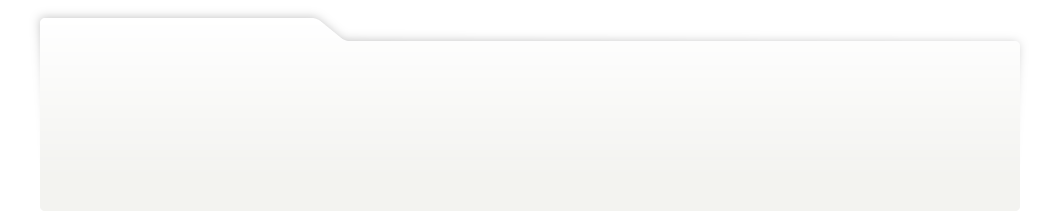
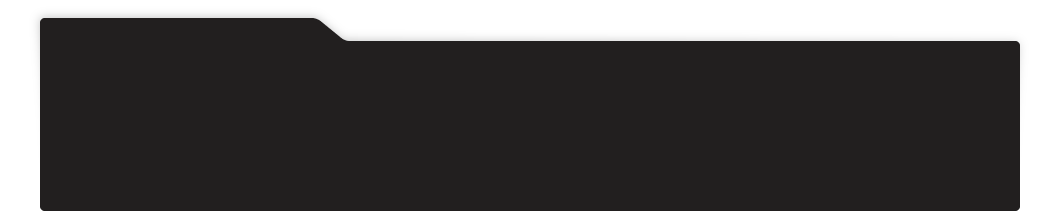
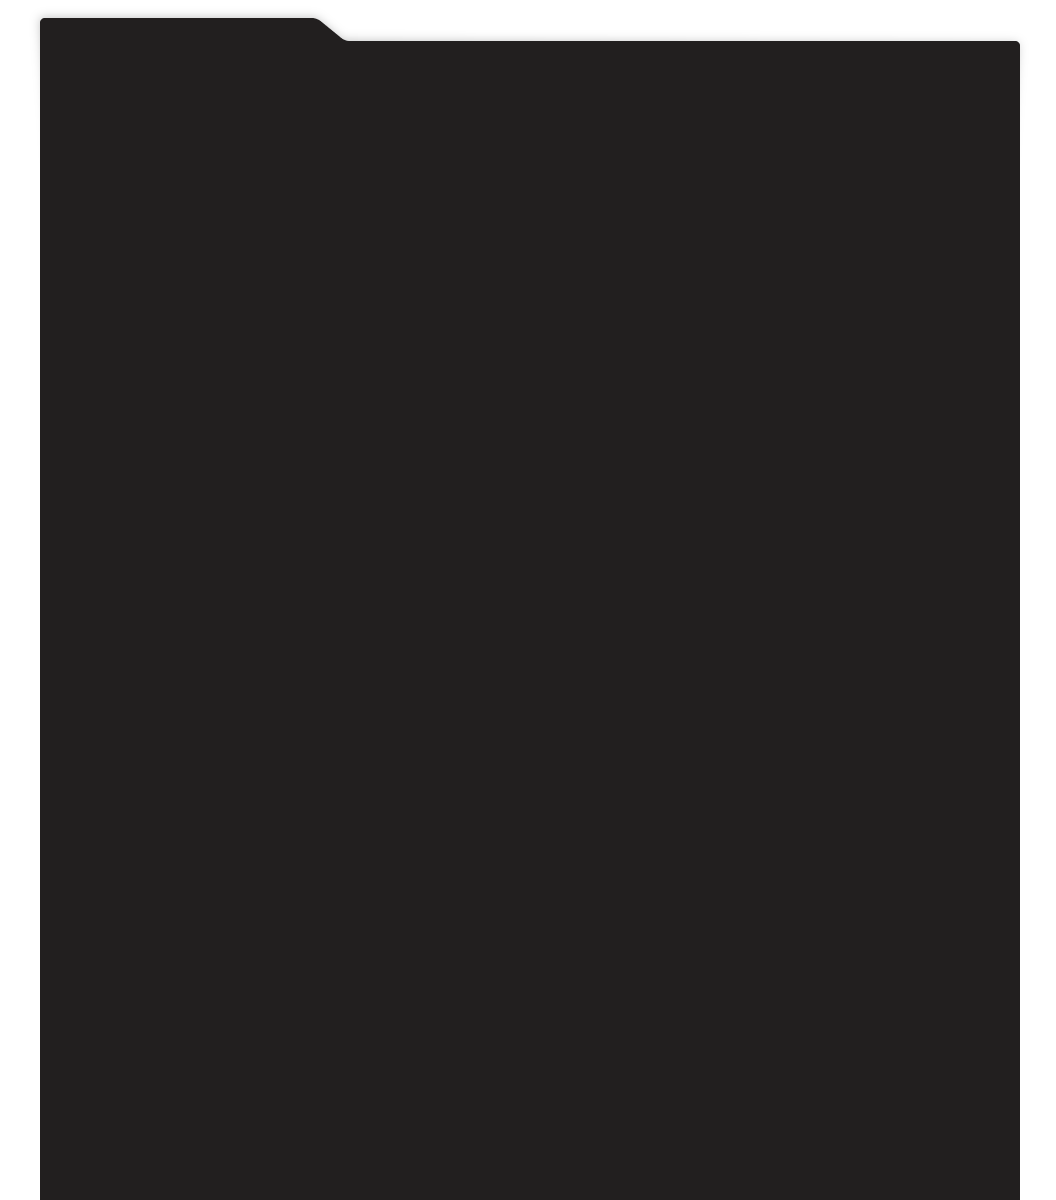
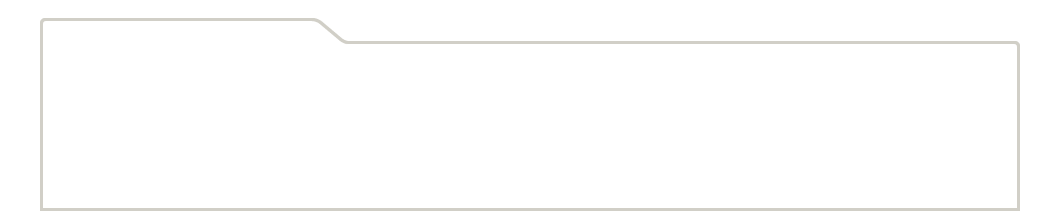
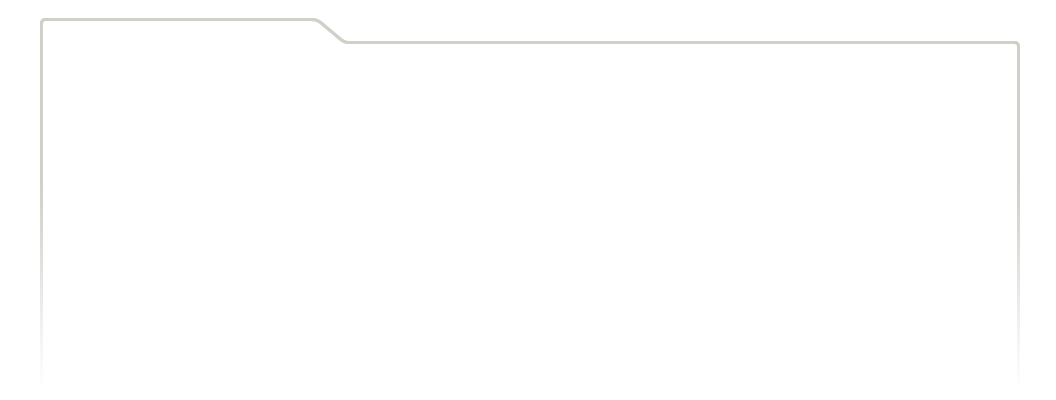
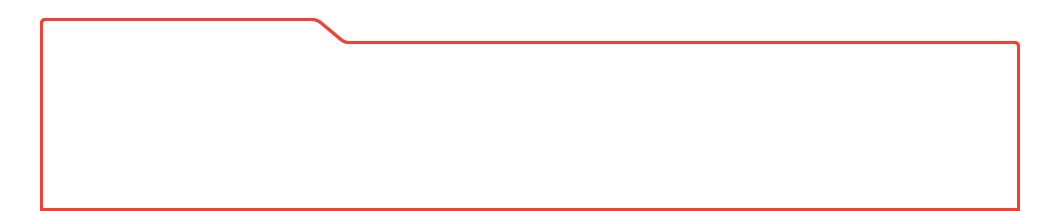
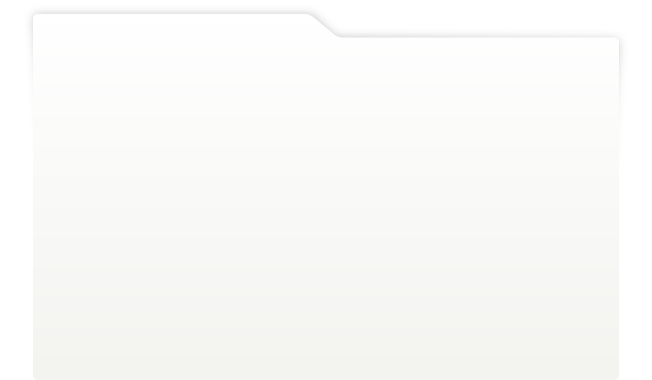
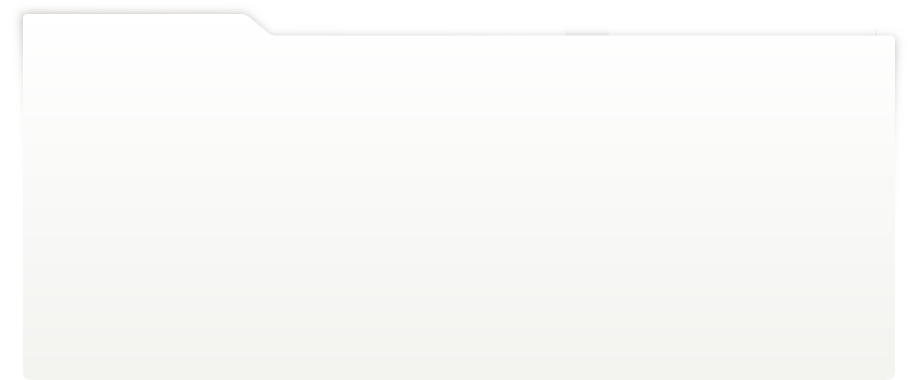
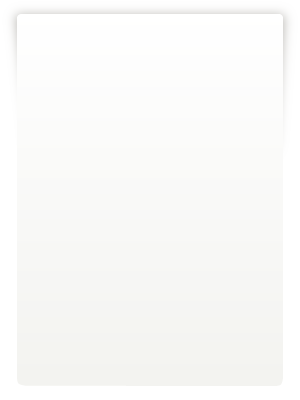
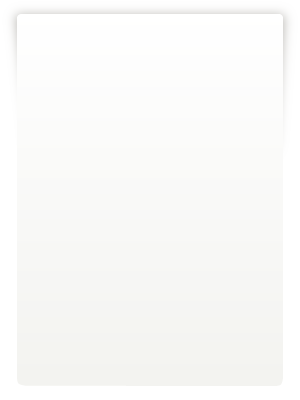
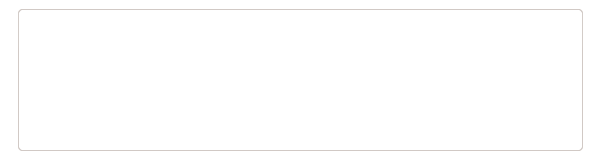
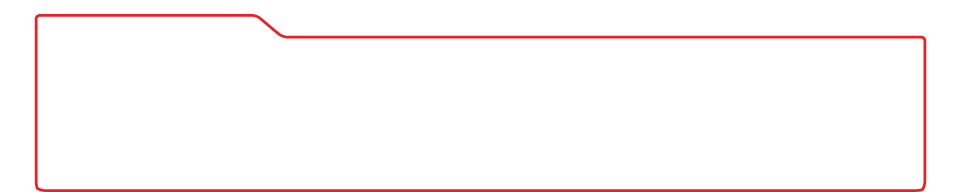
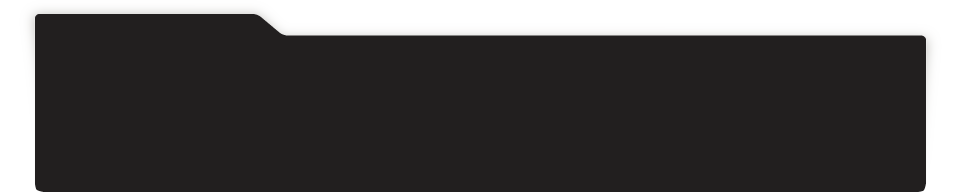
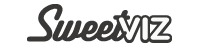
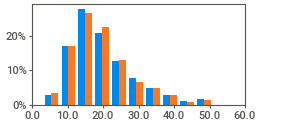
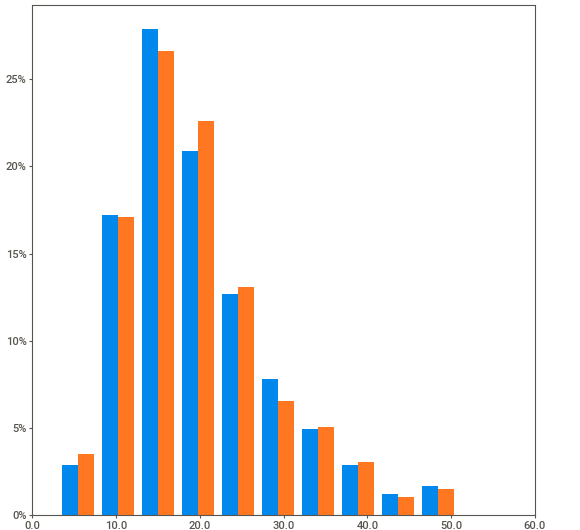
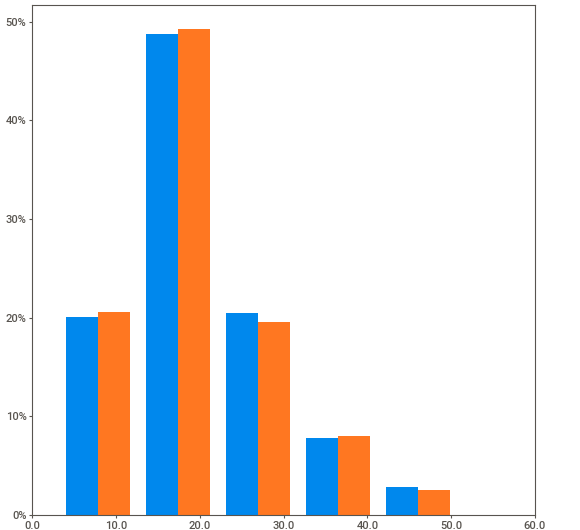
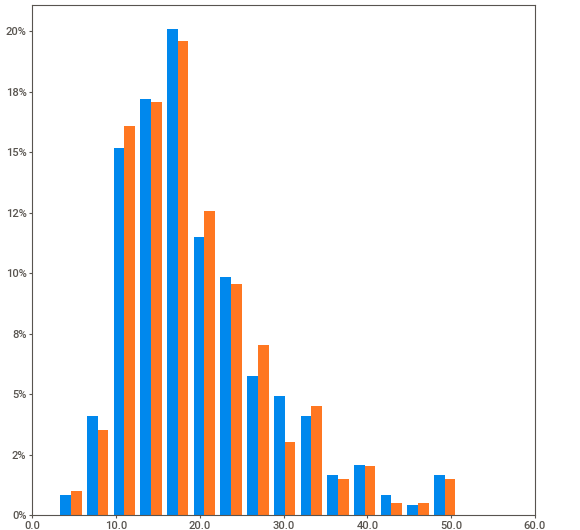
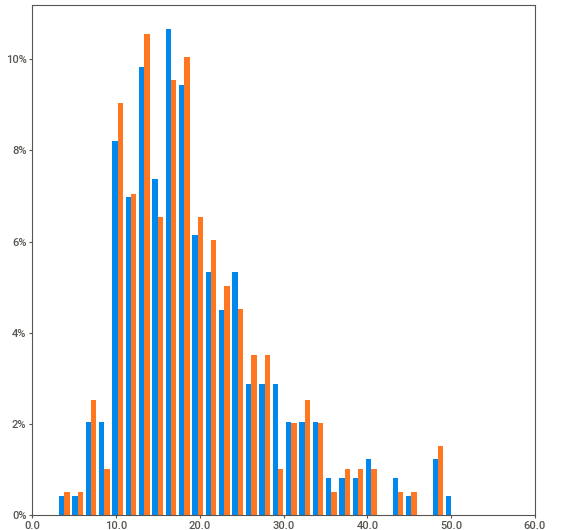
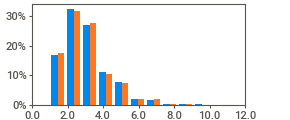
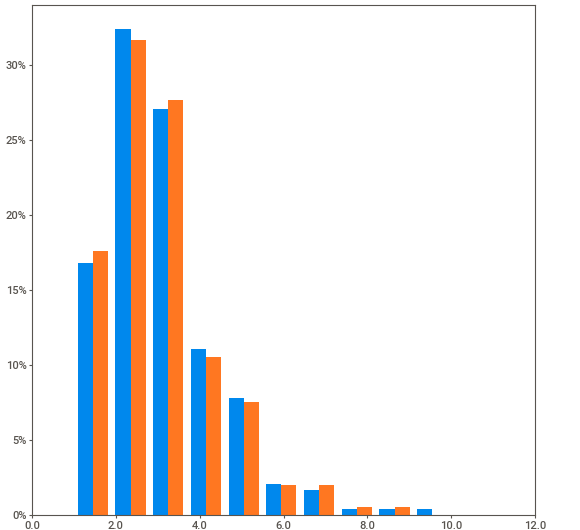
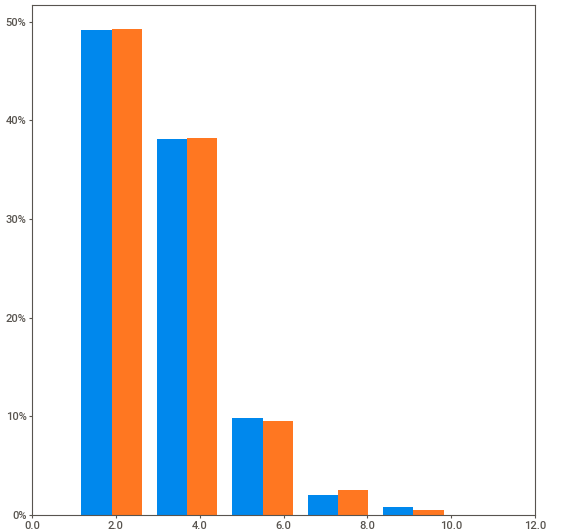
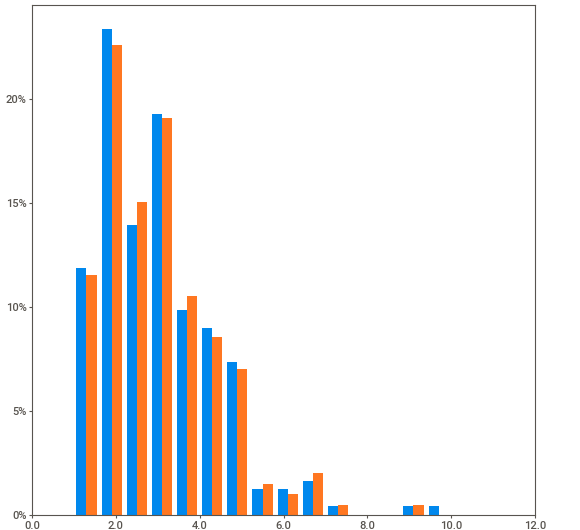
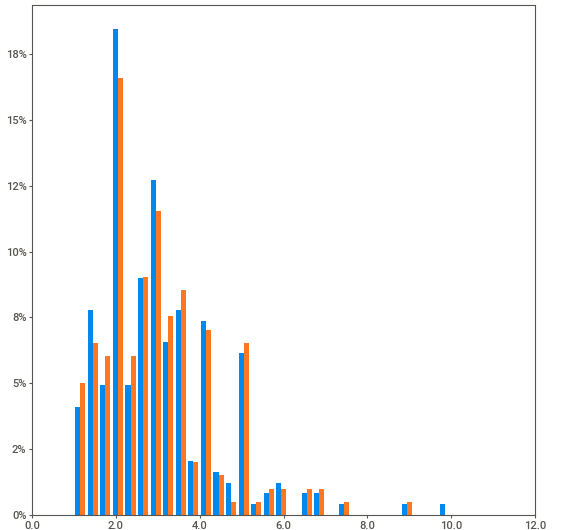
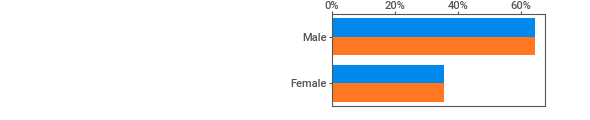
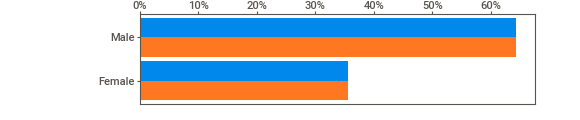
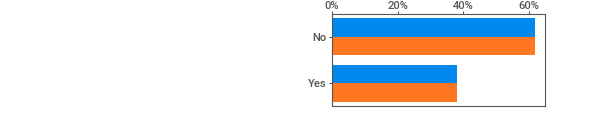
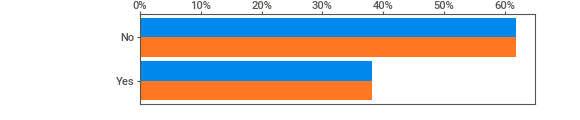
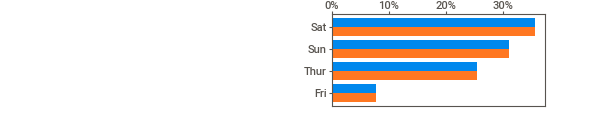
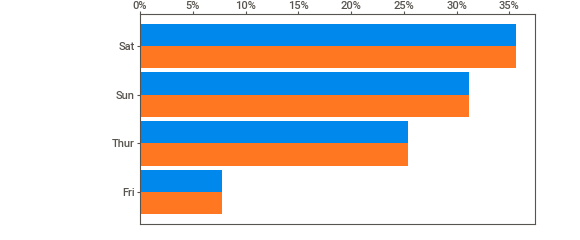
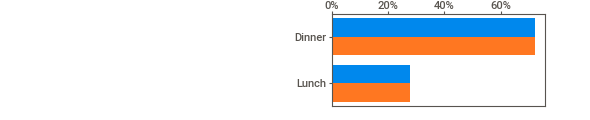
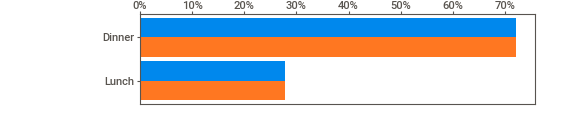
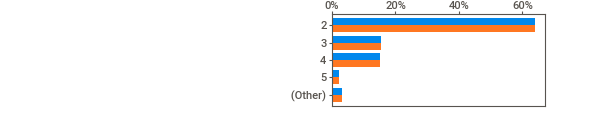
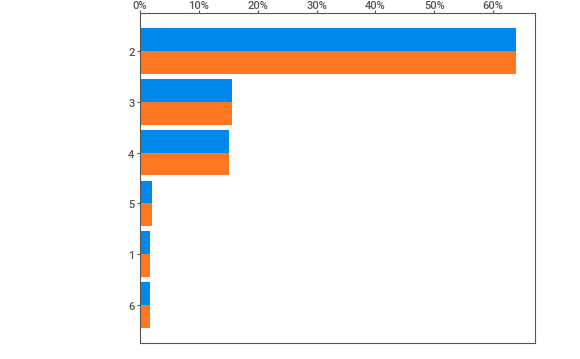
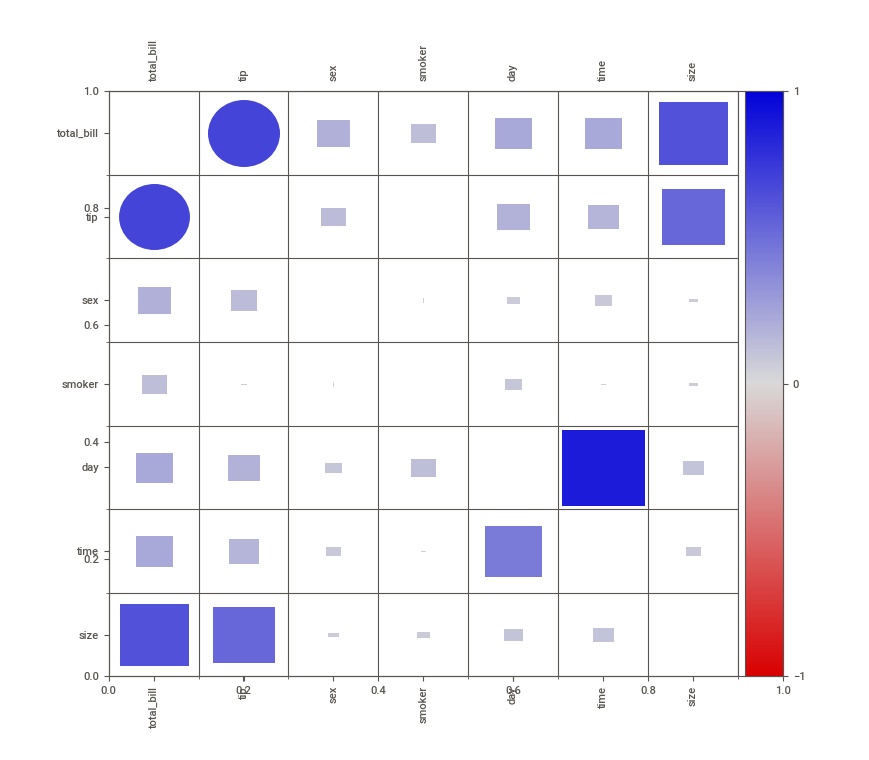
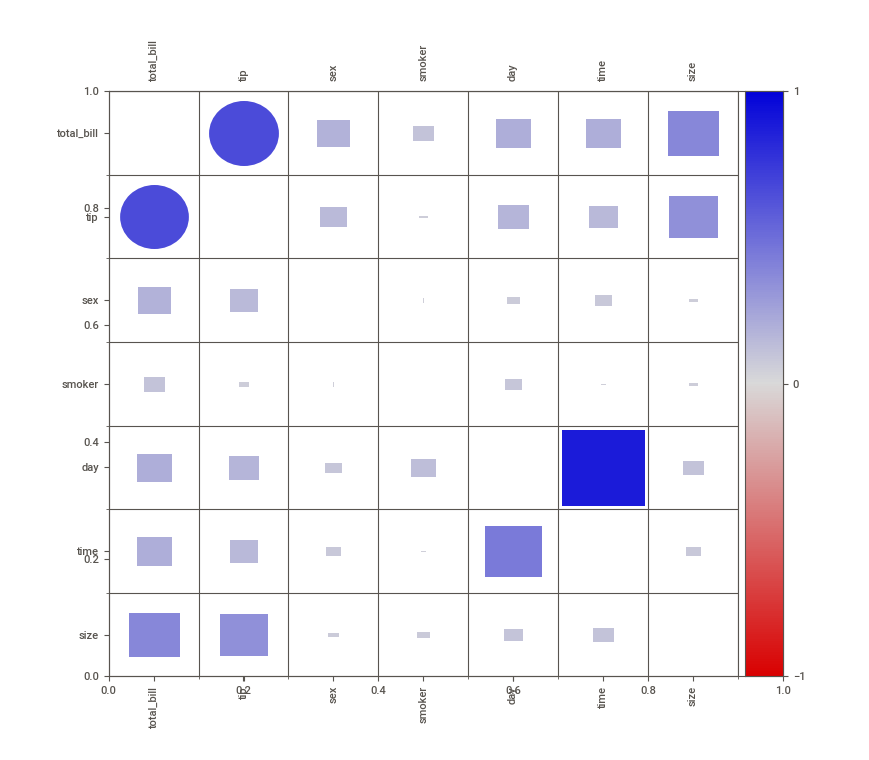

In [21]:
report = sv.compare([tips,"Original"],[tips_NA,"Ausentes"])
report.show_notebook()

Una de las técnicas utilizadas para lidar con datos faltantes es eliminar las filas que contienen un valor faltante, utilizando la función `.dropna ()`.

                                             |          | [  0%]   00:00 -> (? left)


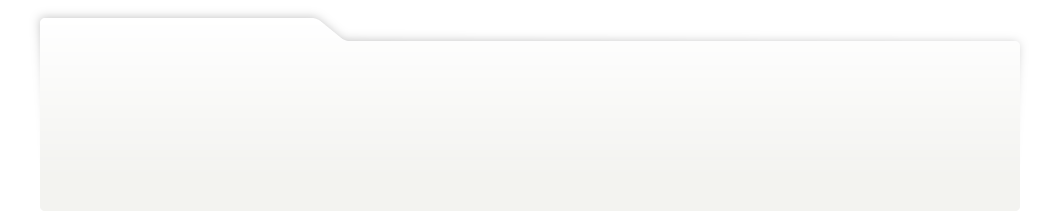
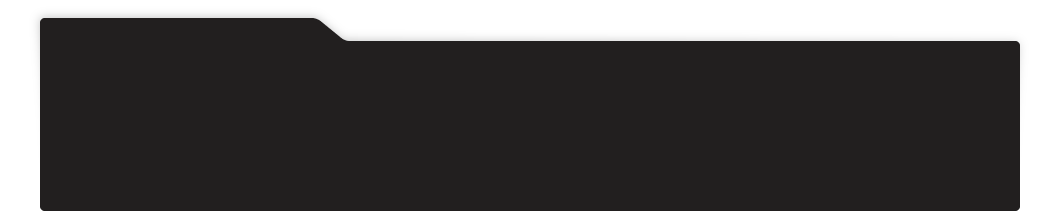
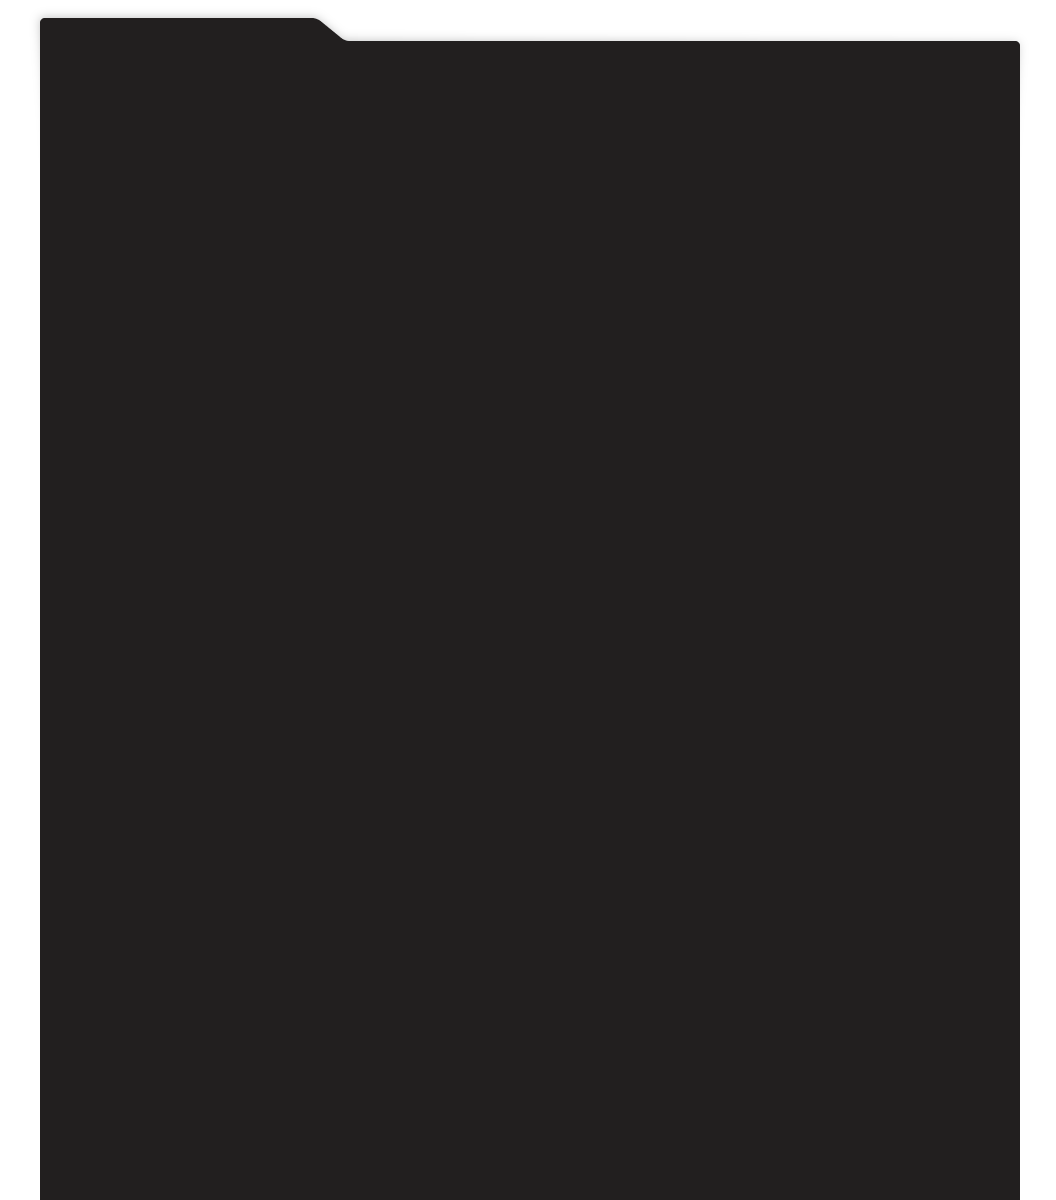
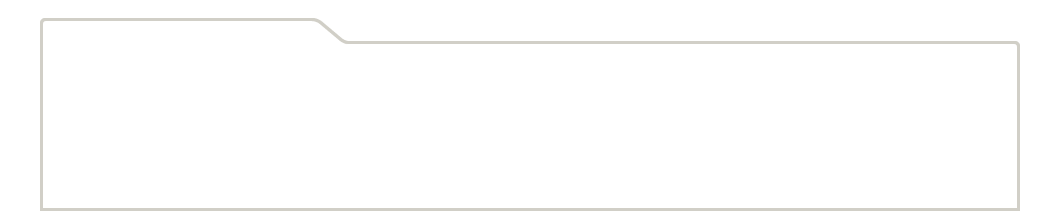
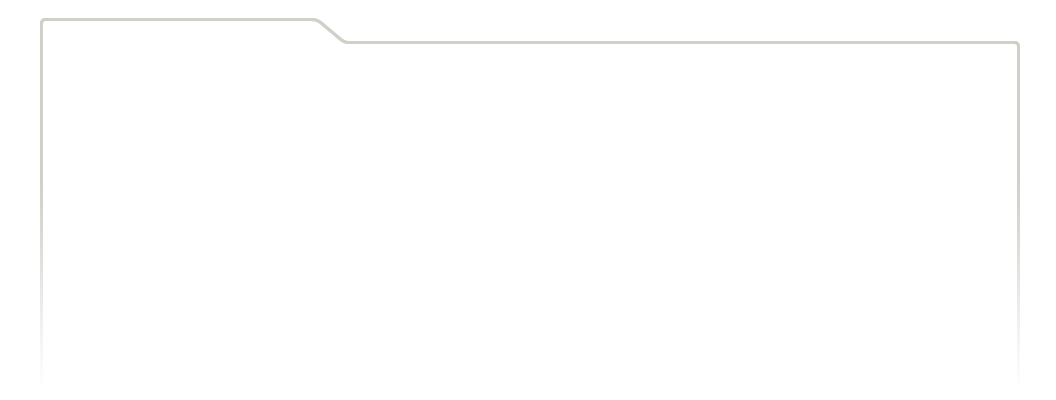
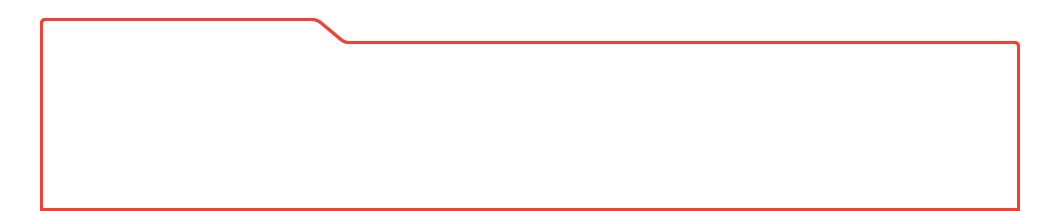
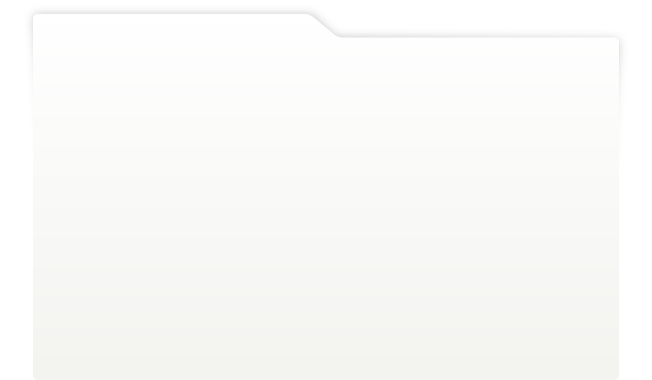
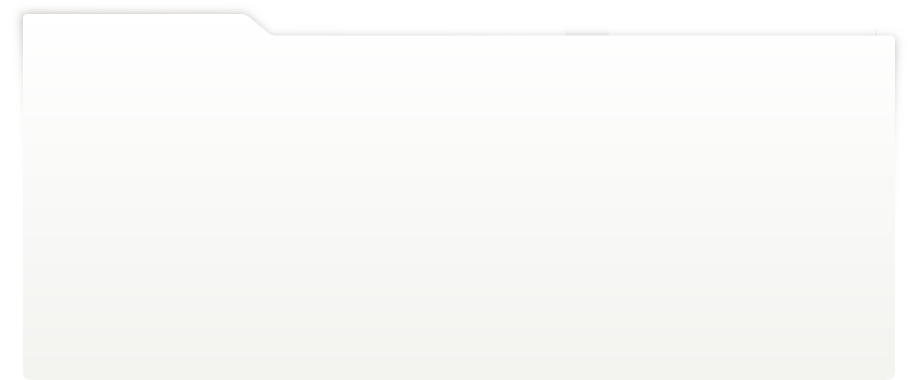
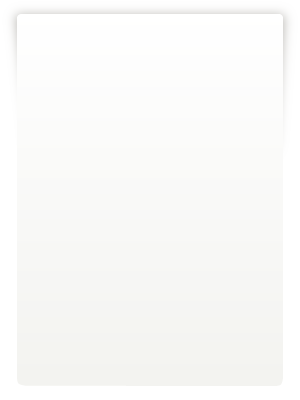
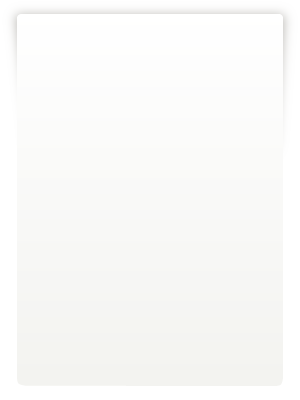
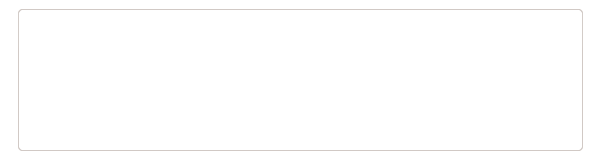
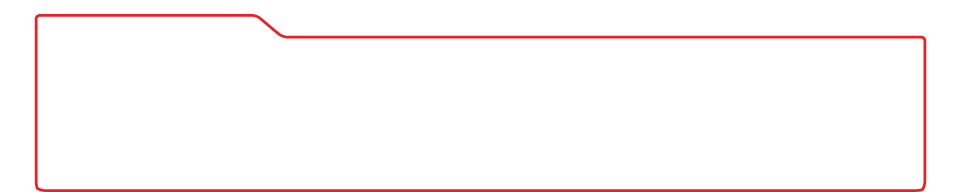
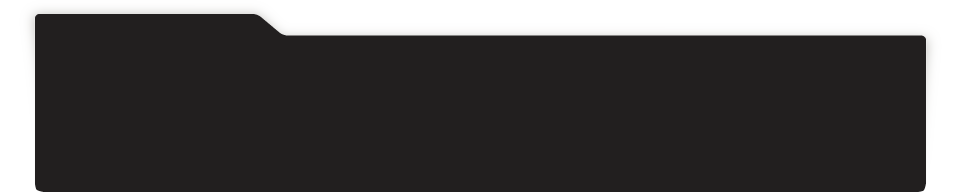
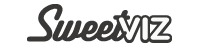
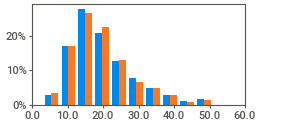
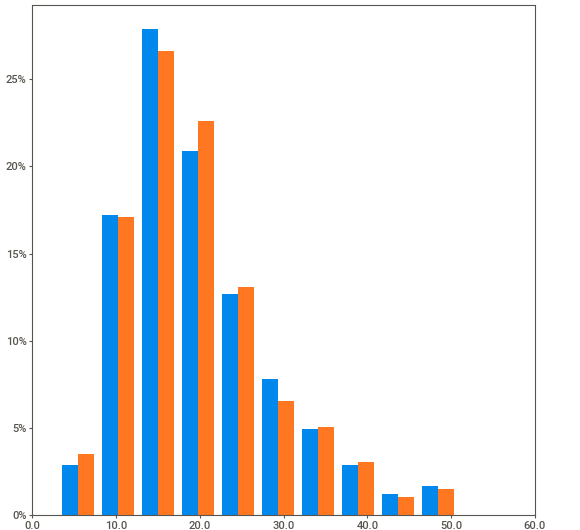
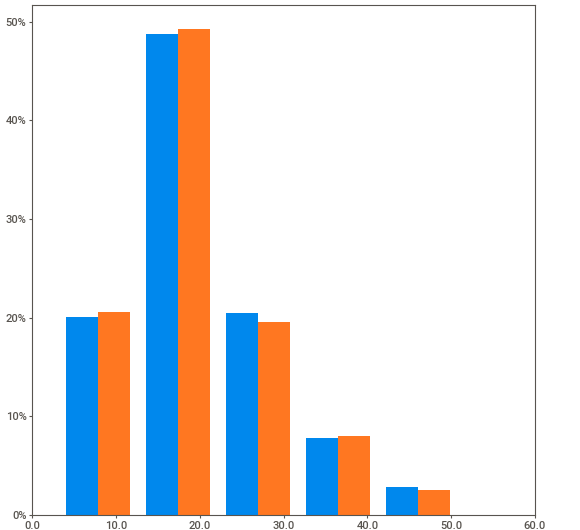
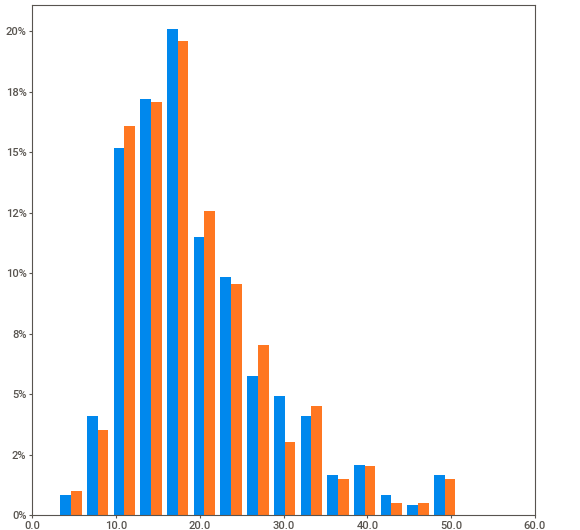
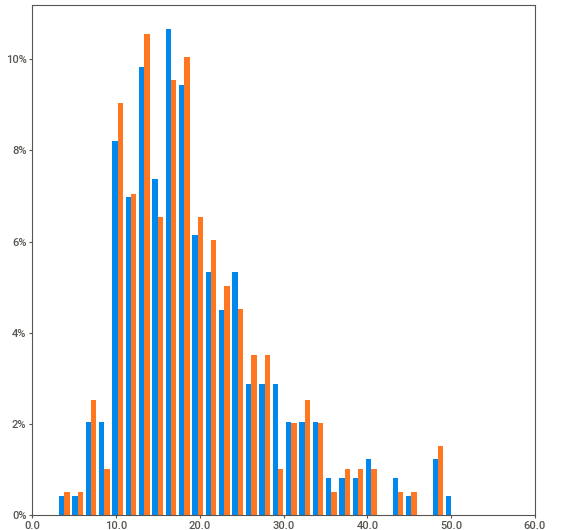
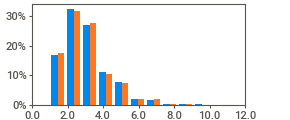
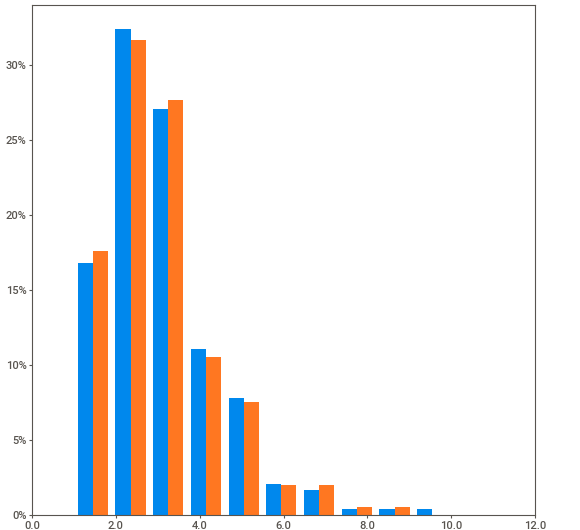
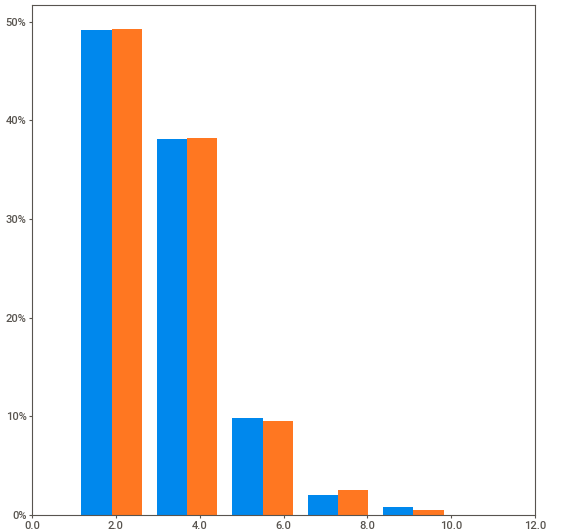
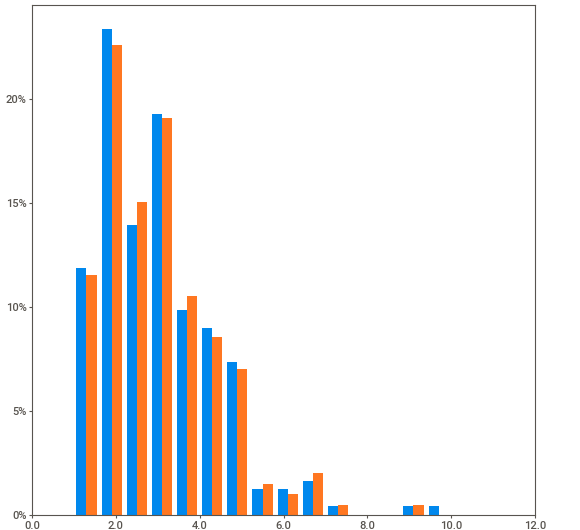
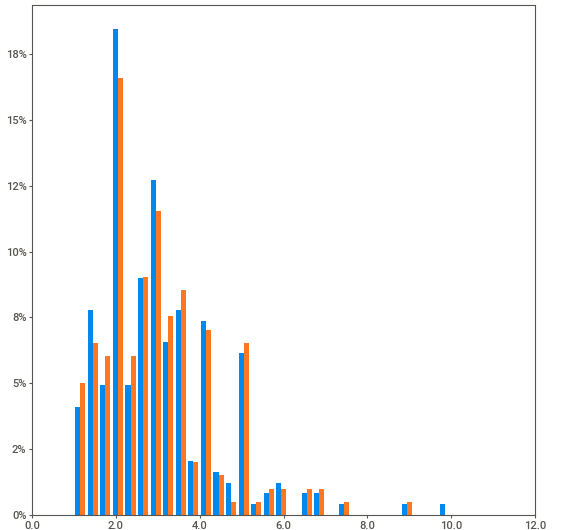
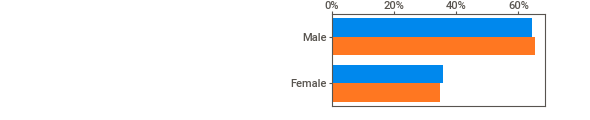
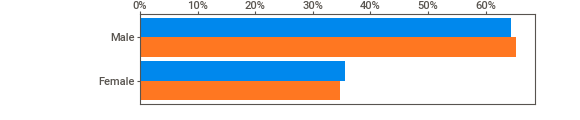
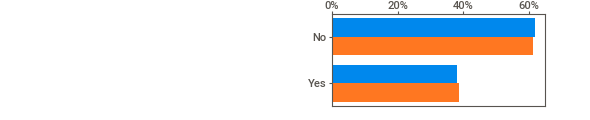
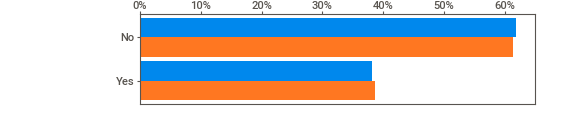
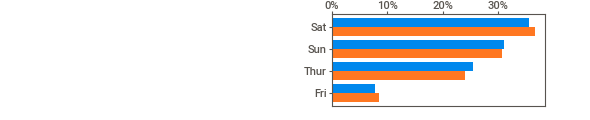
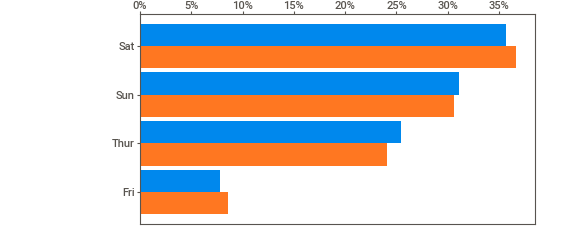
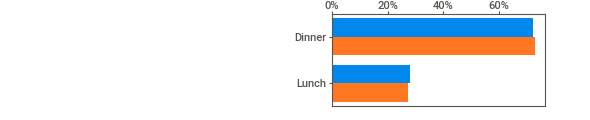
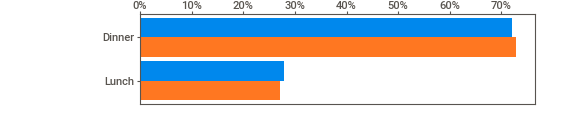
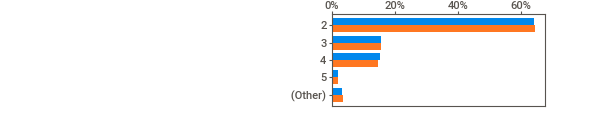
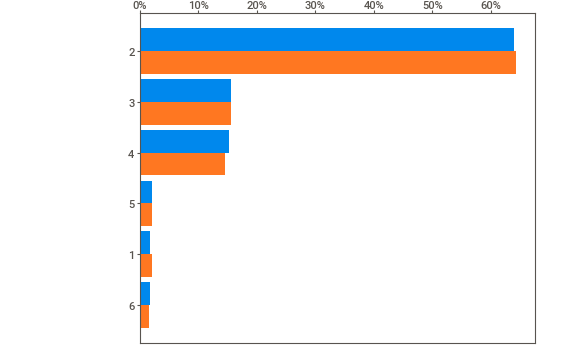
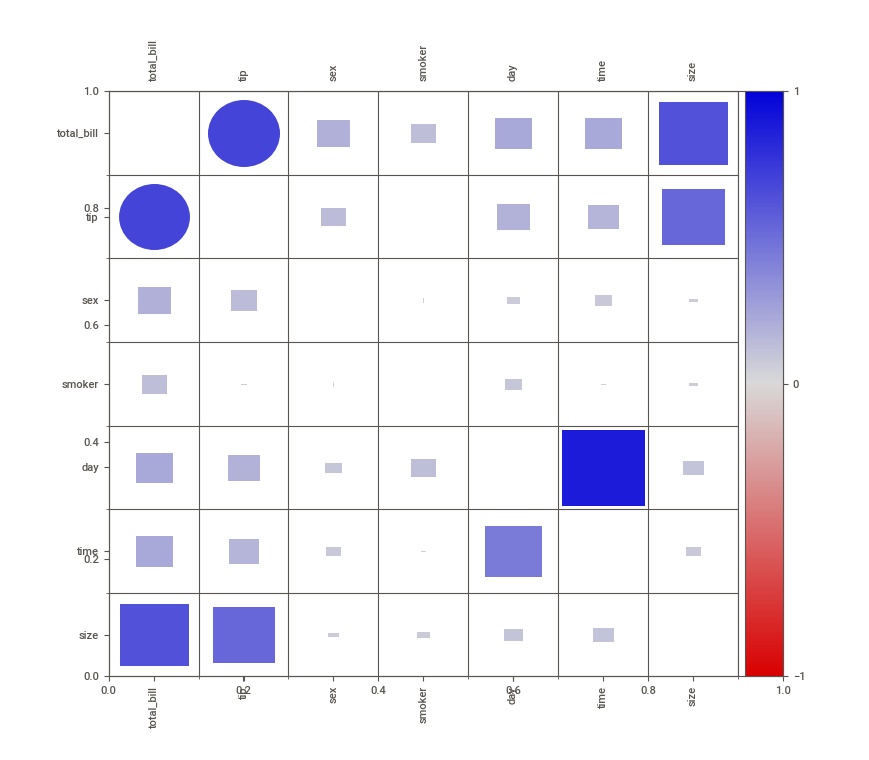
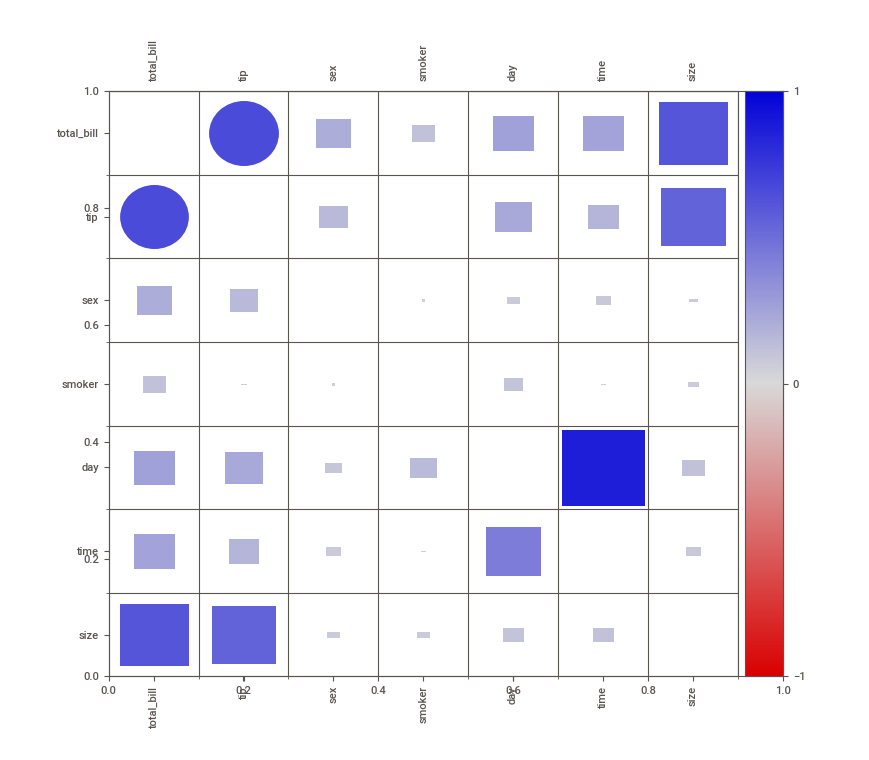

In [22]:
tips_removido = tips_NA.dropna()
report = sv.compare([tips,"Original"],[tips_removido,"Removido"])
report.show_notebook()

Datos faltantes con prioridad en las mesas para fumadores

In [23]:
#crear una columnas de probabilidades, al inicio todos con probabilidad 1
p = np.ones(len(tips['smoker']))
# escojer la probabilidad de 0.5 para mesas de no fumadores
p[np.where(tips['smoker']=='No')] = 0.5
#calcular la probabilidad par cada item del dat set
p = p/sum(p)

In [24]:
tips_NA2 = tips.copy()
sample = np.random.choice(list(tips_NA2.index),int(len(tips)*0.2), p = p)
tips_NA2.loc[sample,['total_bill','tip']] = np.nan

                                             |          | [  0%]   00:00 -> (? left)


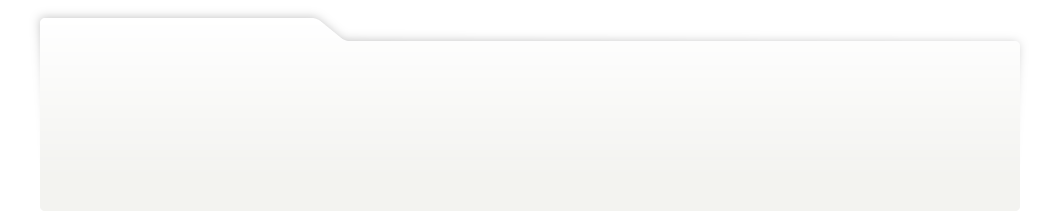
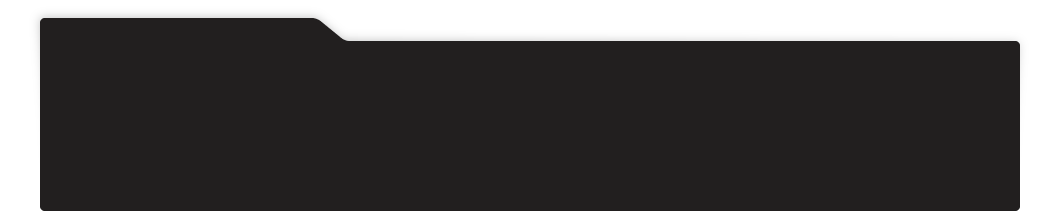
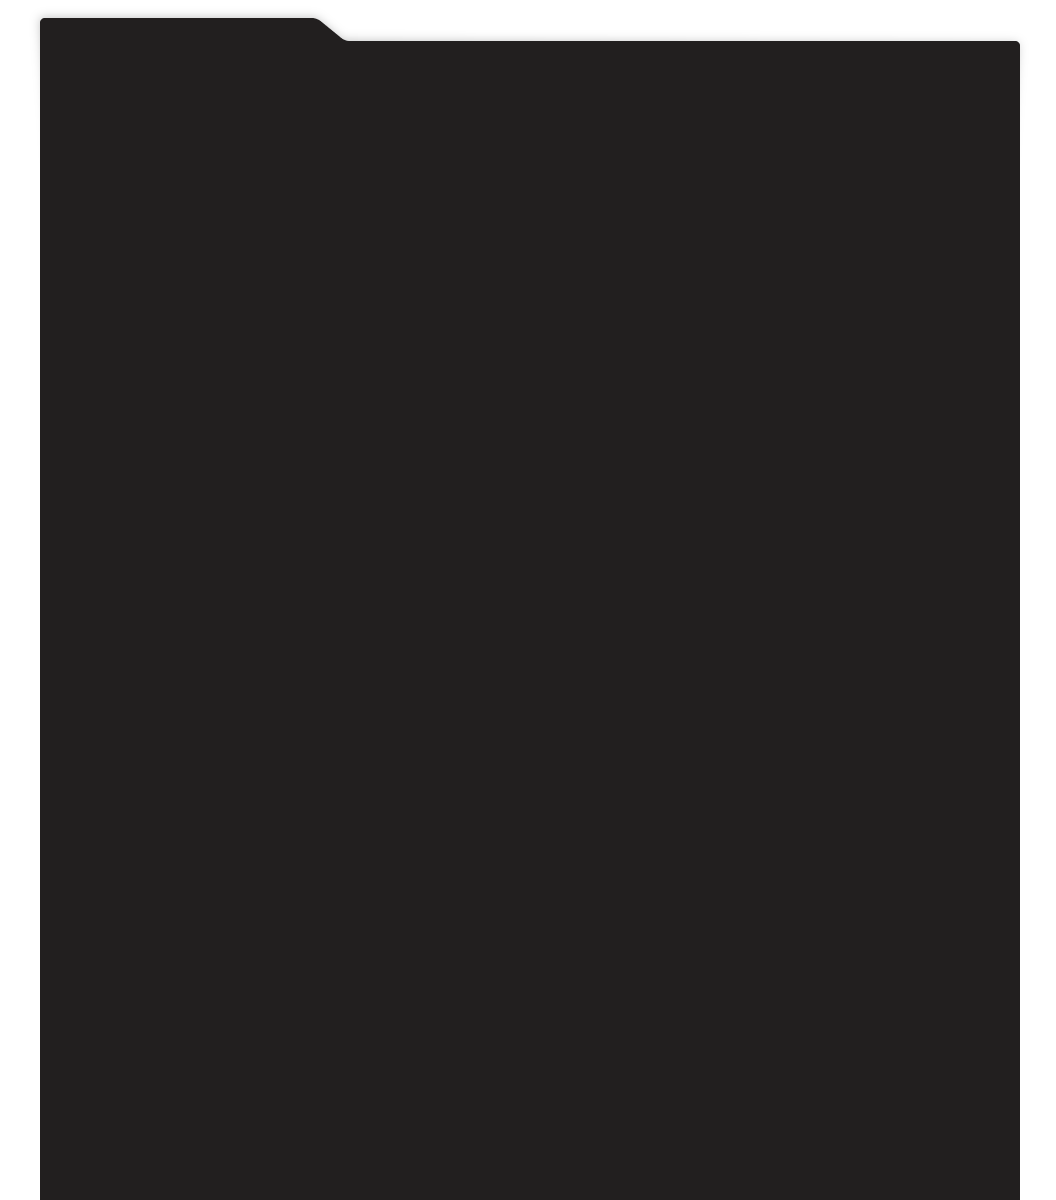
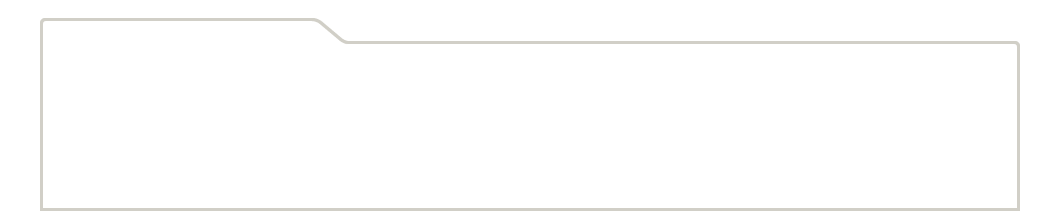
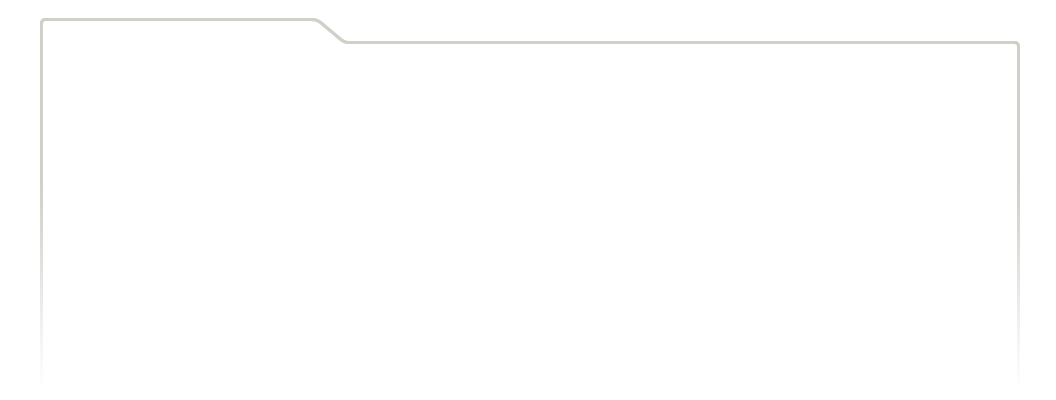
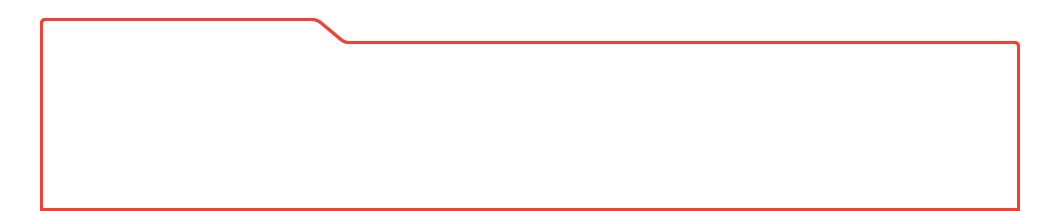
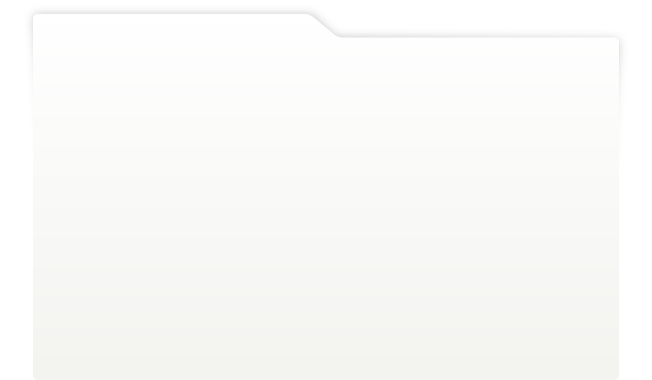
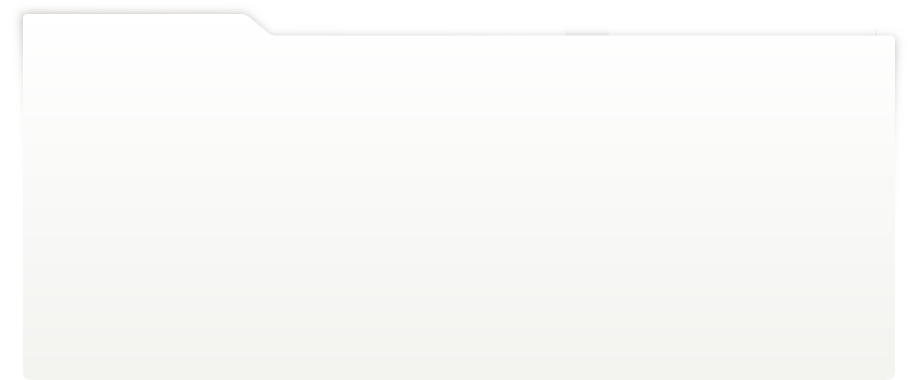
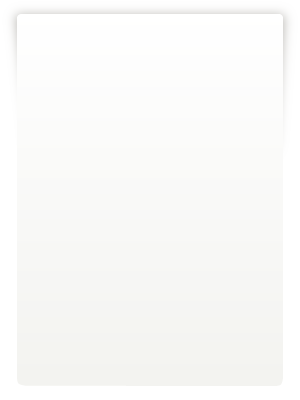
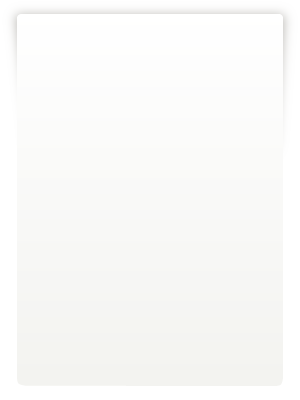
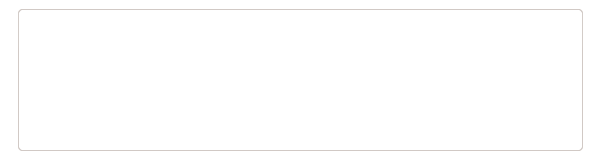
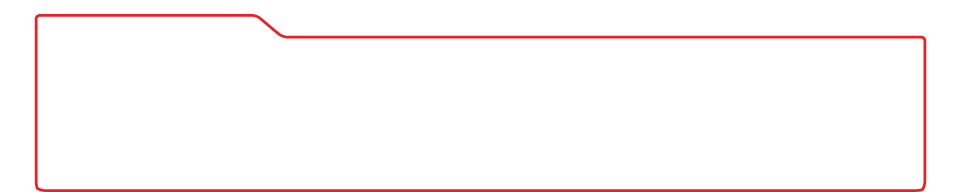
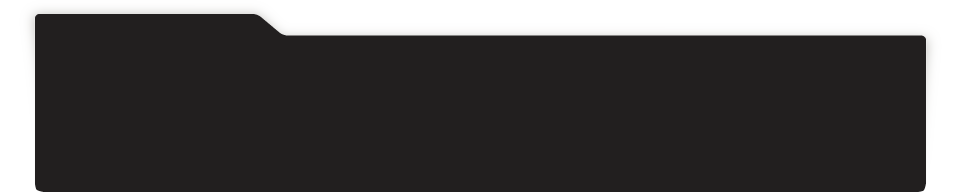
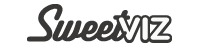
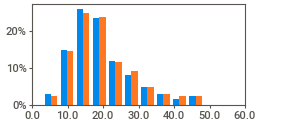
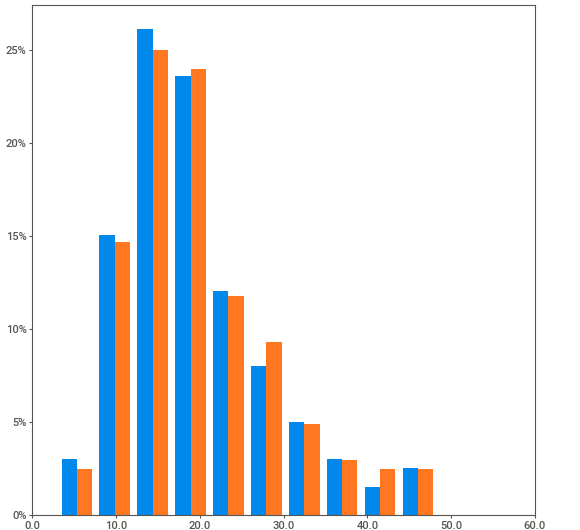
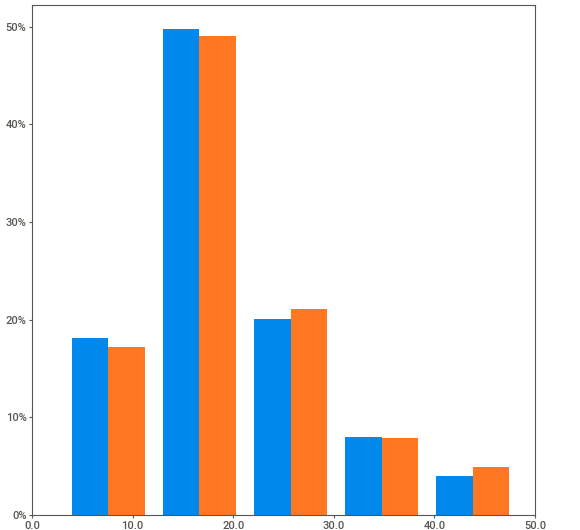
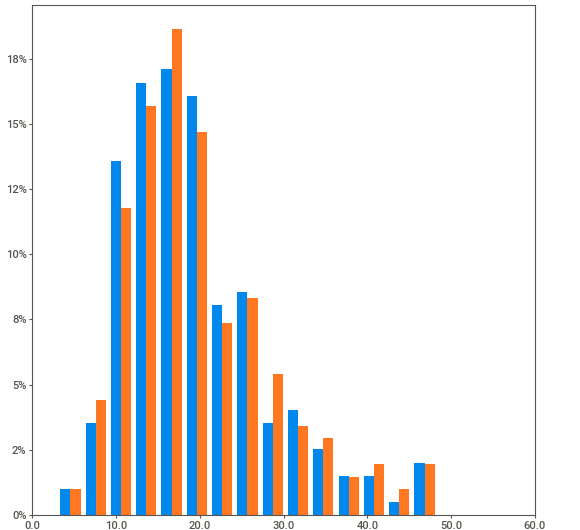
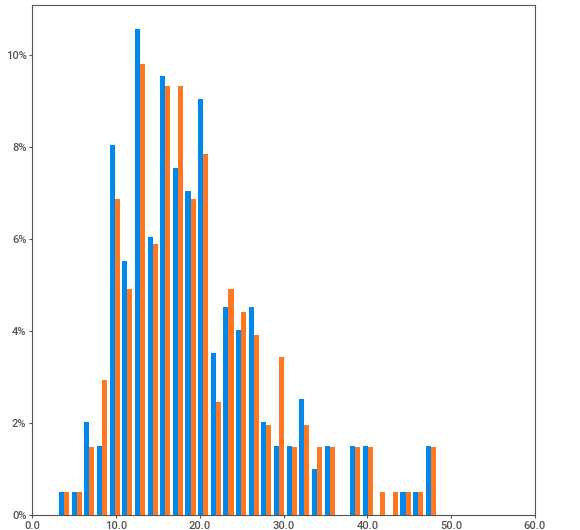
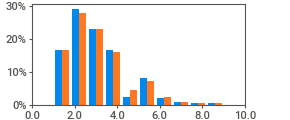
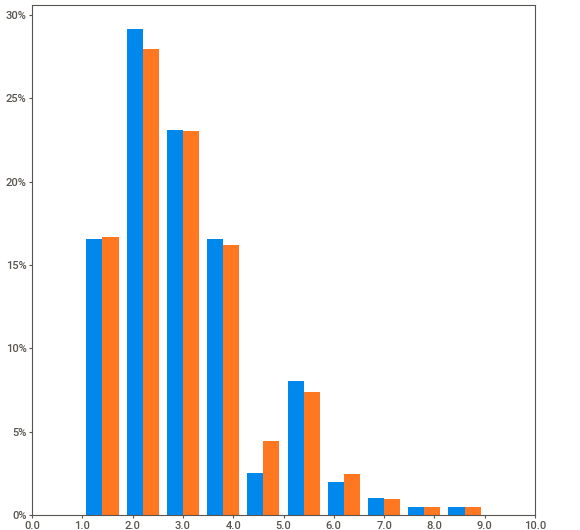
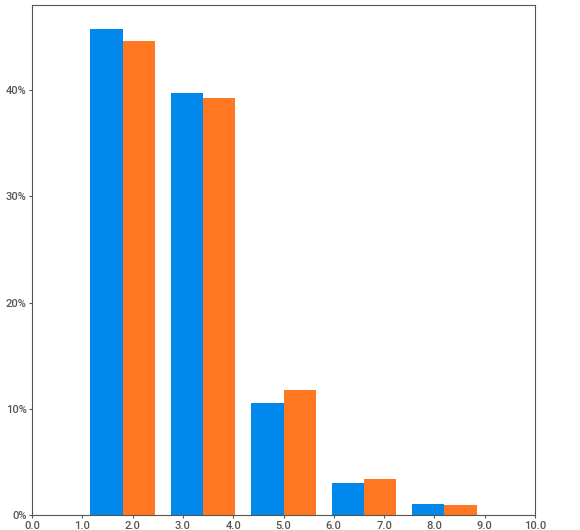
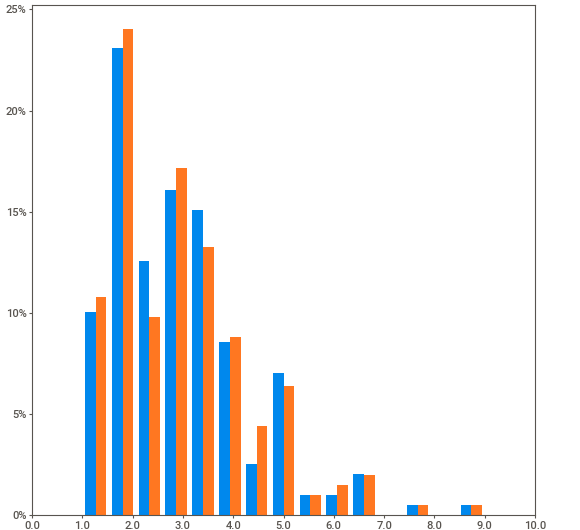
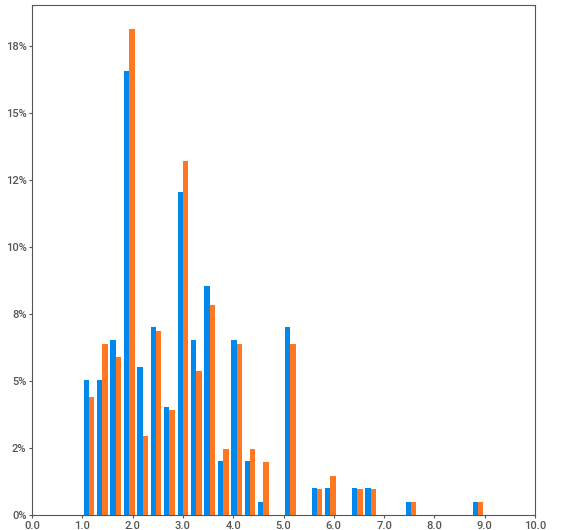
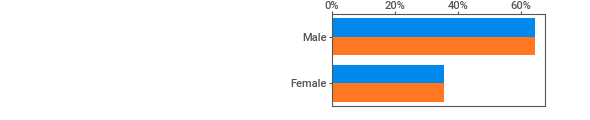
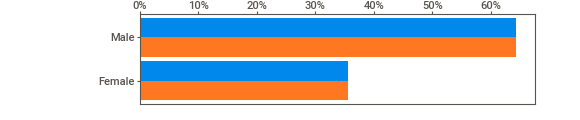
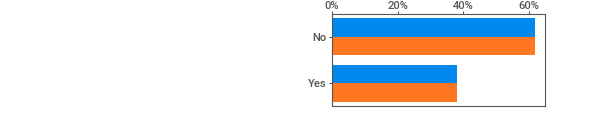
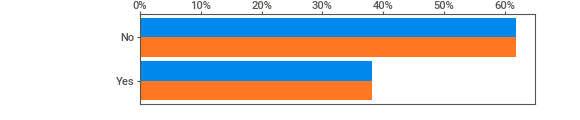
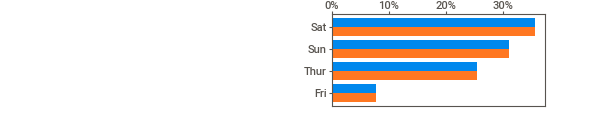
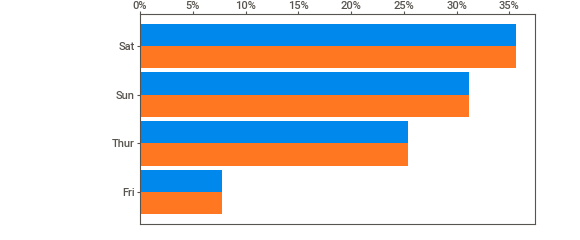
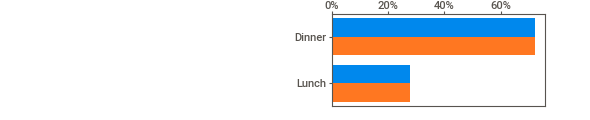
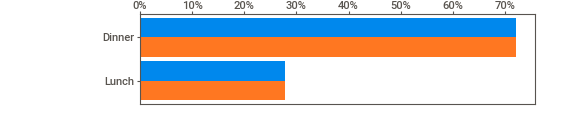
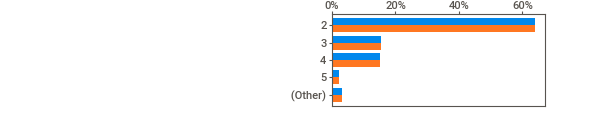
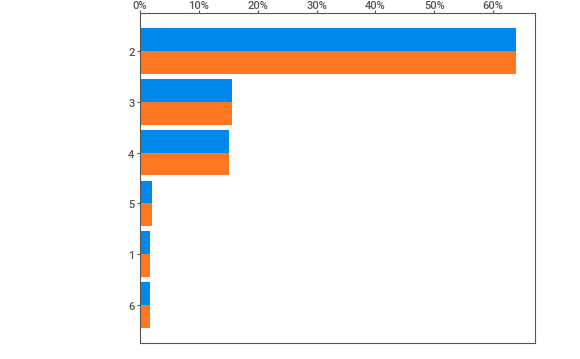
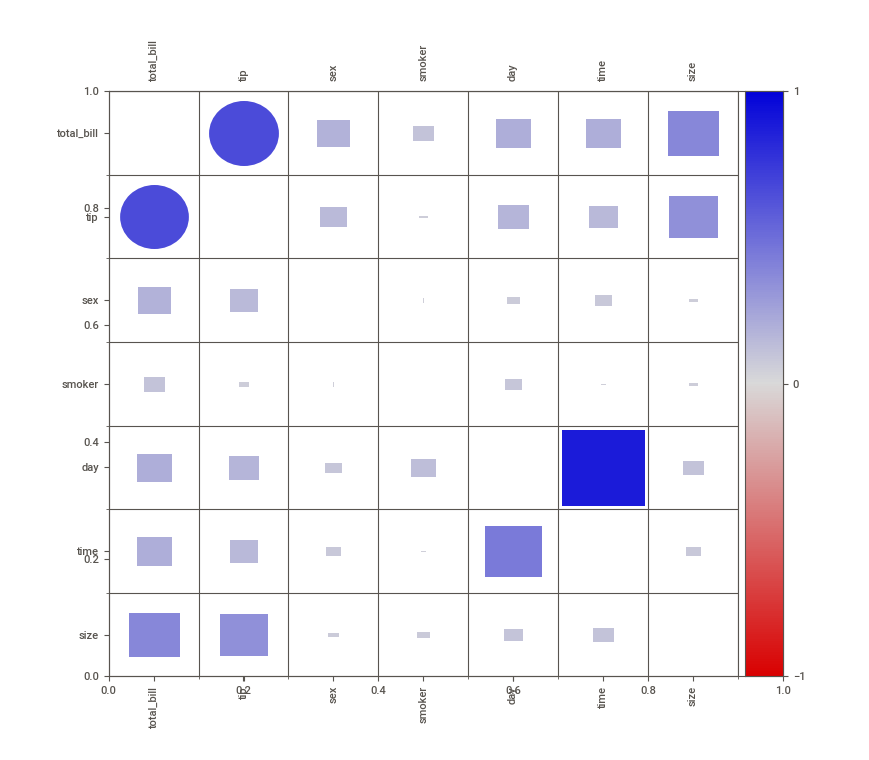
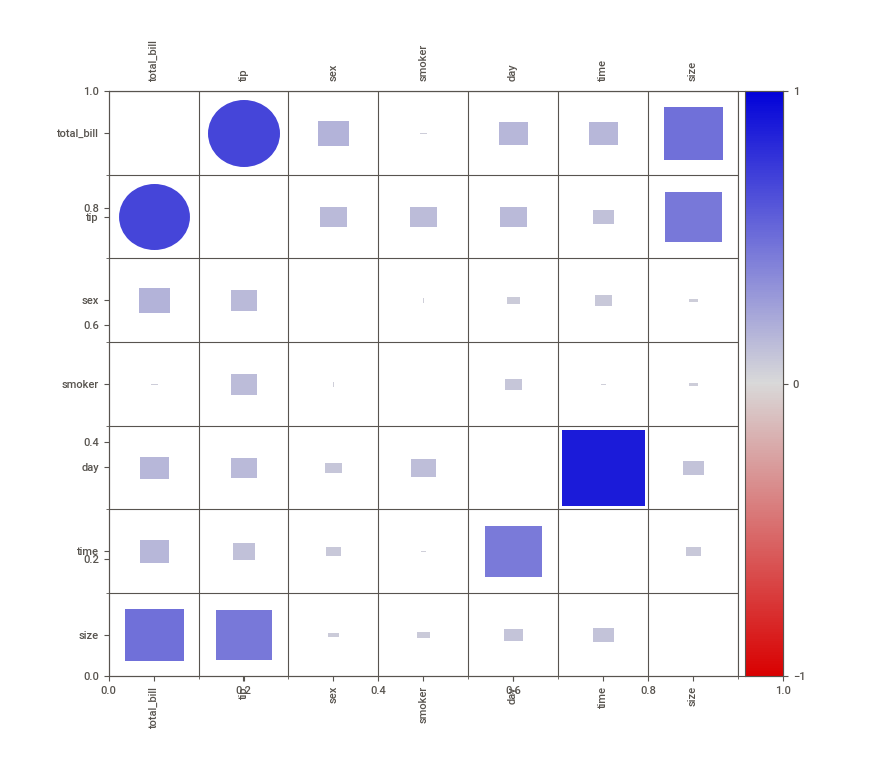

In [25]:
report = sv.compare([tips_NA,"MCAR"],[tips_NA2,"MAR"])
report.show_notebook()

                                             |          | [  0%]   00:00 -> (? left)


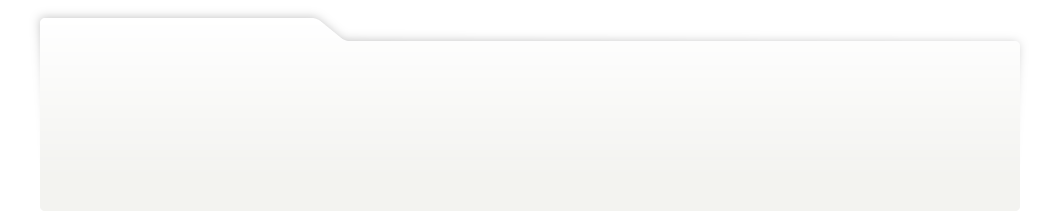
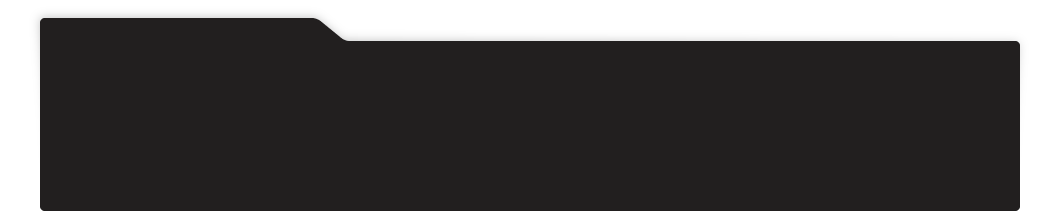
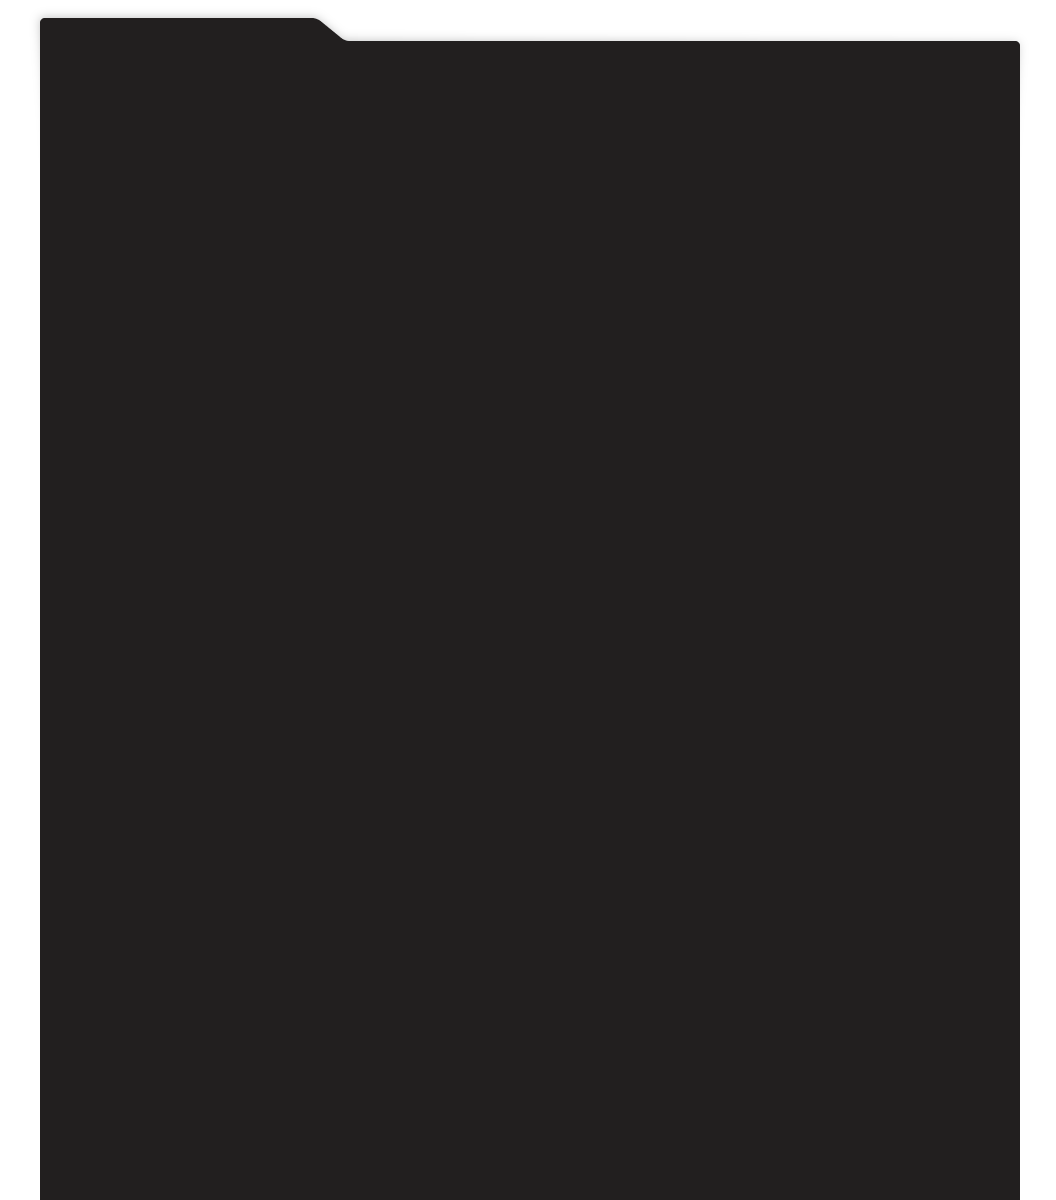
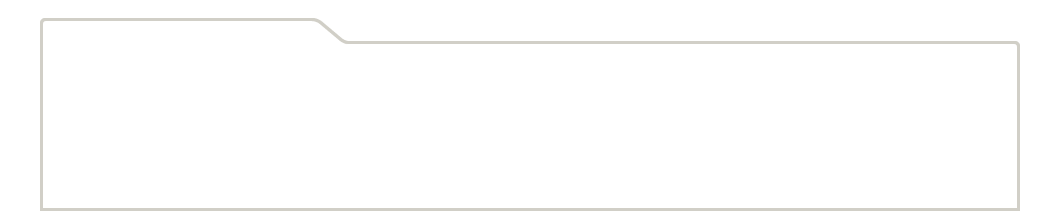
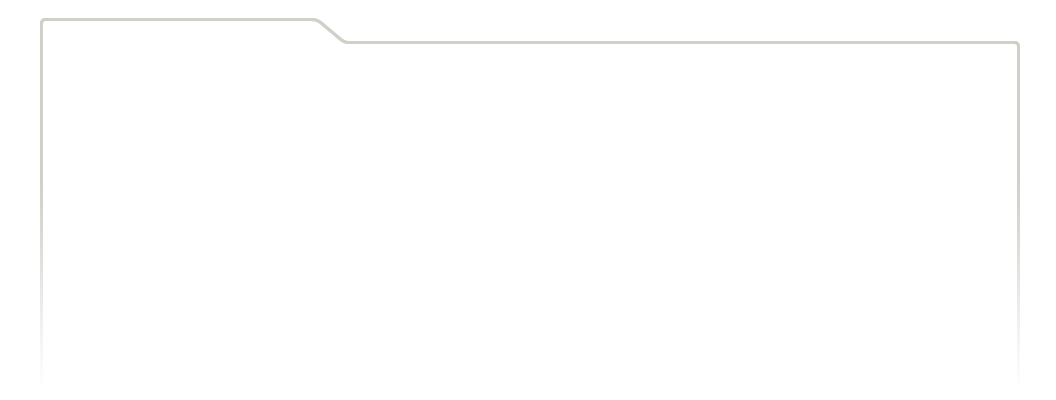
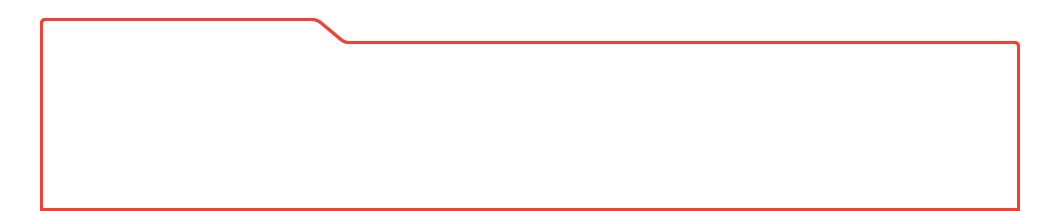
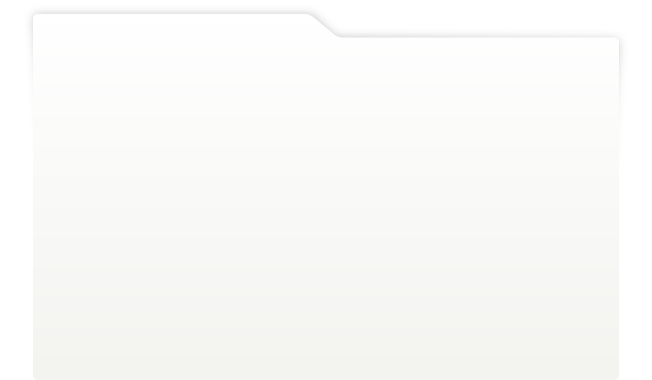
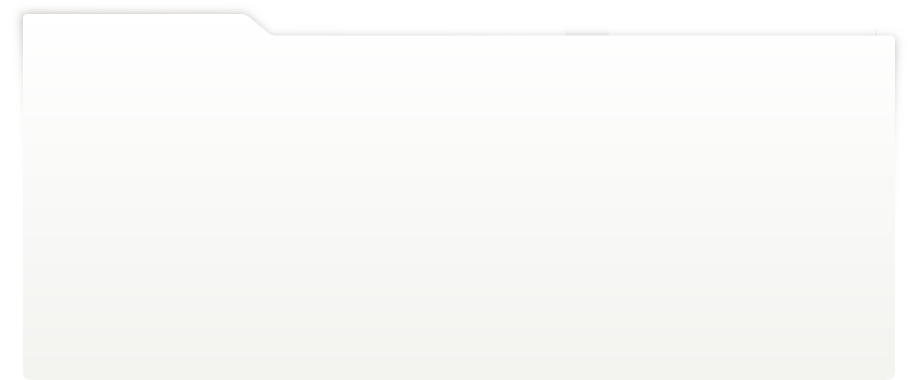
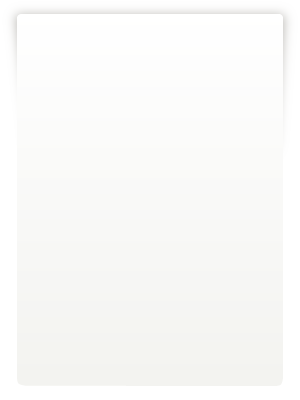
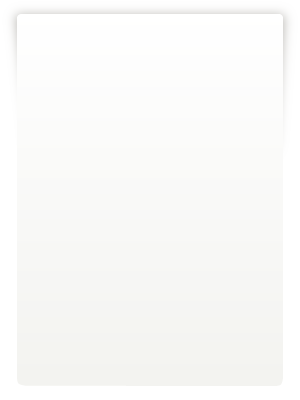
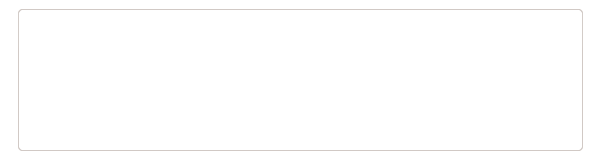
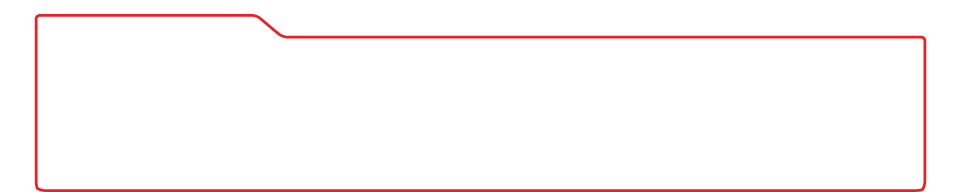
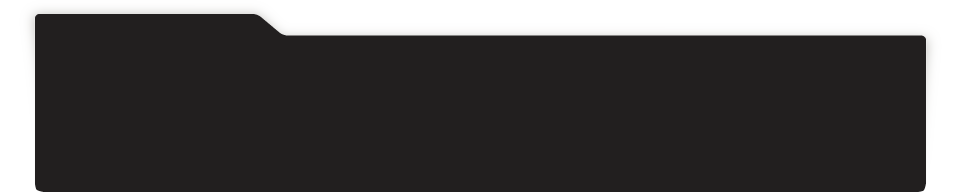
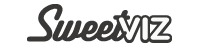
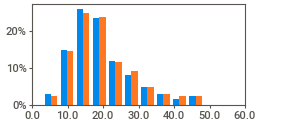
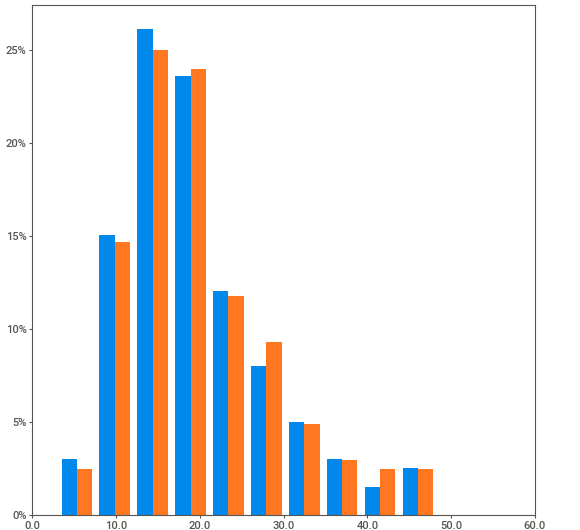
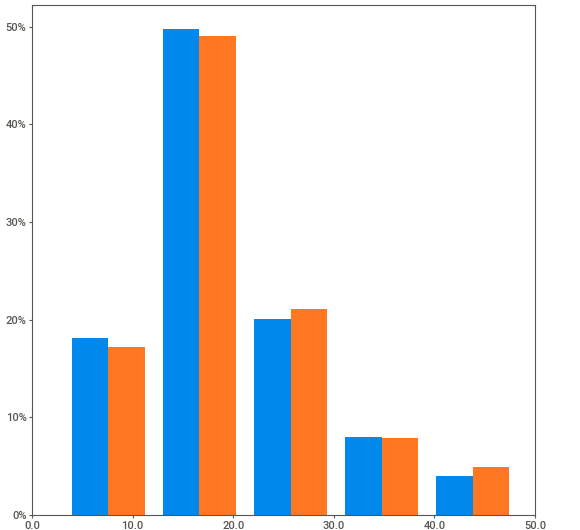
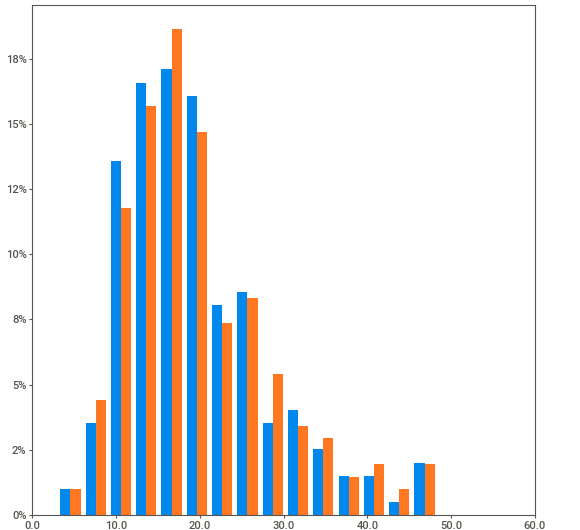
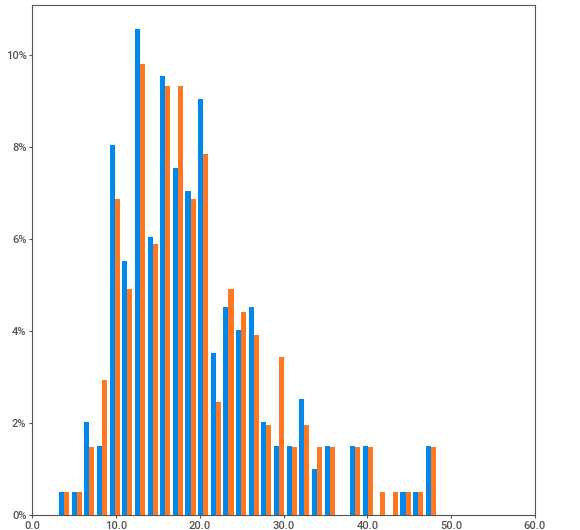
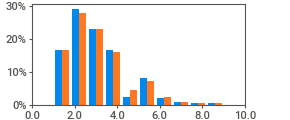
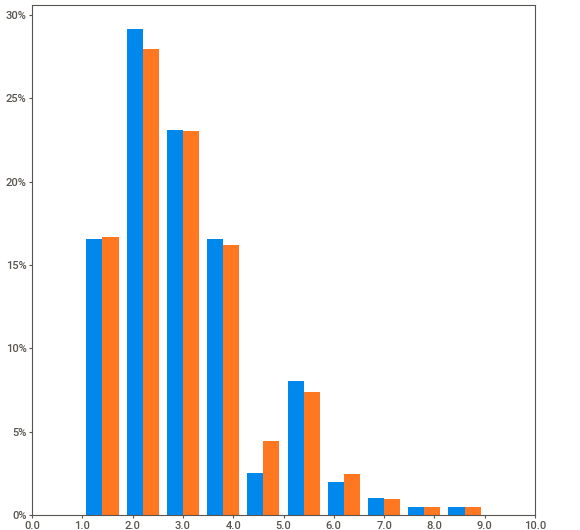
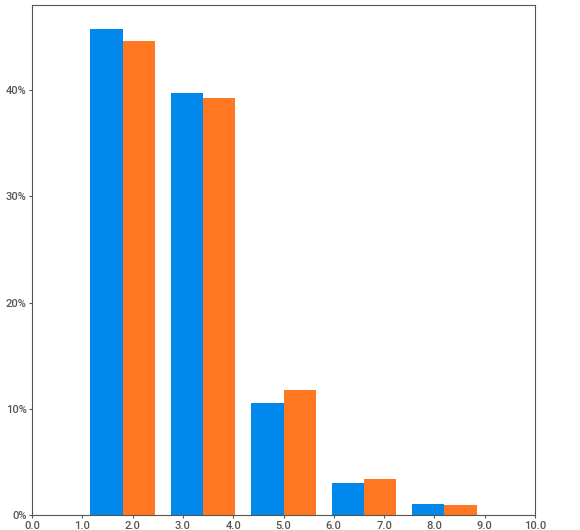
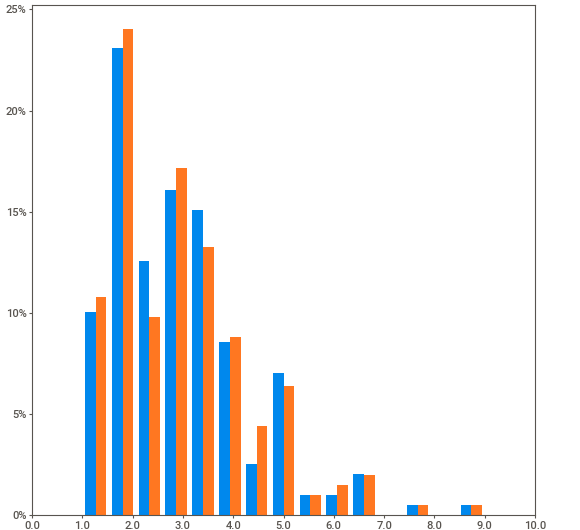
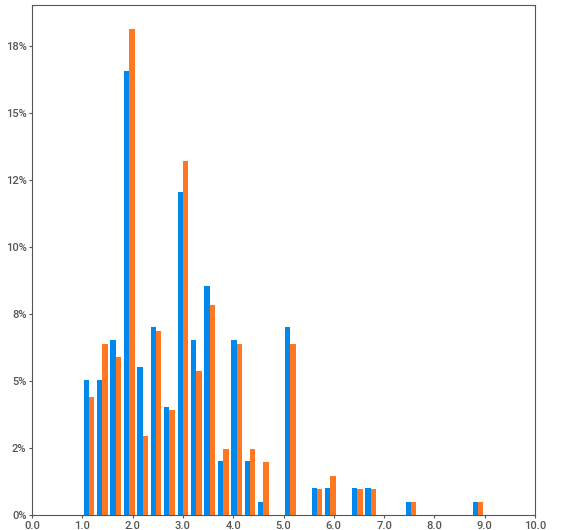
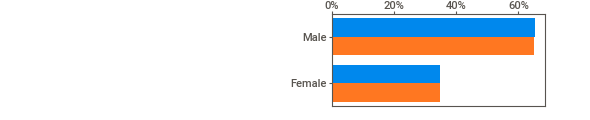
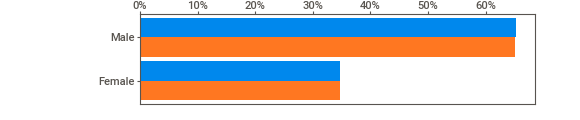
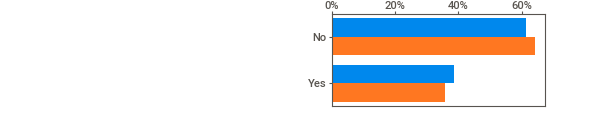
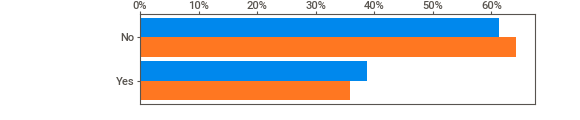
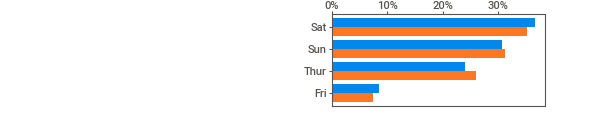
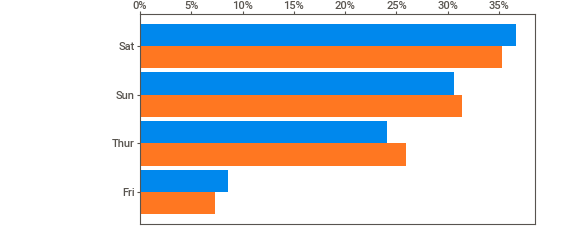
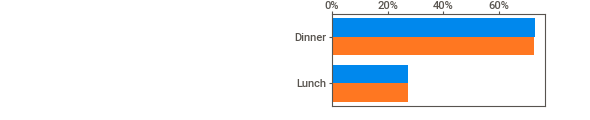
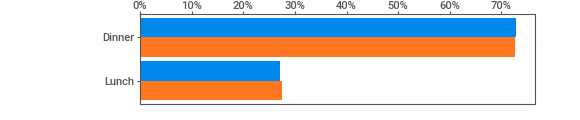
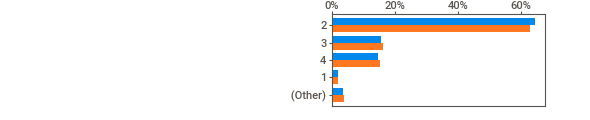
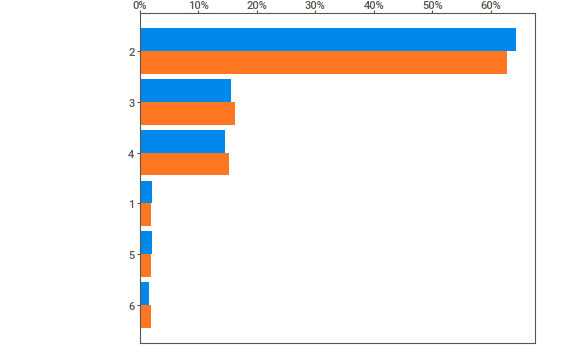
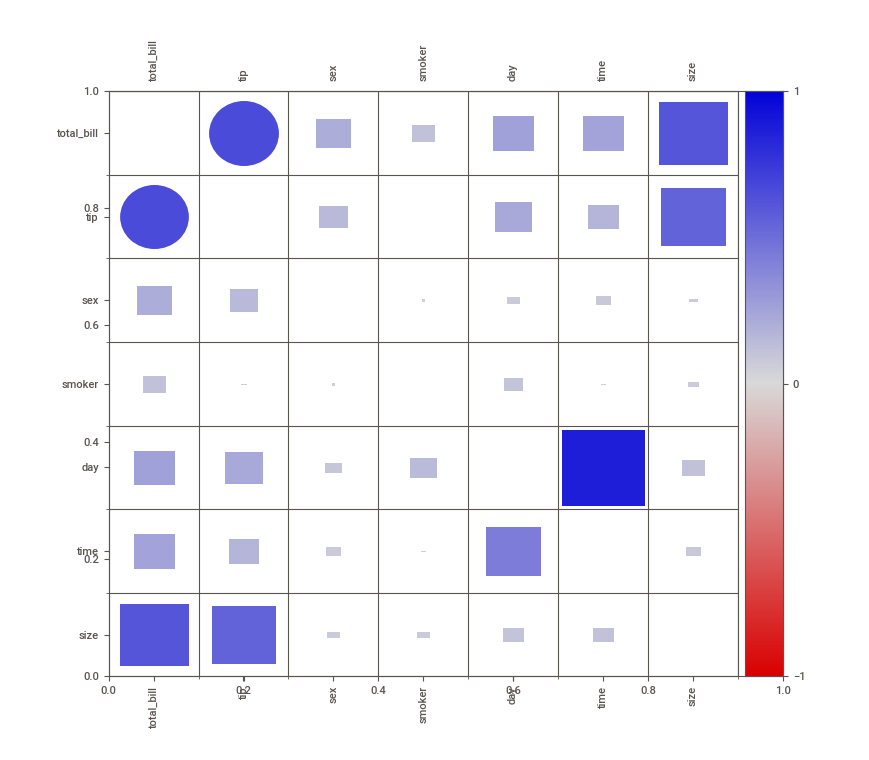
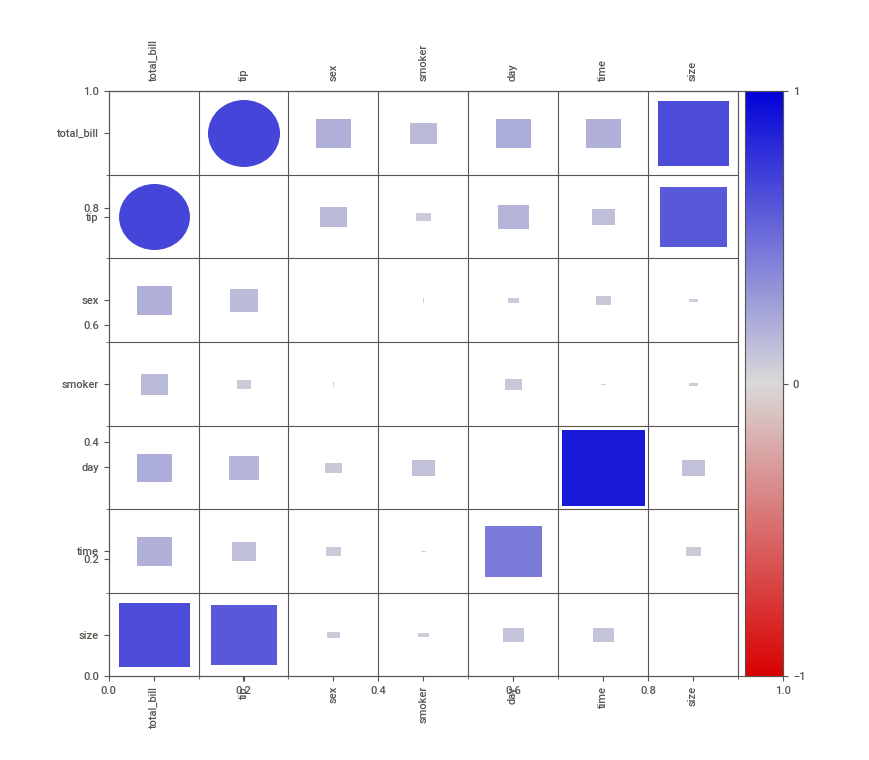

In [26]:
tips_removido2 = tips_NA2.dropna()
report = sv.compare([tips_removido,"MCAR"],[tips_removido2,"MAR"])
report.show_notebook()